# Precipitation in London

## Author: Mathew Thomas

## Introduction

Weather data encompasses a vast array of information therefore analyzing it, is crucial for various industries & fields. This includes meteorology, climate science, agriculture, energy, transportation, and disaster preparedness. Exploratory Data Analysis (EDA) plays a key role in understanding and interpreting this complex and dynamic dataset.

Using the concatenated dataset we created in the "Reworked datasets" notebook, we will explore the various weather attributes and determine using ML models how best to predict precipitation in London.

## Table of Contents

[1. EDA](#1.-EDA) <br>
- [Data Dictionary](#Data-Dictionary)
- [Exploring the dataset](#Exploring-the-dataset) 

[2. Model Approach 1](#2.-Model-Approach-1) <br>

[3. Model Approach 2](#3.-Model-Approach-2) <br>

[4. Model Approach 3](#4.-Model-Approach-3) <br>
    
[5. Conclusion](#5.-Conclusion) <br>

### Loading various libraries & dataset

In [4]:
# Import standard data science & visualization packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

In [5]:
lw_df = pd.read_csv("C:\\Users\\mitth\\Documents\\Brainstation\\Final_Project\\London_Weather_EDA\\lw_df.csv")

## 1. EDA

### Data dictionary:
- `DATE`: recorded date of measurement
- `CC`: Cloud Cover, measurement in oktas 
- `HU`: Humidity, measurement in %
- `QQ`: Global Radiation, irradiance measurement in Watt per square meter (W/m2)
- `TX`: Temperature Maximum, maximum temperature recorded in degrees Celsius (°C)
- `TG`: Temperature Mean, mean temperature in degrees Celsius (°C)
- `TN`: Temperature Minimum, minimum temperature recorded in degrees Celsius (°C)
- `RR`: Precipitation, precipitation measurement in millimeters (mm)
- `PP`: Pressure, pressure measurement in Pascals (hPa)
- `SD`: Snow Depth, depth measurement in centimeters (cm)
- `SS`: Sunshine, measurement in hours (hrs)

### Exploring the dataset

In [6]:
lw_df.head()

DATE   CC    HU    QQ   TX   TN   TG   RR      PP   SD   SS
0  1979-01-01  2.0  83.0  52.0  2.3 -7.5 -4.1  0.4  1019.0  9.0  7.0
1  1979-01-02  6.0  76.0  27.0  1.6 -7.5 -2.6  0.0  1025.3  8.0  1.7
2  1979-01-03  5.0  86.0  13.0  1.3 -7.2 -2.8  0.0  1020.5  4.0  0.0
3  1979-01-04  8.0  68.0  13.0 -0.3 -6.5 -2.6  0.0  1008.4  2.0  0.0
4  1979-01-05  6.0  73.0  29.0  5.6 -1.4 -0.8  0.0  1022.5  1.0  2.0

In [7]:
lw_df.shape

(16071, 11)

In [8]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    16071 non-null  object 
 1   CC      16053 non-null  float64
 2   HU      16014 non-null  float64
 3   QQ      16046 non-null  float64
 4   TX      16071 non-null  float64
 5   TN      16071 non-null  float64
 6   TG      16071 non-null  float64
 7   RR      16071 non-null  float64
 8   PP      16071 non-null  float64
 9   SD      14996 non-null  float64
 10  SS      16071 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.3+ MB


In [9]:
# Check for missing values
lw_df.isna().sum()

DATE       0
CC        18
HU        57
QQ        25
TX         0
TN         0
TG         0
RR         0
PP         0
SD      1075
SS         0
dtype: int64

#### Convert datatype for `DATE`

In [10]:
lw_df['DATE'] = pd.to_datetime(lw_df['DATE'], format='%Y-%m-%d', errors='coerce')

In [11]:
lw_df.head()

DATE   CC    HU    QQ   TX   TN   TG   RR      PP   SD   SS
0 1979-01-01  2.0  83.0  52.0  2.3 -7.5 -4.1  0.4  1019.0  9.0  7.0
1 1979-01-02  6.0  76.0  27.0  1.6 -7.5 -2.6  0.0  1025.3  8.0  1.7
2 1979-01-03  5.0  86.0  13.0  1.3 -7.2 -2.8  0.0  1020.5  4.0  0.0
3 1979-01-04  8.0  68.0  13.0 -0.3 -6.5 -2.6  0.0  1008.4  2.0  0.0
4 1979-01-05  6.0  73.0  29.0  5.6 -1.4 -0.8  0.0  1022.5  1.0  2.0

In [12]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    16071 non-null  datetime64[ns]
 1   CC      16053 non-null  float64       
 2   HU      16014 non-null  float64       
 3   QQ      16046 non-null  float64       
 4   TX      16071 non-null  float64       
 5   TN      16071 non-null  float64       
 6   TG      16071 non-null  float64       
 7   RR      16071 non-null  float64       
 8   PP      16071 non-null  float64       
 9   SD      14996 non-null  float64       
 10  SS      16071 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.3 MB


#### Cloud Cover null values

In [13]:
# Check for missing values
lw_df.isna().sum()

DATE       0
CC        18
HU        57
QQ        25
TX         0
TN         0
TG         0
RR         0
PP         0
SD      1075
SS         0
dtype: int64

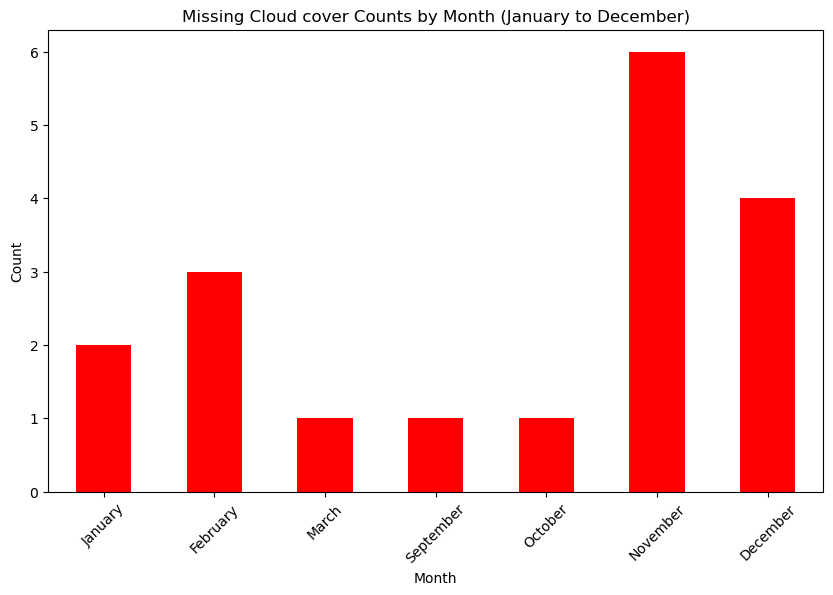

In [14]:
# Let's graph out the missing cloudcover values and group them by month
missing_dates = lw_df[lw_df['CC'].isnull()]['DATE']

# Extract the month component from the date
missing_months = missing_dates.dt.month

# Count occurrences of missing cloudcover per month across all available years
monthly_missing_counts = missing_months.value_counts().sort_index()

# Mapping month numbers to month names
months_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_missing_counts.index = monthly_missing_counts.index.map(months_mapping)

# Plotting missing cloud cover counts for each month across all years
plt.figure(figsize=(10, 6))
monthly_missing_counts.plot(kind='bar', color='red')
plt.title('Missing Cloud cover Counts by Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

In looking at where these null values lie, we don't see any distinguishable patterns. 

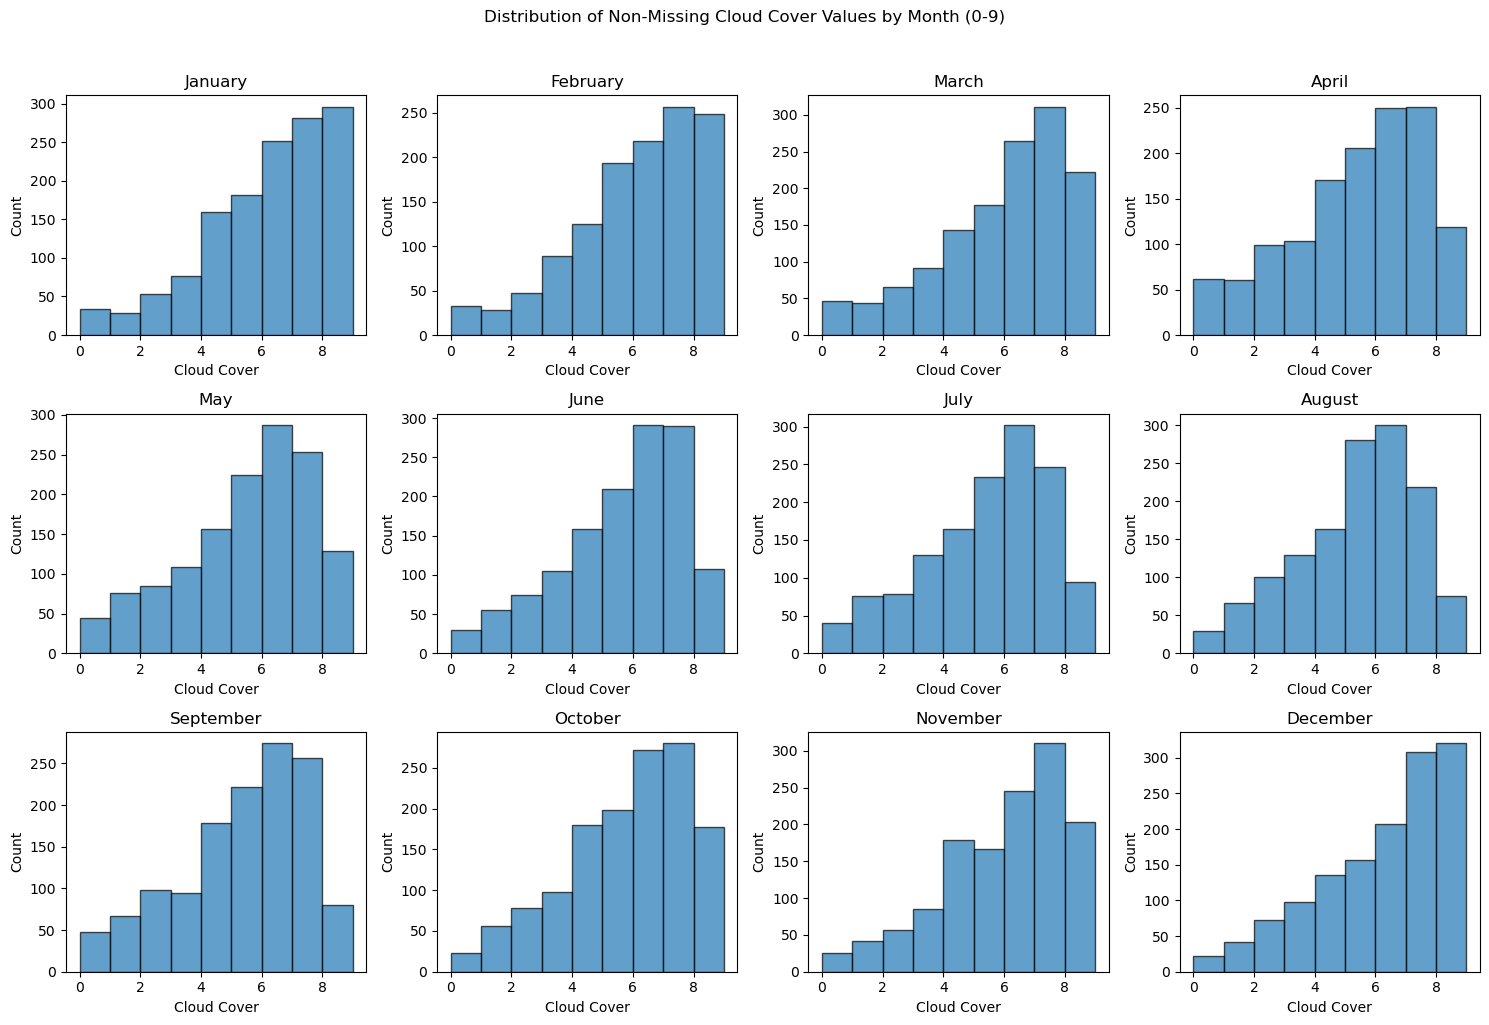

In [15]:
# Filter rows where 'CC' (cloud cover) is not missing
non_missing_data = lw_df[lw_df['CC'].notnull()]

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Non-Missing Cloud Cover Values by Month (0-9)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['CC']
    ax.hist(data_for_month, bins=range(10), alpha=0.7, edgecolor='black')
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Cloud Cover')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Here we have plotted the spread of `CC` as seen per month. Since it shows a general skew for each month, we can try to replace the missing values with corresponding median of each month. 

In [16]:
# Extract month and year from the 'DATE' column
lw_df['Month'] = lw_df['DATE'].dt.month
lw_df['Year'] = lw_df['DATE'].dt.year

# Calculate median values for each month
monthly_medians = lw_df.groupby(['Month', 'Year'])['CC'].median().reset_index()

# Define a function to fill missing values with the monthly median
def fill_missing_cc(row):
    mask = (monthly_medians['Month'] == row['Month']) & (monthly_medians['Year'] == row['Year'])
    median_value = monthly_medians.loc[mask, 'CC'].values
    return median_value[0] if len(median_value) > 0 else row['CC']

# Apply the fill_missing_cc function to fill missing values
lw_df['CC'] = lw_df.apply(lambda row: fill_missing_cc(row) if pd.isnull(row['CC']) else row['CC'], axis=1)

# Drop temporary 'Month' and 'Year' columns 
lw_df = lw_df.drop(['Month', 'Year'], axis=1)

# Display the DataFrame with filled missing values
print(lw_df)

            DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]


#### Humidity Null Values

In [17]:
# Check for missing values
lw_df.isna().sum()

DATE       0
CC         0
HU        57
QQ        25
TX         0
TN         0
TG         0
RR         0
PP         0
SD      1075
SS         0
dtype: int64

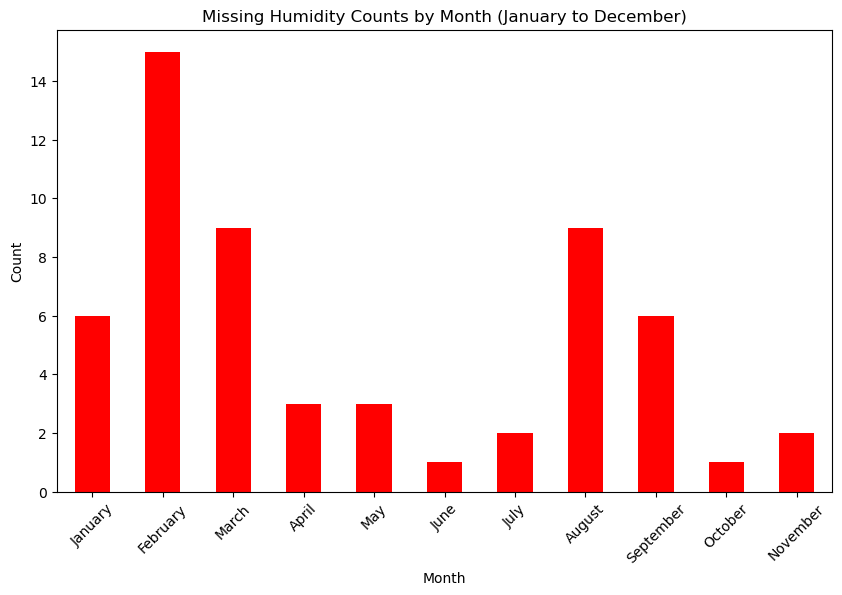

In [18]:
# Let's graph out the missing humidity values and group them by month
missing_dates = lw_df[lw_df['HU'].isnull()]['DATE']

# Extract the month component from the date
missing_months = missing_dates.dt.month

# Count occurrences of missing humidity per month across all available years
monthly_missing_counts = missing_months.value_counts().sort_index()

# Mapping month numbers to month names
months_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_missing_counts.index = monthly_missing_counts.index.map(months_mapping)

# Plotting missing humidity counts for each month across all years
plt.figure(figsize=(10, 6))
monthly_missing_counts.plot(kind='bar', color='red')
plt.title('Missing Humidity Counts by Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

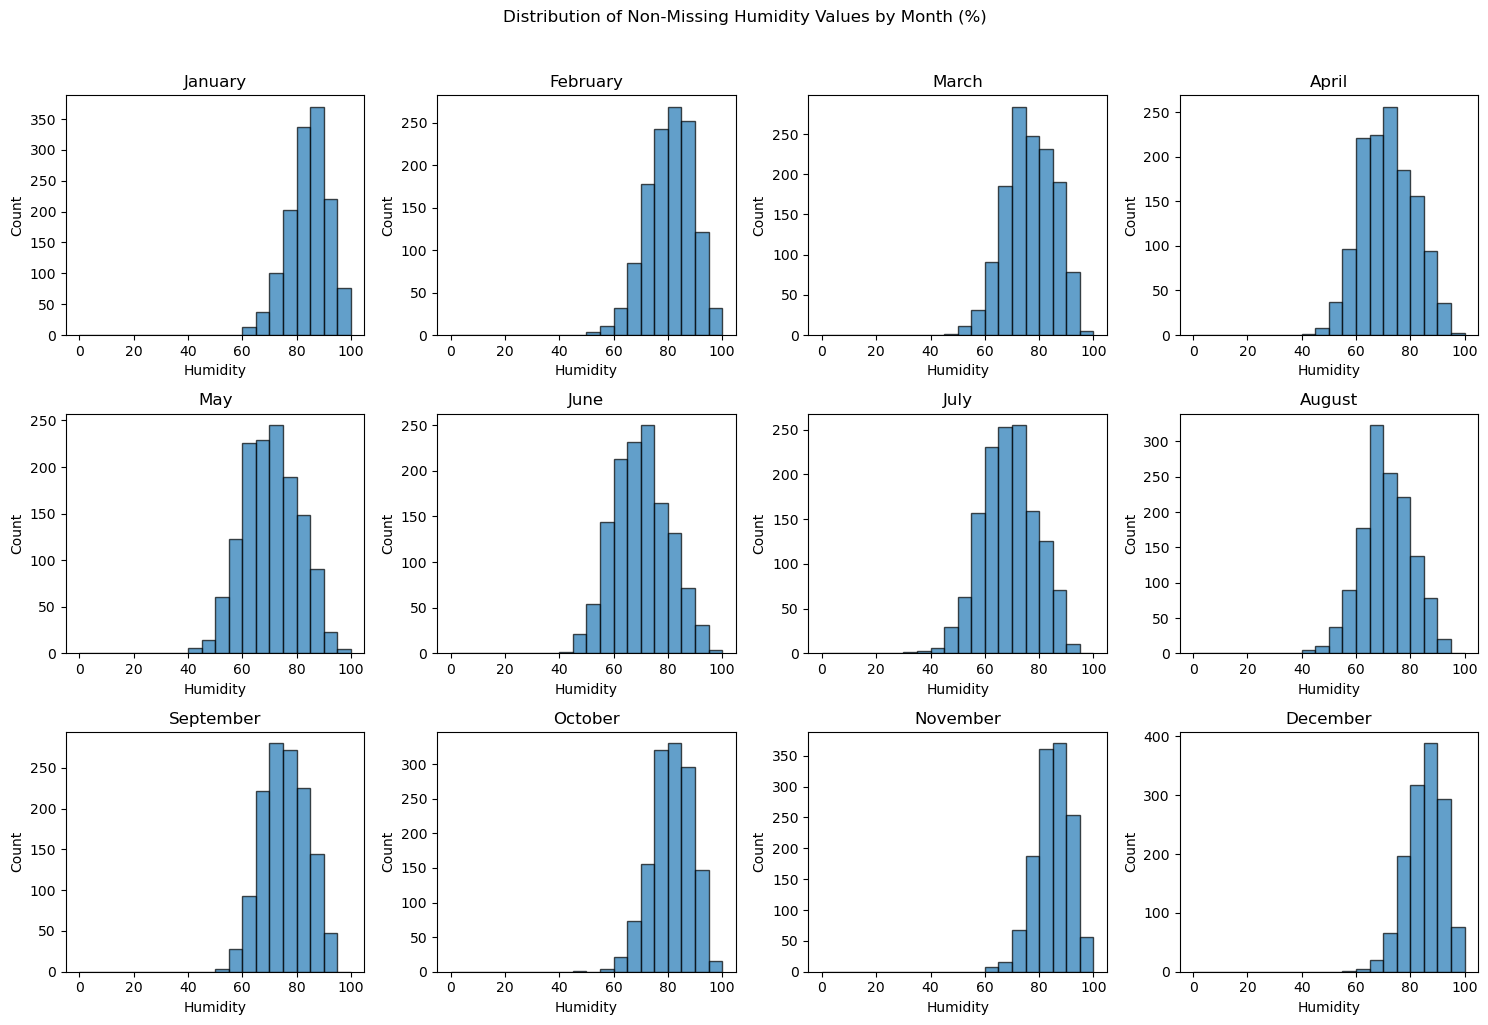

In [19]:
# Filter rows where 'HU' (humidity) is not missing
non_missing_data = lw_df[lw_df['HU'].notnull()]

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Non-Missing Humidity Values by Month (%)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['HU']
    ax.hist(data_for_month, bins=20, alpha=0.7, edgecolor='black', range=(0, 100))  
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Humidity')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

As each month generally shows a normal distribution, we can try to replace the null values with the corresponding monthly mean.

In [20]:
# Extract month and year from the 'DATE' column
lw_df['Month'] = lw_df['DATE'].dt.month
lw_df['Year'] = lw_df['DATE'].dt.year

# Calculate mean values for each month and broadcast back to the original DataFrame
lw_df['HU'] = lw_df['HU'].fillna(lw_df.groupby(['Month', 'Year'])['HU'].transform('mean'))

# Drop temporary 'Month' and 'Year' columns
lw_df = lw_df.drop(['Month', 'Year'], axis=1)

# Display the DataFrame with filled missing values
print(lw_df)

            DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]


#### Global Radiation Null Values

In [21]:
# Check for missing values
lw_df.isna().sum()

DATE       0
CC         0
HU         0
QQ        25
TX         0
TN         0
TG         0
RR         0
PP         0
SD      1075
SS         0
dtype: int64

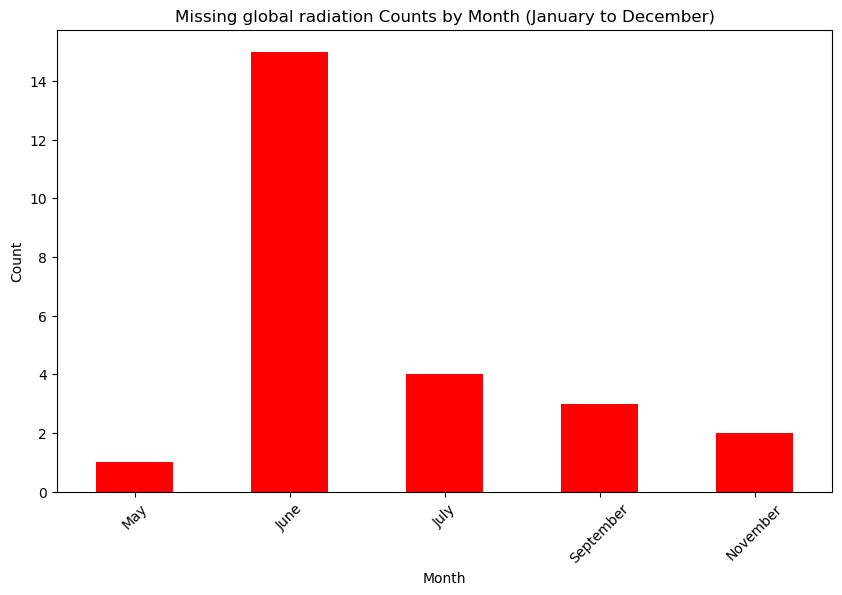

In [22]:
# Let's graph out the missing global radiation values and group them by month
missing_dates = lw_df[lw_df['QQ'].isnull()]['DATE']

# Extract the month component from the date
missing_months = missing_dates.dt.month

# Count occurrences of missing global radiation per month across all available years
monthly_missing_counts = missing_months.value_counts().sort_index()

# Mapping month numbers to month names
months_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_missing_counts.index = monthly_missing_counts.index.map(months_mapping)

# Plotting missing global radiation counts for each month across all years
plt.figure(figsize=(10, 6))
monthly_missing_counts.plot(kind='bar', color='red')
plt.title('Missing global radiation Counts by Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

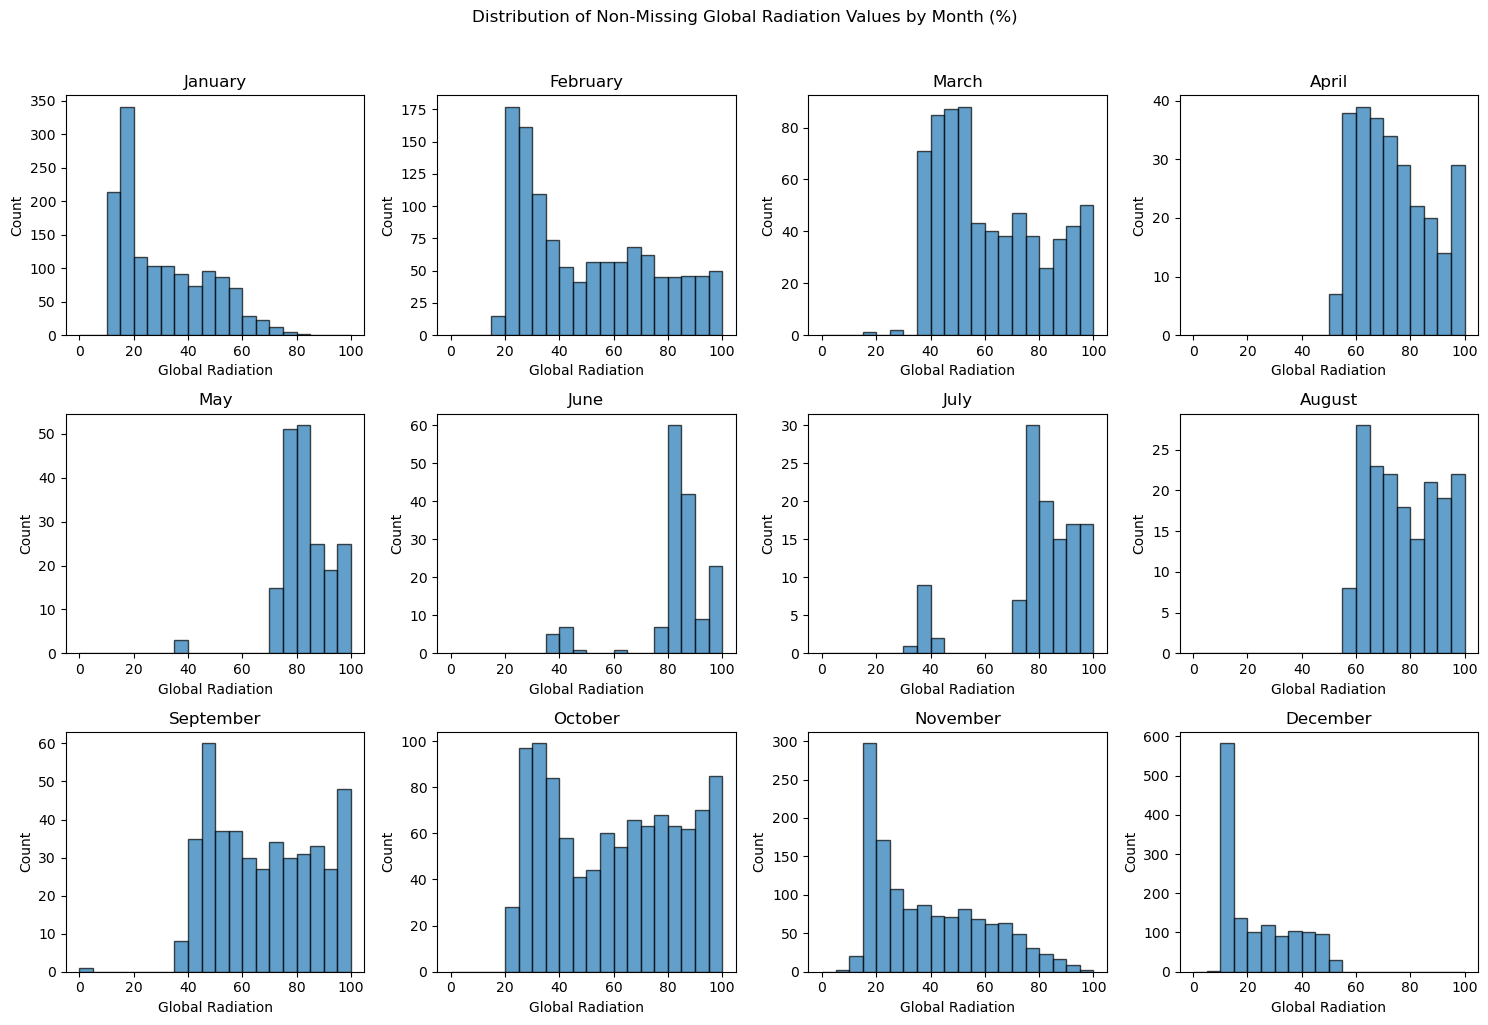

In [23]:
# Filter rows where 'QQ' (global radiation) is not missing
non_missing_data = lw_df[lw_df['QQ'].notnull()]

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Non-Missing Global Radiation Values by Month (%)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['QQ']
    ax.hist(data_for_month, bins=20, alpha=0.7, edgecolor='black', range=(0, 100))  # Adjust the number of bins and range
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Global Radiation')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

Since we can't find any distinguishable patters, we can opt in replacing every null value with their corresponding monthly median value. 

In [24]:
# Extract month and year from the 'DATE' column
lw_df['Month'] = lw_df['DATE'].dt.month
lw_df['Year'] = lw_df['DATE'].dt.year

# Calculate median values for each month and broadcast back to the original DataFrame
lw_df['QQ'] = lw_df['QQ'].fillna(lw_df.groupby(['Month', 'Year'])['QQ'].transform('median'))

# Drop temporary 'Month' and 'Year' columns
lw_df = lw_df.drop(['Month', 'Year'], axis=1)

# Display the DataFrame with filled missing values
print(lw_df)

            DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]


In [25]:
# Check for missing values
lw_df.isna().sum()

DATE       0
CC         0
HU         0
QQ         0
TX         0
TN         0
TG         0
RR         0
PP         0
SD      1075
SS         0
dtype: int64

#### Finally Snow Depth Null Values

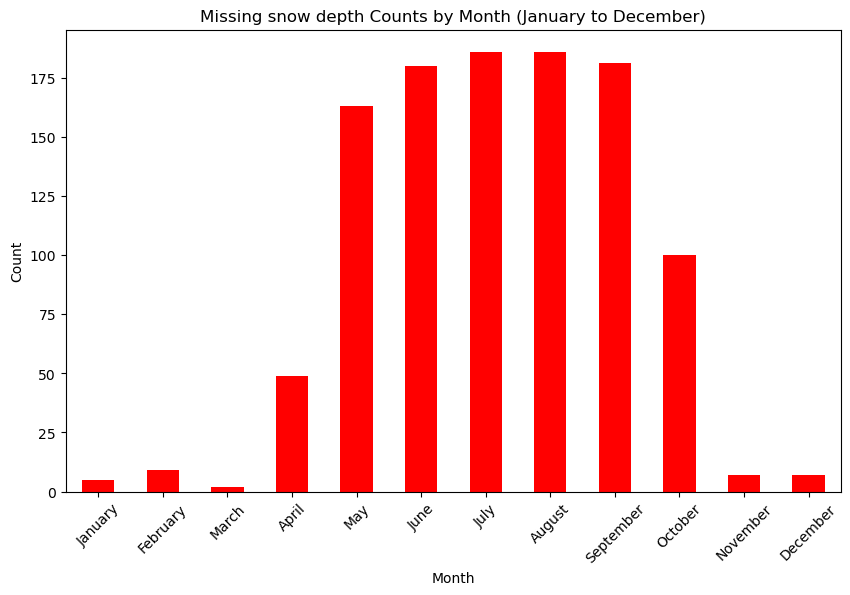

In [26]:
# Let's graph out the missing snow depth values and group them by month
missing_dates = lw_df[lw_df['SD'].isnull()]['DATE']

# Extract the month component from the date
missing_months = missing_dates.dt.month

# Count occurrences of missing snow depth per month across all available years
monthly_missing_counts = missing_months.value_counts().sort_index()

# Mapping month numbers to month names
months_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_missing_counts.index = monthly_missing_counts.index.map(months_mapping)

# Plotting missing snow depth counts for each month across all years
plt.figure(figsize=(10, 6))
monthly_missing_counts.plot(kind='bar', color='red')
plt.title('Missing snow depth Counts by Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

It likely could be there was no snow to measure from observing the above pattern. We can use a statistical measure (mean) to replace the null values. 

In [27]:
# Extract month and year from the 'DATE' column
lw_df['Month'] = lw_df['DATE'].dt.month
lw_df['Year'] = lw_df['DATE'].dt.year

# Calculate mean values for each month and broadcast back to the original DataFrame
lw_df['SD'] = lw_df['SD'].fillna(lw_df.groupby(['Month', 'Year'])['SD'].transform('mean'))

# Drop temporary 'Month' and 'Year' columns
lw_df = lw_df.drop(['Month', 'Year'], axis=1)

# Display the DataFrame with filled missing values
print(lw_df)

            DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]


In [28]:
# Check for missing values
lw_df.isnull().sum()

DATE      0
CC        0
HU        0
QQ        0
TX        0
TN        0
TG        0
RR        0
PP        0
SD      856
SS        0
dtype: int64

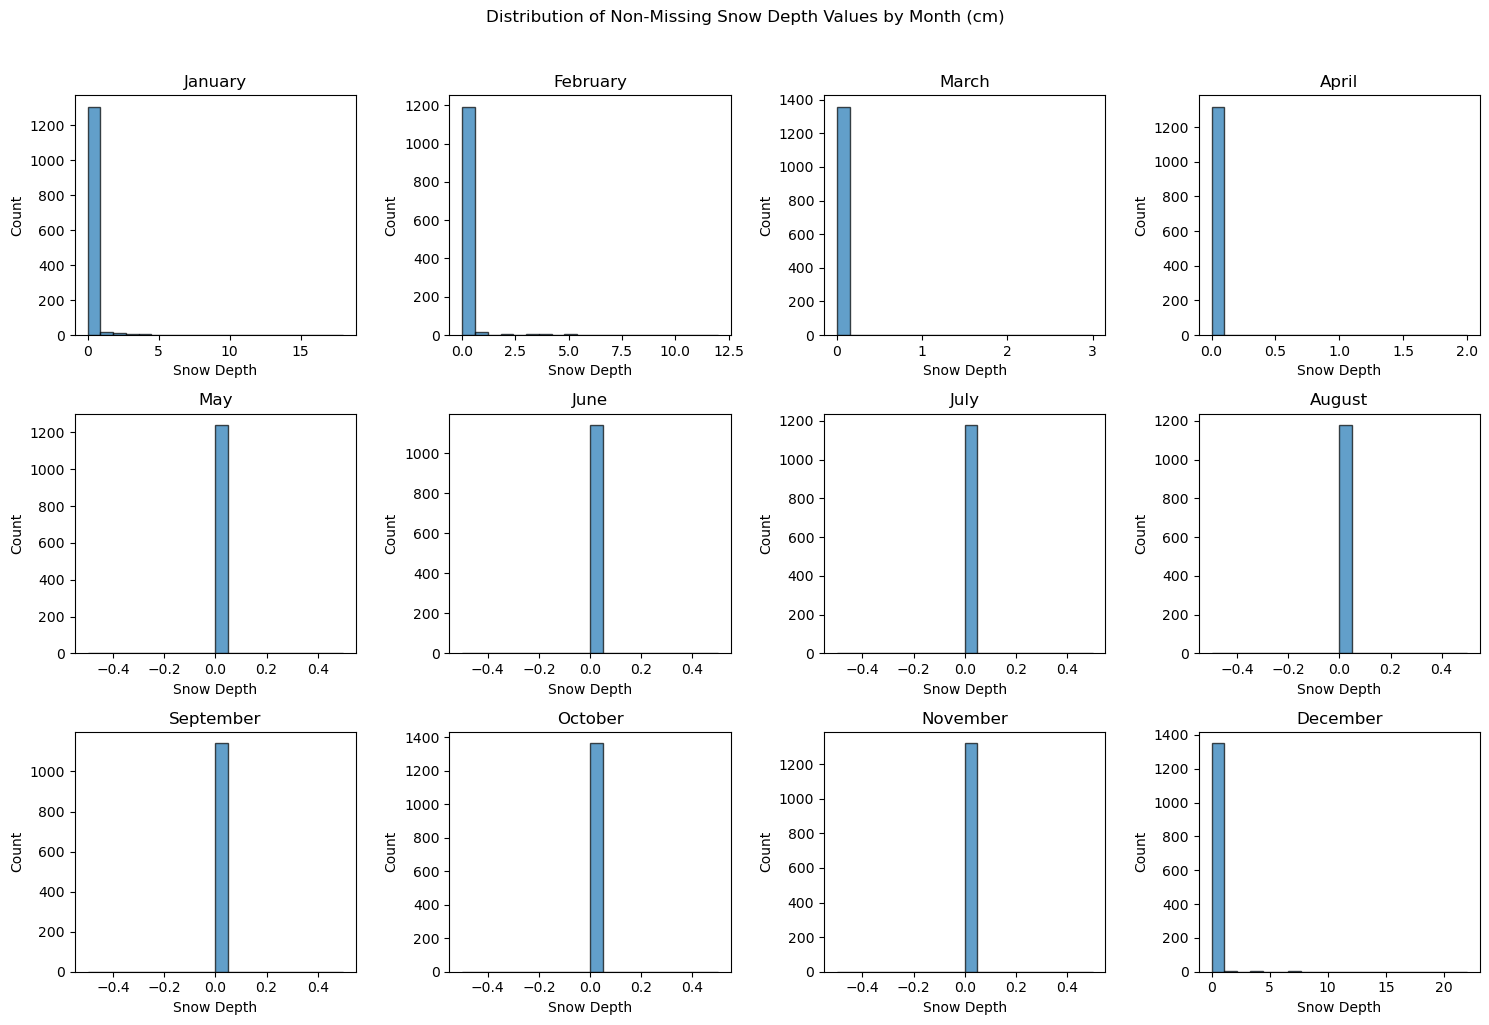

In [29]:
# Filter rows where 'SD' (snow depth) is not missing
non_missing_data = lw_df[lw_df['SD'].notnull()]

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Non-Missing Snow Depth Values by Month (cm)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['SD']
    ax.hist(data_for_month, bins=20, alpha=0.7, edgecolor='black')
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Snow Depth')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [30]:
non_missing_data = lw_df[lw_df['SD'].isna()]
non_missing_data['SD'].fillna(-1, inplace=True)

C:\Users\mitth\AppData\Local\Temp\ipykernel_6340\1604471252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_missing_data['SD'].fillna(-1, inplace=True)


In [31]:
non_missing_data

DATE   CC    HU     QQ    TX    TN    TG   RR      PP   SD    SS
10013 2006-06-01  6.0  73.0   97.0  16.2   5.3  10.8  0.0  1028.1 -1.0   0.3
10014 2006-06-02  3.0  72.0  244.0  20.6  10.0  15.3  0.0  1030.3 -1.0   7.7
10015 2006-06-03  0.0  56.0  333.0  24.2   9.9  17.0  0.0  1029.5 -1.0  14.4
10016 2006-06-04  4.0  60.0  255.0  23.6  11.5  17.6  0.4  1026.5 -1.0   8.4
10017 2006-06-05  4.0  67.0  284.0  20.1  12.9  16.5  0.0  1025.6 -1.0  10.5
...          ...  ...   ...    ...   ...   ...   ...  ...     ...  ...   ...
11956 2011-09-26  6.0  81.0   76.0  21.8  16.1  19.4  4.2  1020.5 -1.0   1.6
11957 2011-09-27  3.0  85.0  111.0  25.9  11.8  16.8  0.2  1028.4 -1.0   4.5
11958 2011-09-28  0.0  76.0  168.0  28.1  12.3  19.1  0.0  1026.3 -1.0  10.9
11959 2011-09-29  0.0  71.0  166.0  28.5  12.7  20.4  0.0  1023.4 -1.0  10.8
11960 2011-09-30  0.0  68.0  162.0  28.8  12.4  20.5  0.0  1022.6 -1.0  10.6

[856 rows x 11 columns]

C:\Users\mitth\AppData\Local\Temp\ipykernel_6340\3116736831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_missing_data['SD'].fillna(-10, inplace=True)


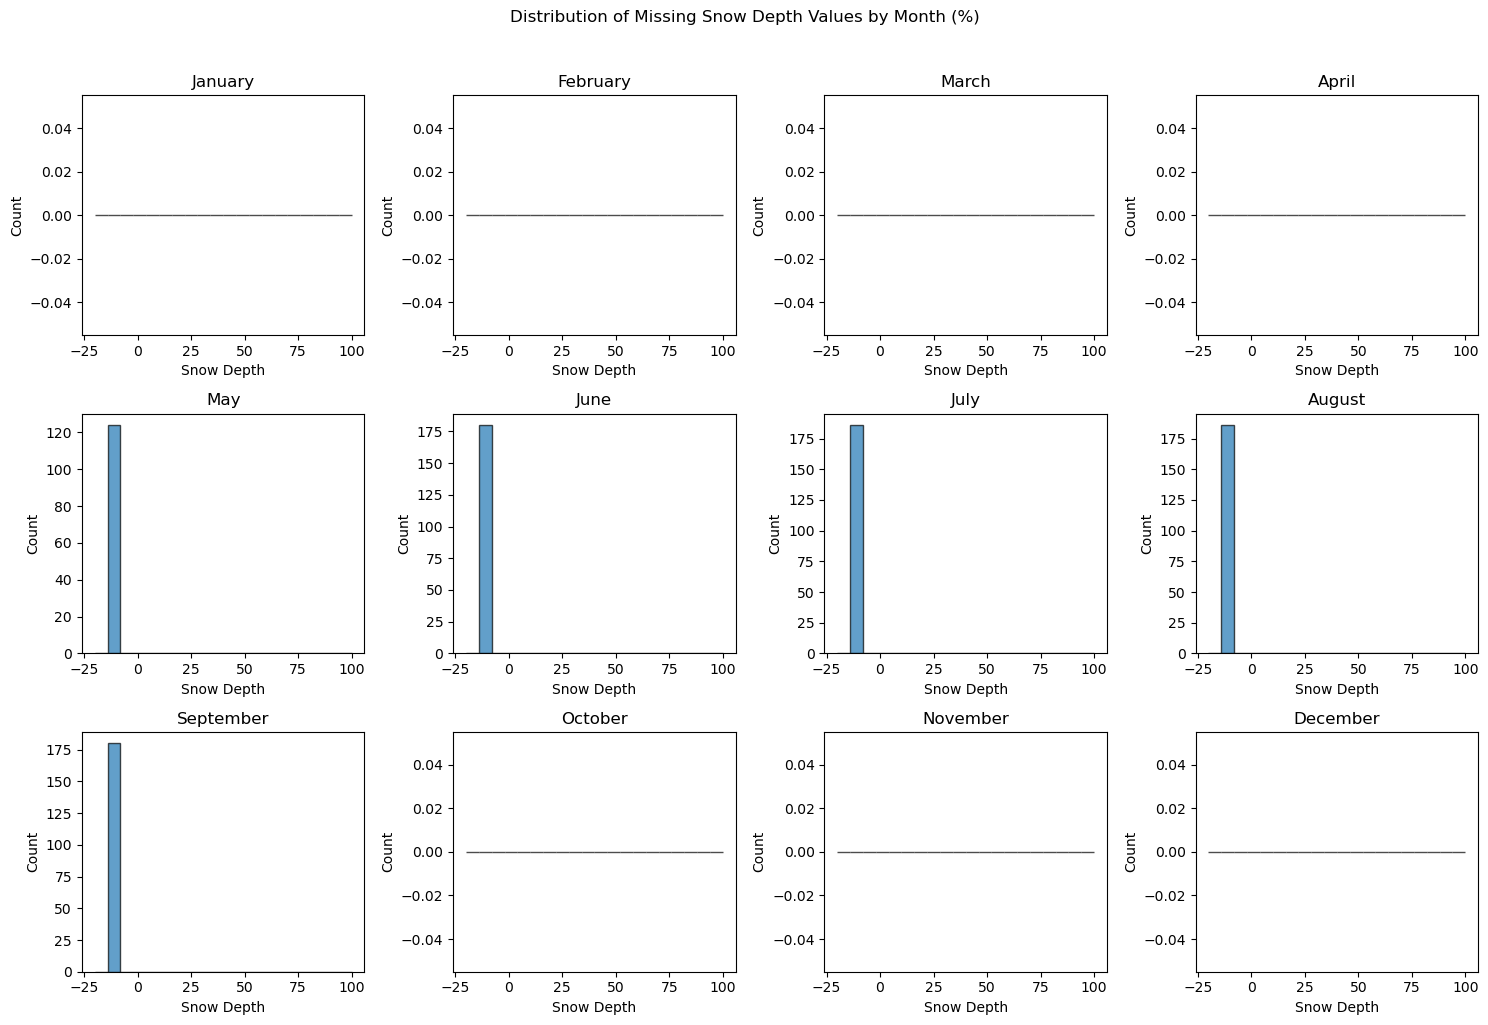

In [32]:
# Filter rows where 'SD' (snow depth) is missing
non_missing_data = lw_df[lw_df['SD'].isna()]
non_missing_data['SD'].fillna(-10, inplace=True)

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Missing Snow Depth Values by Month (%)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['SD']
    ax.hist(data_for_month, bins=20, alpha=0.7, edgecolor='black', range=(-20, 100))  # Adjust the number of bins and range
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Snow Depth')
    ax.set_ylabel('Count')
#     ax.set_xscale('log')

plt.tight_layout()
plt.show()

In [33]:
lw_df['Month'] = lw_df['DATE'].dt.month
lw_df['Year'] = lw_df['DATE'].dt.year

lw_df.loc[lw_df.groupby(['Year', 'Month'])['SD'].transform('mean').isnull()].groupby(['Month','Year'])['SD'].unique()

Month  Year
5      2008    [nan]
       2009    [nan]
       2010    [nan]
       2011    [nan]
6      2006    [nan]
       2007    [nan]
       2008    [nan]
       2009    [nan]
       2010    [nan]
       2011    [nan]
7      2006    [nan]
       2007    [nan]
       2008    [nan]
       2009    [nan]
       2010    [nan]
       2011    [nan]
8      2006    [nan]
       2007    [nan]
       2008    [nan]
       2009    [nan]
       2010    [nan]
       2011    [nan]
9      2006    [nan]
       2007    [nan]
       2008    [nan]
       2009    [nan]
       2010    [nan]
       2011    [nan]
Name: SD, dtype: object

In [34]:
lw_df.loc[np.where(lw_df["Month"].isin(lw_df.loc[lw_df.groupby(['Month', 'Year'])['SD'].transform('mean').isnull()]['Month'].unique()))]

DATE   CC    HU     QQ    TX    TN    TG    RR      PP   SD   SS  \
120   1979-05-01  8.0  86.0   86.0   8.0   3.8   5.6  14.2  1002.8  0.0  0.3   
121   1979-05-02  5.0  82.0  214.0  10.0   1.1   4.6   1.4  1004.8  0.0  7.2   
122   1979-05-03  3.0  80.0  245.0   9.1  -0.9   4.6   0.0  1009.3  0.0  9.4   
123   1979-05-04  3.0  76.0  252.0  11.1  -0.3   4.4   0.4  1015.9  0.0  9.9   
124   1979-05-05  4.0  80.0  243.0  12.4   1.7   6.4   0.0  1020.6  0.0  9.1   
...          ...  ...   ...    ...   ...   ...   ...   ...     ...  ...  ...   
15974 2022-09-26  8.0  72.0  105.0  15.0  11.1  13.4   0.0  1003.3  0.0  3.8   
15975 2022-09-27  6.0  77.0   85.0  15.6   8.6  11.8   1.6  1001.7  0.0  1.6   
15976 2022-09-28  4.0  73.0  104.0  16.9   5.2  10.4   0.0  1000.4  0.0  5.6   
15977 2022-09-29  5.0  73.0  126.0  16.7   5.9  11.4   0.0  1004.1  0.0  5.7   
15978 2022-09-30  7.0  89.0   63.0  19.4   7.4  12.1   8.2  1005.5  0.0  0.3   

       Month  Year  
120        5  1979  
121        5  1979  
122        5  1979  
123        5  1979  
124        5  1979  
...      ...   ...  
15974      9  2022  
15975      9  2022  
15976      9  2022  
15977      9  2022  
15978      9  2022  

[6732 rows x 13 columns]

The reason subbing the mean in for the null values doesn't work is likely because the average is NaN. Hence, we can approach the remaining null values as 0. We move with the assumption that there were no values as there was no snow depth to record.

In [35]:
lw_df['SD'].fillna(0, inplace=True)

In [36]:
lw_df.isnull().sum()

DATE     0
CC       0
HU       0
QQ       0
TX       0
TN       0
TG       0
RR       0
PP       0
SD       0
SS       0
Month    0
Year     0
dtype: int64

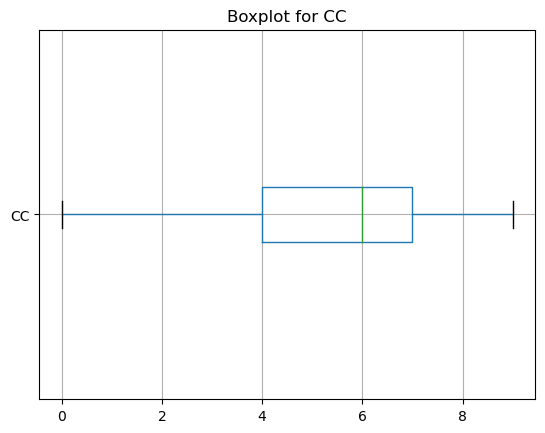

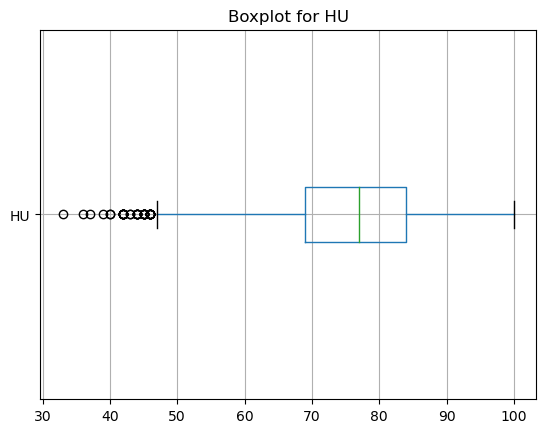

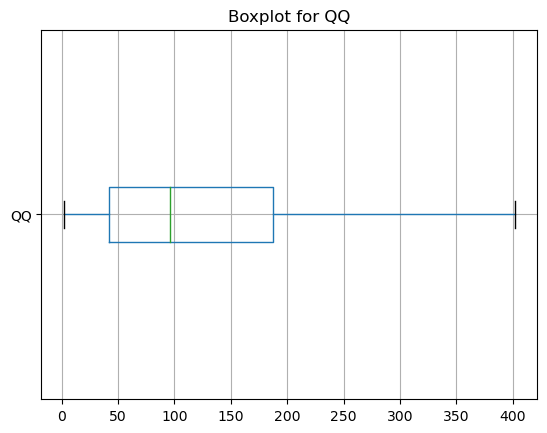

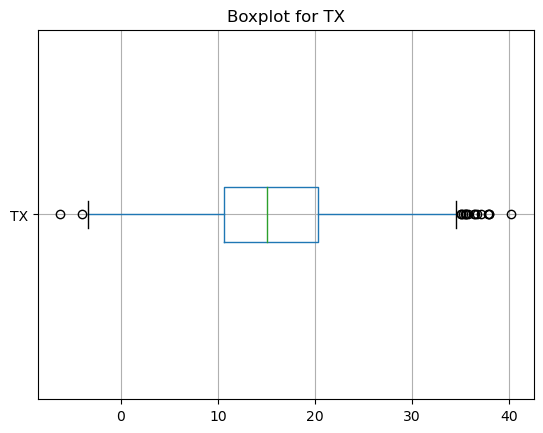

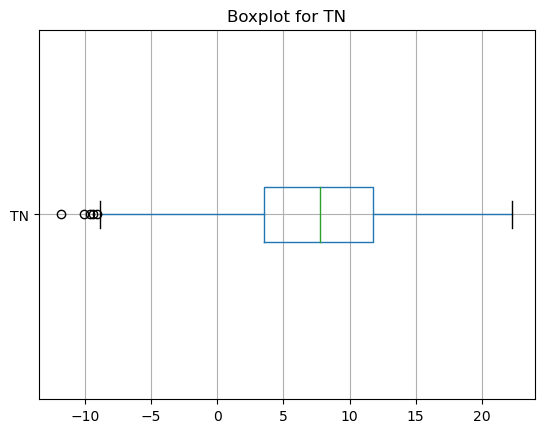

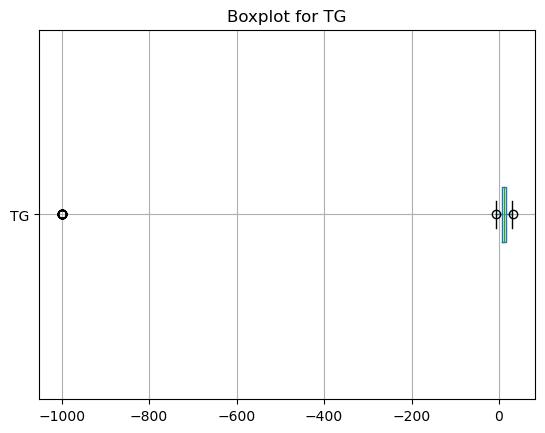

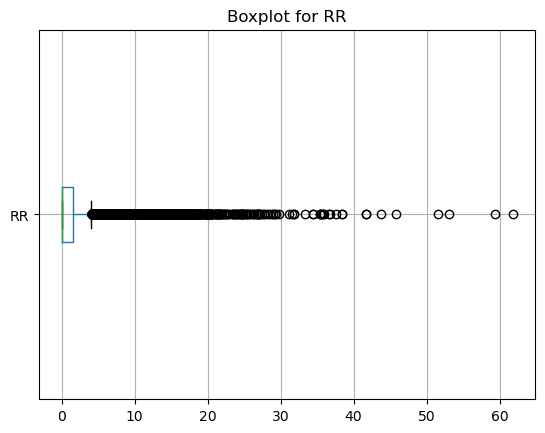

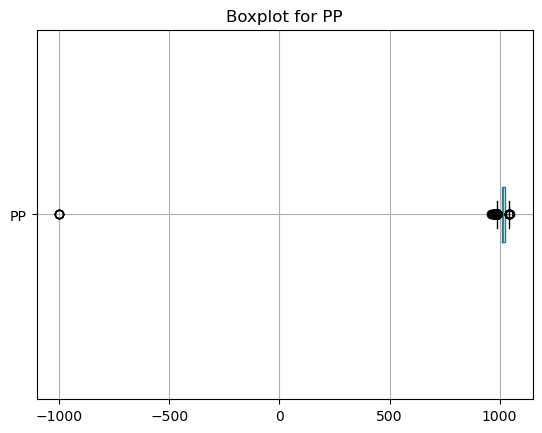

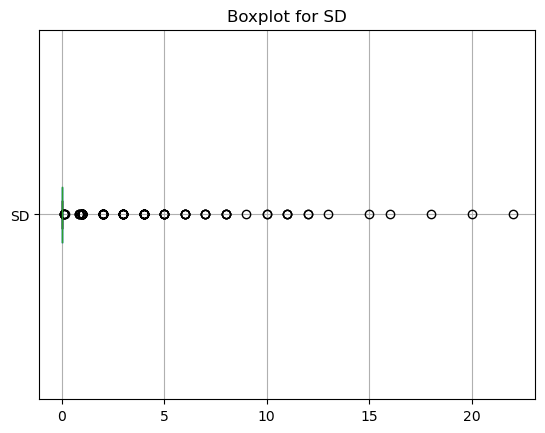

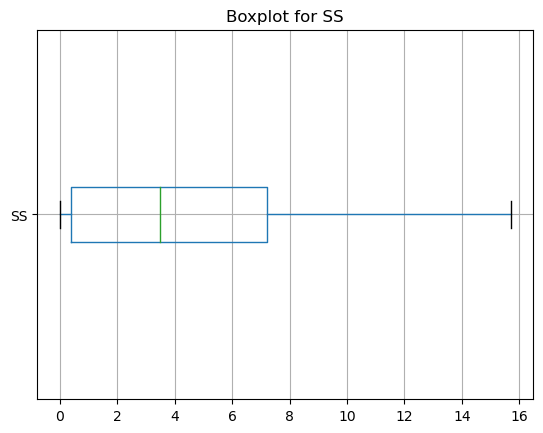

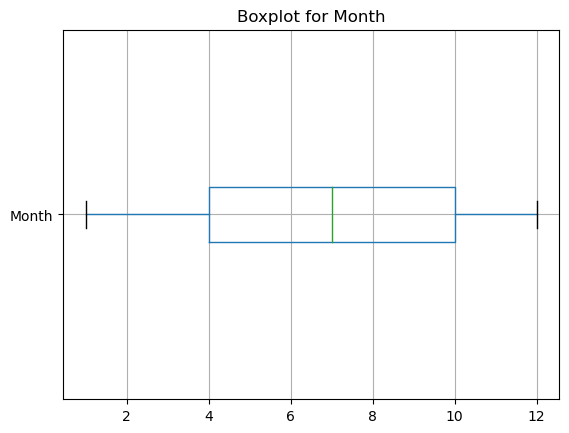

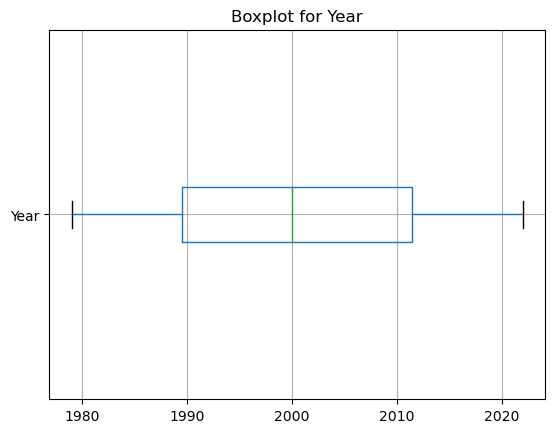

In [37]:
# Creating a boxplot to check for anomalies 
# Exclude 'DATE' column
columns_to_plot = [column for column in lw_df.columns if column != 'DATE']

for column in columns_to_plot:
    plt.figure()
    plt.title(f"Boxplot for {column}")
    lw_df.boxplot(column=column, vert=False)
    plt.show()

#### Need to look into following for outliers:
- TG mean temperature, close to -1000 values
- PP pressure, close to -1000 values

In [38]:
#Finding out how many values are below an extreme value
num_values_less_than_minus_200 = (lw_df['TG'] < -200).sum()

print(f"Number of values in 'TG' column less than -200: {num_values_less_than_minus_200}")

Number of values in 'TG' column less than -200: 29


In [39]:
#Finding out what the value is
values_less_than_minus_200 = lw_df.loc[lw_df['TG'] < -200, 'TG']

# Display the values
print("Values in 'TG' column less than -200:")
print(values_less_than_minus_200)

Values in 'TG' column less than -200:
9751    -999.9
9784    -999.9
9860    -999.9
9870    -999.9
9895    -999.9
9937    -999.9
9985    -999.9
10107   -999.9
10173   -999.9
10196   -999.9
10199   -999.9
10276   -999.9
10310   -999.9
10316   -999.9
10368   -999.9
10498   -999.9
10502   -999.9
10525   -999.9
10595   -999.9
10662   -999.9
10702   -999.9
10739   -999.9
10751   -999.9
10810   -999.9
10814   -999.9
10903   -999.9
11015   -999.9
11060   -999.9
11082   -999.9
Name: TG, dtype: float64


From our supplementary document, we know these represent null values. We should now convert them.

In [40]:
lw_df['TG'].replace(-999.9, pd.NA, inplace=True)

# Count the occurrences of pd.NA in the 'TG' column
missing_counts = lw_df['TG'].isna().sum()

# Print the counts
print(missing_counts)

29


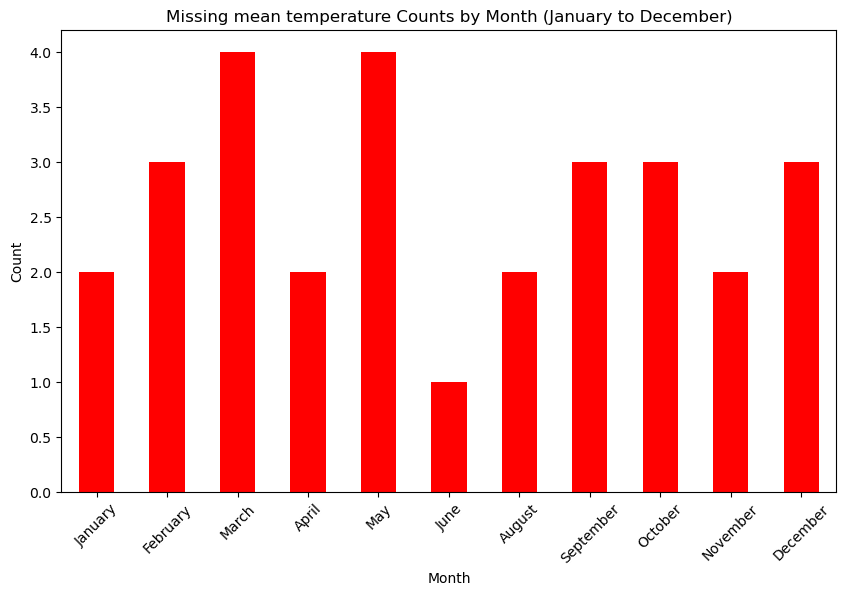

In [41]:
# Let's graph out the missing mean temperature values and group them by month
missing_dates = lw_df[lw_df['TG'].isnull()]['DATE']

# Extract the month component from the date
missing_months = missing_dates.dt.month

# Count occurrences of missing mean temperature per month across all available years
monthly_missing_counts = missing_months.value_counts().sort_index()

# Mapping month numbers to month names
months_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
monthly_missing_counts.index = monthly_missing_counts.index.map(months_mapping)

# Plotting missing mean temperature counts for each month across all years
plt.figure(figsize=(10, 6))
monthly_missing_counts.plot(kind='bar', color='red')
plt.title('Missing mean temperature Counts by Month (January to December)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
plt.show()

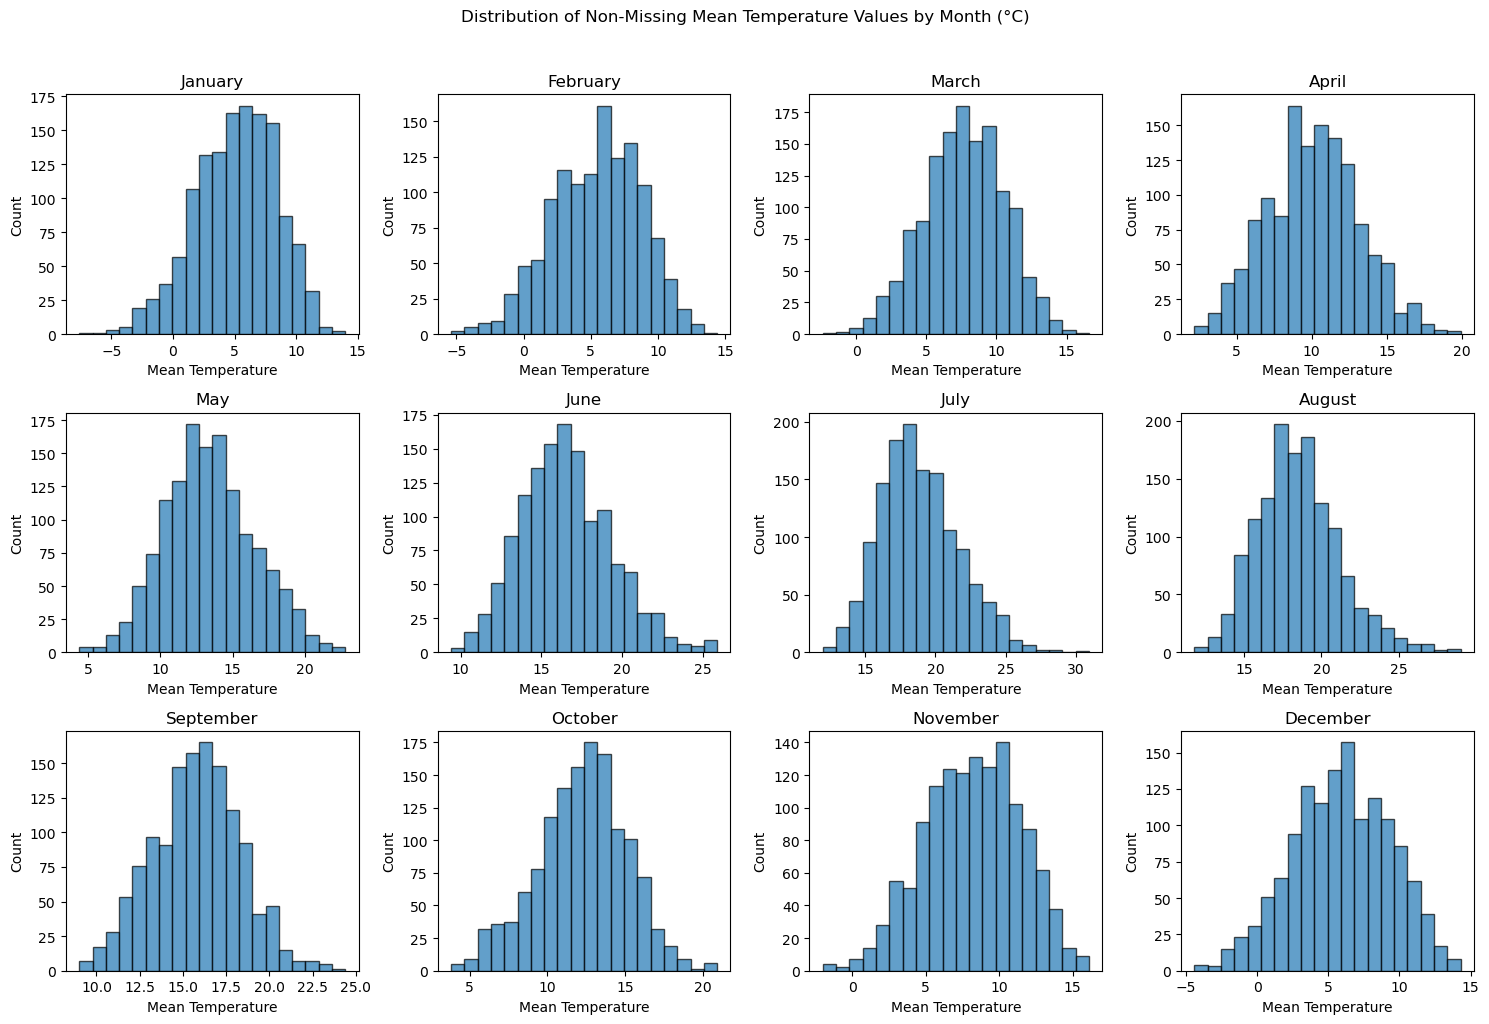

In [42]:
# Filter rows where 'TG' (mean temperature) is not missing
non_missing_data = lw_df[lw_df['TG'].notnull()]

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Non-Missing Mean Temperature Values by Month (°C)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['TG']
    ax.hist(data_for_month, bins=20, alpha=0.7, edgecolor='black')
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Mean Temperature')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

We'll use the mean of each month to fill in the null values

In [43]:
# Extract month and year from the 'DATE' column
lw_df['Month'] = lw_df['DATE'].dt.month
lw_df['Year'] = lw_df['DATE'].dt.year

# Calculate mean values for each month and broadcast back to the original DataFrame
lw_df['TG'] = lw_df['TG'].fillna(lw_df.groupby(['Month', 'Year'])['SD'].transform('mean'))

# Drop temporary 'Month' and 'Year' columns
lw_df = lw_df.drop(['Month', 'Year'], axis=1)

# Display the DataFrame with filled missing values
print(lw_df)

            DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]


In [44]:
lw_df.isnull().sum()

DATE    0
CC      0
HU      0
QQ      0
TX      0
TN      0
TG      0
RR      0
PP      0
SD      0
SS      0
dtype: int64

#### Now Pressure

In [45]:
# Assuming lw_df is your DataFrame
num_values_less_than_minus_200 = (lw_df['PP'] < -100).sum()

print(f"Number of values in 'PP' column less than -100: {num_values_less_than_minus_200}")

Number of values in 'PP' column less than -100: 4


In [46]:
#Finding out what the value is
values_less_than_minus_200 = lw_df.loc[lw_df['PP'] < -100, 'PP']

# Display the values
print("Values in 'TG' column less than -100:")
print(values_less_than_minus_200)

Values in 'TG' column less than -100:
362     -999.9
10101   -999.9
11013   -999.9
11014   -999.9
Name: PP, dtype: float64


In [47]:
lw_df['PP'].replace(-999.9, pd.NA, inplace=True)

# Count the occurrences of pd.NA in the 'PP' column
missing_counts = lw_df['PP'].isna().sum()

# Print the counts
print(missing_counts)

4


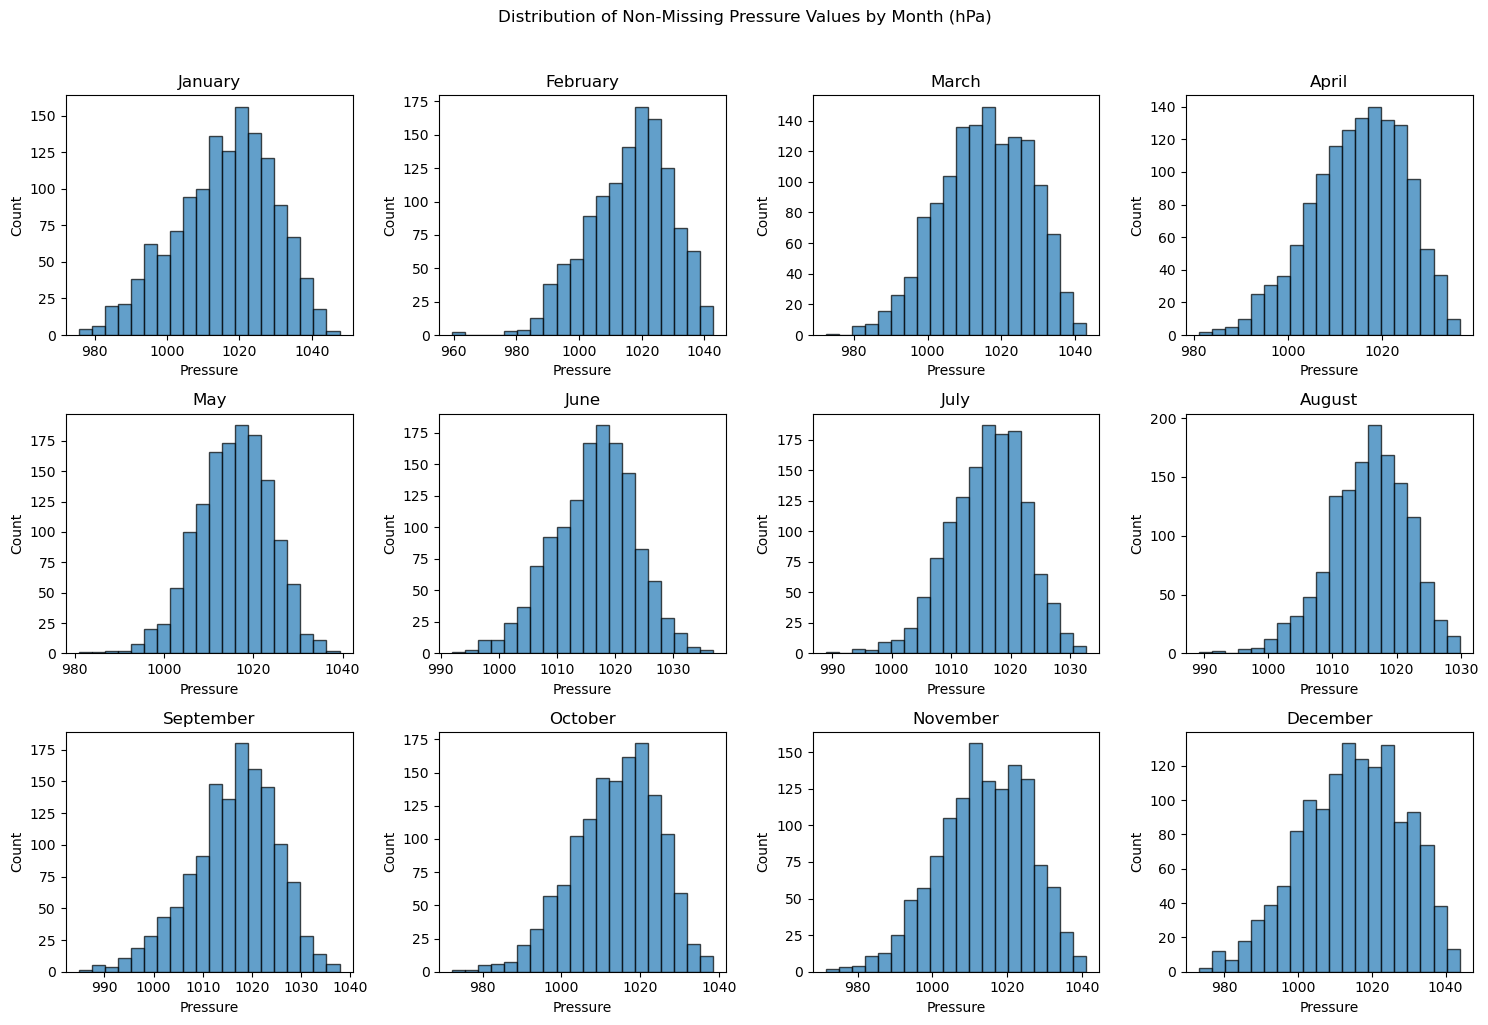

In [48]:
# Filter rows where 'PP' (pressure) is not missing
non_missing_data = lw_df[lw_df['PP'].notnull()]

# Create subplots for each month
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
fig.suptitle('Distribution of Non-Missing Pressure Values by Month (hPa)', y=1.02)

for ax, month in zip(axes.flatten(), range(1, 13)):
    data_for_month = non_missing_data[non_missing_data['DATE'].dt.month == month]['PP']
    ax.hist(data_for_month, bins=20, alpha=0.7, edgecolor='black')
    ax.set_title(months_mapping[month])
    ax.set_xlabel('Pressure')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

We'll use the mean of each month to fill in the null values

In [49]:
# Extract month and year from the 'DATE' column
lw_df['Month'] = lw_df['DATE'].dt.month
lw_df['Year'] = lw_df['DATE'].dt.year

# Calculate pressure values for each month and broadcast back to the original DataFrame
lw_df['PP'] = lw_df['PP'].fillna(lw_df.groupby(['Month', 'Year'])['PP'].transform('mean'))

# Drop temporary 'Month' and 'Year' columns
lw_df = lw_df.drop(['Month', 'Year'], axis=1)

# Display the DataFrame with filled missing values
print(lw_df)

            DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]


In [50]:
lw_df.isnull().sum()

DATE    0
CC      0
HU      0
QQ      0
TX      0
TN      0
TG      0
RR      0
PP      0
SD      0
SS      0
dtype: int64

In [51]:
mask = lw_df['TX'] < lw_df['TN']

# Count the number of True values in the mask (i.e., number of rows where TX < TN)
count = mask.sum()

print("Number of values where TX < TN:", count)

Number of values where TX < TN: 251


In [52]:
print("Original DataFrame:")
print(lw_df[mask_tx_lt_tn])  # Display the rows where TX < TN in the original DataFrame

Original DataFrame:


NameError: name 'mask_tx_lt_tn' is not defined

The issue is that TX and TN values are now 6 d.p for 251 records, we need to make sure they're rounded to 1 d.p

In [ ]:
# Round the replaced TX and TN values to 1 decimal place
lw_df.loc[mask_tx_lt_tn, 'TX'] = lw_df.loc[mask_tx_lt_tn, 'TX'].round(1)
lw_df.loc[mask_tx_lt_tn, 'TN'] = lw_df.loc[mask_tx_lt_tn, 'TN'].round(1)

In [ ]:
mask = lw_df['TX'] < lw_df['TN']

# Count the number of True values in the mask (i.e., number of rows where TX < TN)
count = mask.sum()

print("Number of values where TX < TN:", count)

Number of values where TX < TN: 0


In [ ]:
mask = lw_df['TX'] < lw_df['TG']

# Count the number of True values in the mask (i.e., number of rows where TX < TN)
count = mask.sum()

print("Number of values where TX < TG:", count)

Number of values where TX < TG: 941


In [ ]:
print("Original DataFrame:")
print(lw_df[lw_df['TX'] < lw_df['TG']])

Original DataFrame:
            DATE   CC    HU     QQ    TX    TN    TG    RR      PP   SD   SS
7     1979-01-08  8.0  95.0   15.0   5.8   5.3   6.9   0.8  1018.7  0.0  0.1
16    1979-01-17  8.0  93.0   15.0   1.9   1.6   2.1   2.5  1022.2  0.0  0.0
31    1979-02-01  8.0  96.0   19.0   4.0   1.2   5.2  10.1   994.9  0.0  0.0
61    1979-03-03  8.0  88.0   40.0  10.5   9.4  11.0   5.3  1018.5  0.0  0.1
70    1979-03-12  5.0  71.0  115.0   4.9   3.7   7.2   1.1  1008.8  0.0  4.8
...          ...  ...   ...    ...   ...   ...   ...   ...     ...  ...  ...
15960 2022-09-12  7.0  74.0  142.0  18.8  14.8  20.5   0.0  1011.9  0.0  4.4
16037 2022-11-28  4.0  92.0   35.0   7.3   4.4   8.2   0.4  1009.5  0.0  2.6
16039 2022-11-30  5.0  92.0   38.0   7.2   6.0   8.0   0.0  1025.5  0.0  2.3
16042 2022-12-03  8.0  77.0   13.0   6.1   4.7   6.2   0.2  1020.6  0.0  0.0
16064 2022-12-25  8.0  89.0   16.0   8.2   6.8   9.3   1.6  1007.8  0.0  0.3

[941 rows x 11 columns]


In [ ]:
# Calculate mean TG and TN values for each month
monthly_means = lw_df.groupby(lw_df.index.month)[['TX', 'TG']].transform('mean')

# Replace TG and TN values where TG < TN with monthly means
mask = lw_df['TX'] < lw_df['TG']
lw_df.loc[mask, ['TX', 'TG']] = monthly_means[mask]

# Print the updated DataFrame
print(lw_df)

             CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
DATE                                                               
1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...         ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 10 columns]


In [ ]:
mask = lw_df['TX'] < lw_df['TG']

# Count the number of True values in the mask (i.e., number of rows where TX < TG)
count = mask.sum()

print("Number of values where TX < TG:", count)

Number of values where TX < TG: 0


In [ ]:
mask = lw_df['TG'] < lw_df['TN']

# Count the number of True values in the mask (i.e., number of rows where TX < TN)
count = mask.sum()

print("Number of values where TG < TN:", count)

Number of values where TG < TN: 41


In [ ]:
print("Original DataFrame:")
print(lw_df[lw_df['TG'] < lw_df['TN']])

Original DataFrame:
             CC     HU     QQ    TX    TN   TG    RR      PP   SD    SS
DATE                                                                   
1979-02-14  6.0  86.00   54.0   8.7   3.7  0.2   0.0   993.8  1.0   2.4
1985-01-15  6.0  80.00   37.0   8.1   2.4 -0.7   0.1  1025.1  1.0   2.7
1985-02-09  8.0  89.00   22.0   8.7   3.7  0.2   4.2  1005.1  4.0   0.0
1985-12-27  6.0  69.00   34.0   8.8   4.9  1.6   0.0  1009.8  0.0   3.2
1987-01-10  7.0  78.00   19.0   8.1   2.4 -0.7   0.1  1014.2  0.0   0.4
1987-01-11  3.0  72.00   41.0   8.1   2.4 -0.7   0.6  1026.5  0.0   3.7
1991-02-06  4.0  73.00   46.0   8.7   3.7  0.2   0.4  1029.2  0.0   2.1
1994-02-13  7.0  65.00   36.0   8.7   3.7  0.2   0.8  1025.6  0.0   0.7
1995-12-05  7.0  75.00   31.0   8.8   4.9  1.6   2.0  1024.6  0.0   2.2
1996-01-25  8.0  78.00   17.0   8.1   2.4 -0.7   0.0  1012.5  0.0   0.0
1997-01-06  7.0  69.00   13.0   8.1   2.4 -0.7   0.0  1020.5  0.0   0.0
2005-09-12  7.0  75.00  153.0  22.2  14.2  0

In [ ]:
# Calculate mean TG and TN values for each month
monthly_means = lw_df.groupby(lw_df.index.month)[['TG', 'TN']].transform('mean')

# Replace TG and TN values where TG < TN with monthly means
mask = lw_df['TG'] < lw_df['TN']
lw_df.loc[mask, ['TG', 'TN']] = monthly_means[mask]

# Print the updated DataFrame
print(lw_df)

             CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
DATE                                                               
1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...         ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 10 columns]


In [ ]:
mask = lw_df['TG'] < lw_df['TN']

# Count the number of True values in the mask (i.e., number of rows where TX < TN)
count = mask.sum()

print("Number of values where TG < TN:", count)

Number of values where TG < TN: 0


### Visualising the features

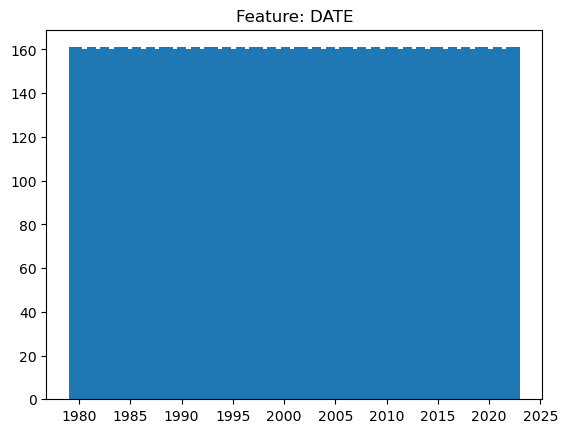

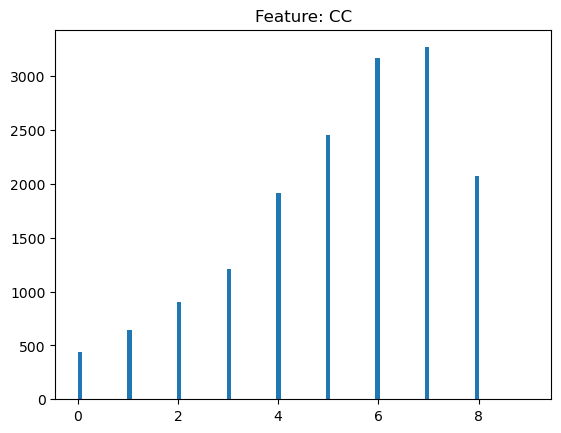

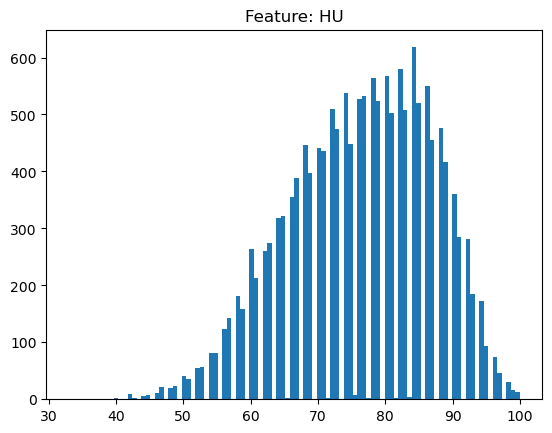

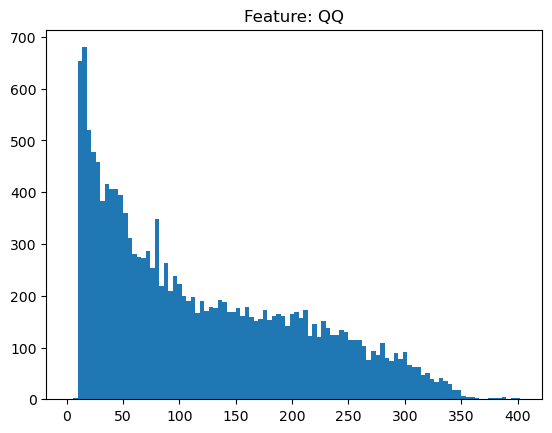

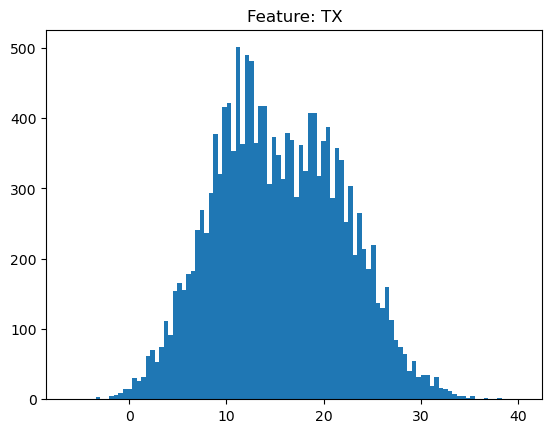

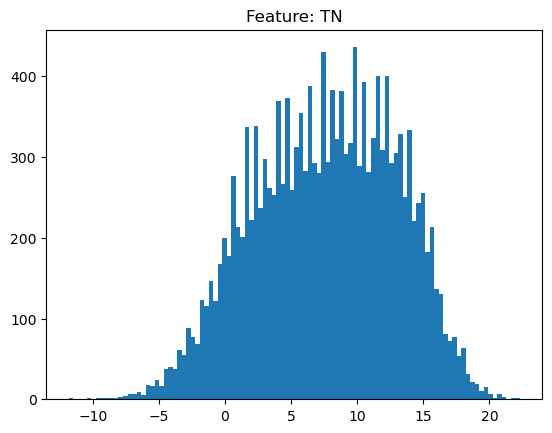

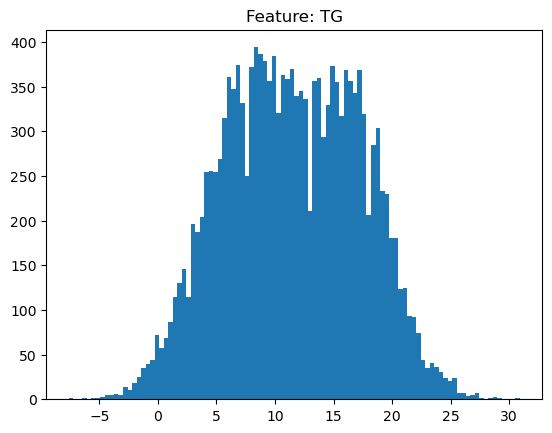

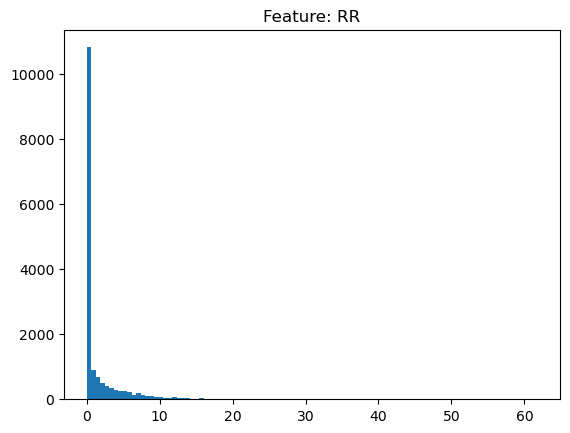

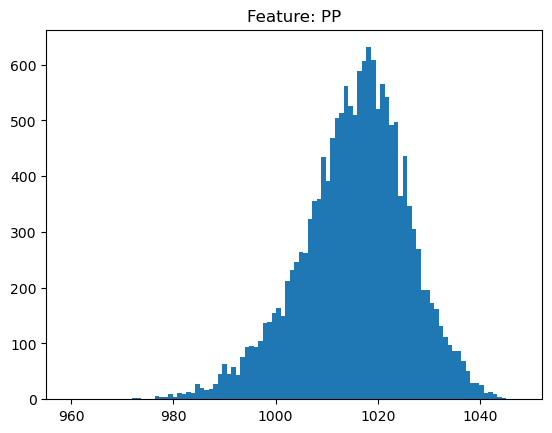

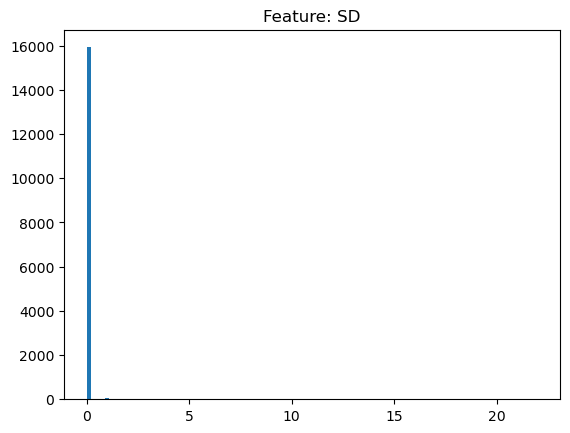

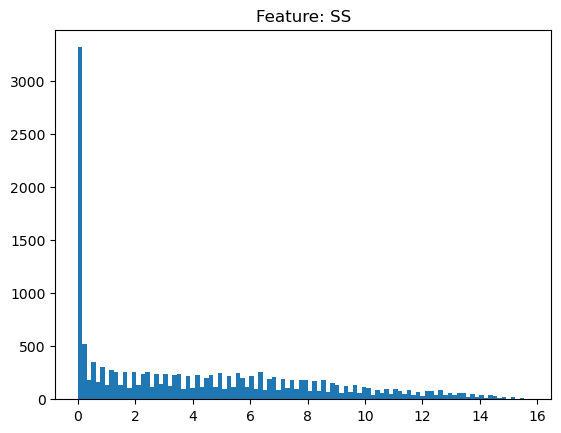

In [ ]:
for column in lw_df.columns:
    plt.figure()
    plt.title(f"Feature: {column}")
    plt.hist(lw_df[column], bins=100)
    plt.show()

In [53]:
x

NameError: name 'x' is not defined

### Pearson correlation

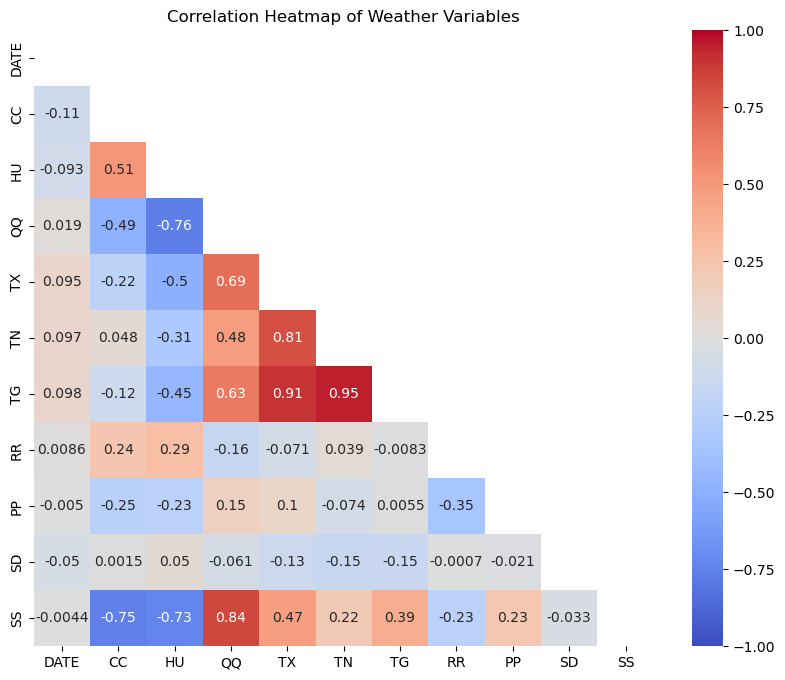

In [54]:
# Selecting weather variables for correlation analysis
weather_variables = lw_df.columns

# Calculating correlation matrix
correlation_matrix = lw_df[weather_variables].corr()

# Mask for the upper triangle
mask = ~np.tri(correlation_matrix.shape[0], k=-1, dtype=bool)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', center=0, vmin=-1, vmax=1, annot=True)
plt.title('Correlation Heatmap of Weather Variables')
plt.show()

Scatter plot of each feature with respect to precipiation (RR)

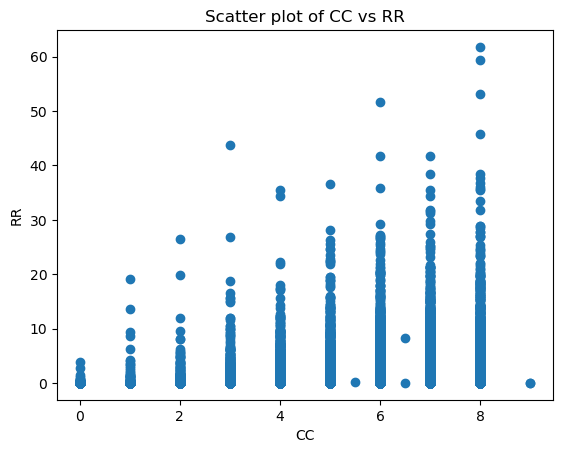

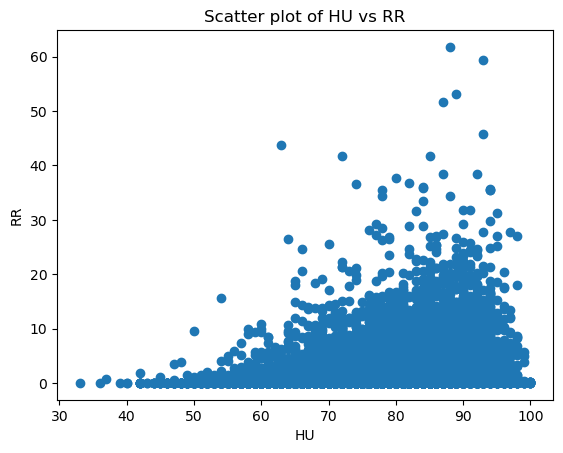

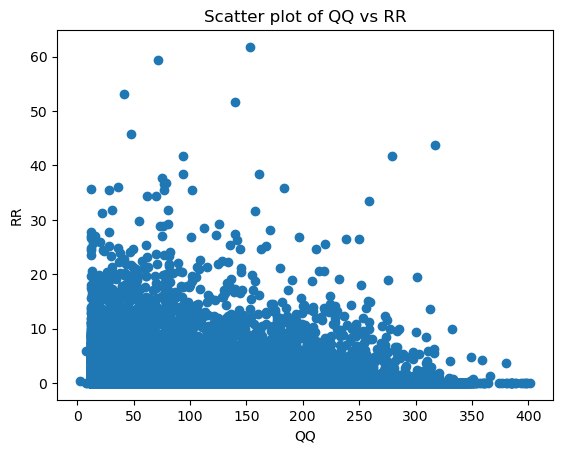

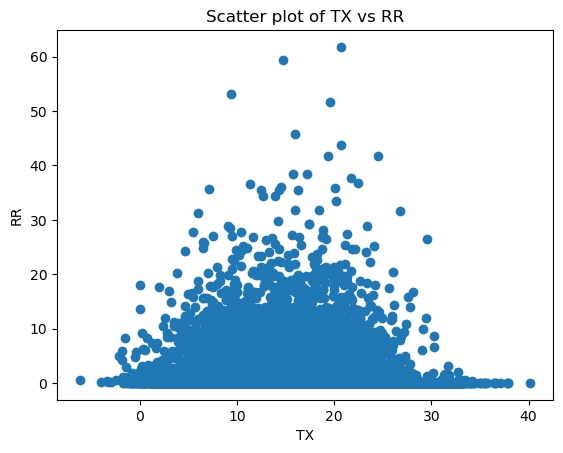

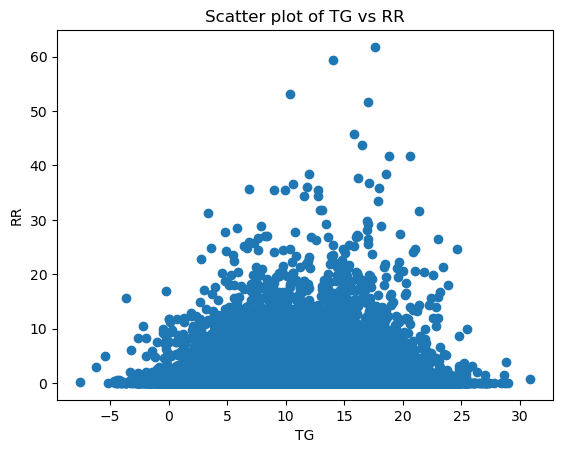

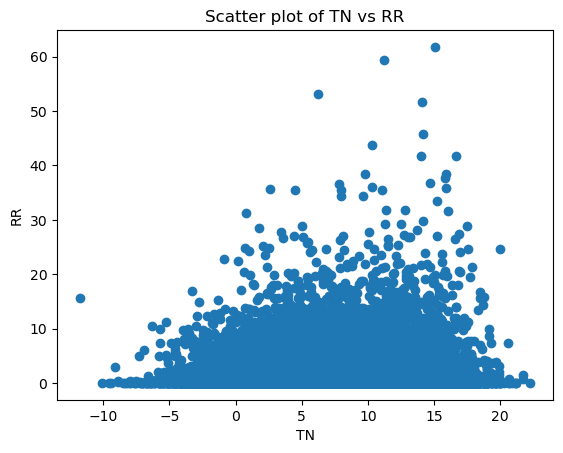

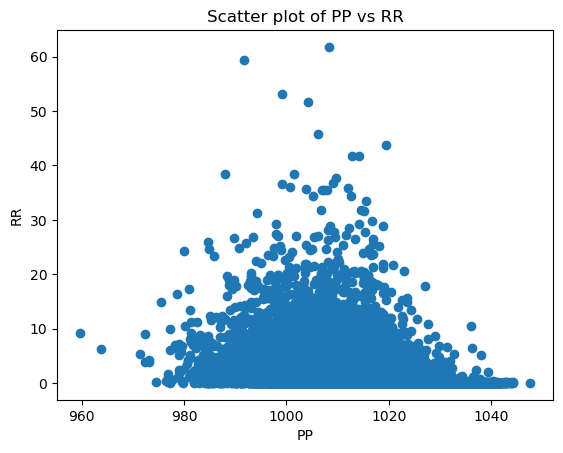

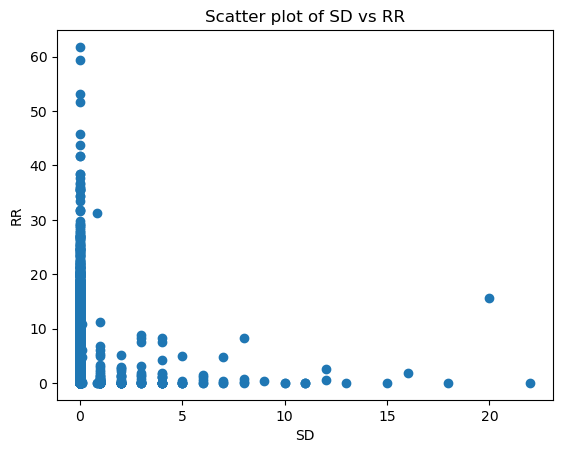

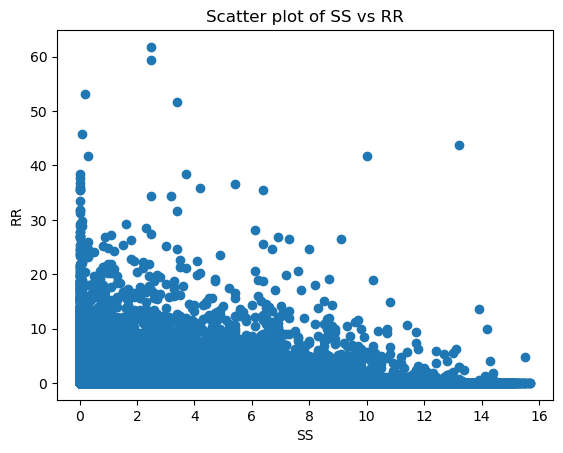

In [55]:
for feature in ['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']:
    plt.scatter(lw_df[feature], lw_df['RR'])
    plt.title(f'Scatter plot of {feature} vs RR')
    plt.xlabel(feature)
    plt.ylabel('RR')
    plt.show()

## Model Approach 1

In [56]:
lw_df

DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]

In [55]:
lw_df.isnull().sum()

DATE    0
CC      0
HU      0
QQ      0
TX      0
TN      0
TG      0
RR      0
PP      0
SD      0
SS      0
dtype: int64

In [60]:
lw_df["RR"]

0        0.4
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16066    6.2
16067    3.6
16068    0.6
16069    1.8
16070    6.2
Name: RR, Length: 16071, dtype: float64

In [70]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:28
   ---------------------------------------- 0.7/99.8 MB 6.1 MB/s eta 0:00:17
   ---------------------------------------- 1.0/99.8 MB 8.3 MB/s eta 0:00:12
   ---------------------------------------- 1.0/99.8 MB 8.3 MB/s eta 0:00:12
   ---------------------------------------- 1.0/99.8 MB 8.3 MB/s eta 0:00:12
    --------------------------------------- 1.9/99.8 MB 6.2 MB/s eta 0:00:16
    --------------------------------------- 2.1/99.8 MB 6.6 MB/s eta 0:00:15
    --------------------------------------- 2.3/99.8 MB 5.8 MB/s eta 0:00:17
   - ----------------------------------

In [72]:
pip install lime

     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ---------------- --------------------- 122.9/275.7 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=424258cd37de85351021730752292b51e86dbc45e54f5b95f8484643ae1ff353
  Stored in directory: c:\users\mitth\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Note: you may need to restart the kernel to use updated packages.


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.inspection import permutation_importance

# Import shap, lime and XGBoost
import shap
from xgboost import XGBRegressor 

import lime 
import lime.lime_tabular 





In [112]:
lw_df2 = lw_df.copy()

In [113]:
X = lw_df2[['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']]

# Add date features
X['Year'] = lw_df2['DATE'].dt.year
X['Month'] = lw_df2['DATE'].dt.month
X['Day'] = lw_df2['DATE'].dt.day

# Target feature
y = lw_df2['RR']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [114]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CC      16071 non-null  float64
 1   HU      16071 non-null  float64
 2   QQ      16071 non-null  float64
 3   TX      16071 non-null  float64
 4   TG      16071 non-null  float64
 5   TN      16071 non-null  float64
 6   PP      16071 non-null  float64
 7   SD      16071 non-null  float64
 8   SS      16071 non-null  float64
 9   Year    16071 non-null  int32  
 10  Month   16071 non-null  int32  
 11  Day     16071 non-null  int32  
dtypes: float64(9), int32(3)
memory usage: 1.3 MB


In [119]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_scaled = scaler.fit_transform(X)

In [121]:
X_scaled

array([[-1.5604886 ,  0.63977634, -0.75704685, ..., -1.69309999,
        -1.6014511 , -1.67380491],
       [ 0.35637853, -0.02555674, -1.03717312, ..., -1.69309999,
        -1.6014511 , -1.56016973],
       [-0.12283825,  0.92491908, -1.19404383, ..., -1.69309999,
        -1.6014511 , -1.44653456],
       ...,
       [-0.60205504, -0.02555674, -1.05958322, ...,  1.69315389,
         1.58815364,  1.50798   ],
       [ 0.83559532,  0.92491908, -1.18283877, ...,  1.69315389,
         1.58815364,  1.62161517],
       [ 1.3148121 ,  1.01996667, -1.19404383, ...,  1.69315389,
         1.58815364,  1.73525035]])

In [188]:
# Initial split into test set and remaining set
X_test, X_remain, y_test, y_remain = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

# Next split the remaining set into training and validation sets
X_val, X_train, y_val, y_train = train_test_split(X_remain, y_remain, train_size=0.7, random_state=123)

In [90]:
# # Initial split into test set and remaining set
# X_test, X_remain, y_test, y_remain = train_test_split(X, y, test_size=0.2, random_state=123)

# # Next split the remaining set into training and validation sets
# X_val, X_train, y_val, y_train = train_test_split(X_remain, y_remain, train_size=0.7, random_state=123)

In [91]:
# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the training data
# X_train_scaled = scaler.fit_transform(X_train)

# # Transform the validation data using the same scaler
# X_val_scaled = scaler.transform(X_val)

# # Transform the test data using the same scaler
# X_test_scaled = scaler.transform(X_test)

In [123]:
# Linear Regression with L2 Regularization
ridge = Ridge(alpha=10)

ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [124]:
ridge.coef_

array([ 0.20434886,  0.76362236,  0.29198587, -0.61182559,  1.64660994,
       -0.82027339, -1.11390863,  0.19840316, -0.39933144,  0.0406041 ,
       -0.03141619, -0.05116011])

In [125]:
y_pred_train = ridge.predict(X_train)

In [128]:
mean_squared_error(y_train, y_pred_train)

11.018498658222091

In [97]:

# Now, you should also scale the validation data using the same scaler
X_val_scaled = scaler.transform(X_val)

# Evaluate the model on the scaled validation data
ridge_score = ridge.score(X_val_scaled, y_val)

print(f'Ridge Regression Validation Score: {ridge_score}')

Ridge Regression Validation Score: 0.16350153121945843


In [98]:
# Make predictions on the scaled training, validation, and test data
y_pred_train = ridge.predict(X_train_scaled)
y_pred_val = ridge.predict(X_val_scaled)
y_pred_test = ridge.predict(X_test_scaled)

# Evaluate model performance on the training set
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Evaluate model performance on the validation set
val_mae = mean_absolute_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

# Evaluate model performance on the test set
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print(f'Train MAE: {train_mae}')
print(f'Validation MAE: {val_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R2: {train_r2}')
print(f'Validation R2: {val_r2}')
print(f'Test R2: {test_r2}')

Train MAE: 1.9459671772672504
Validation MAE: 1.9260144827289056
Test MAE: 1.991360959753146
Train R2: 0.2092197967263173
Validation R2: 0.16350153121945843
Test R2: 0.17649067783386407


In [99]:
# Coefficient values
ridge.coef_

array([ 0.20763543,  0.77213671,  0.29646391, -0.61122077,  1.66450861,
       -0.81989494, -1.12362852,  0.30959471, -0.39770691,  0.03992052,
       -0.03119064, -0.05025334])

In [100]:
# Put the variable names and their coefficient values into a data frame
coef_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficients': ridge.coef_})
coef_df.sort_values(by='Coefficients', ascending=False, inplace=True, ignore_index=True) # Sort coefficients in descending order

coef_df

Variable  Coefficients
0        TG      1.664509
1        HU      0.772137
2        SD      0.309595
3        QQ      0.296464
4        CC      0.207635
5      Year      0.039921
6     Month     -0.031191
7       Day     -0.050253
8        SS     -0.397707
9        TX     -0.611221
10       TN     -0.819895
11       PP     -1.123629

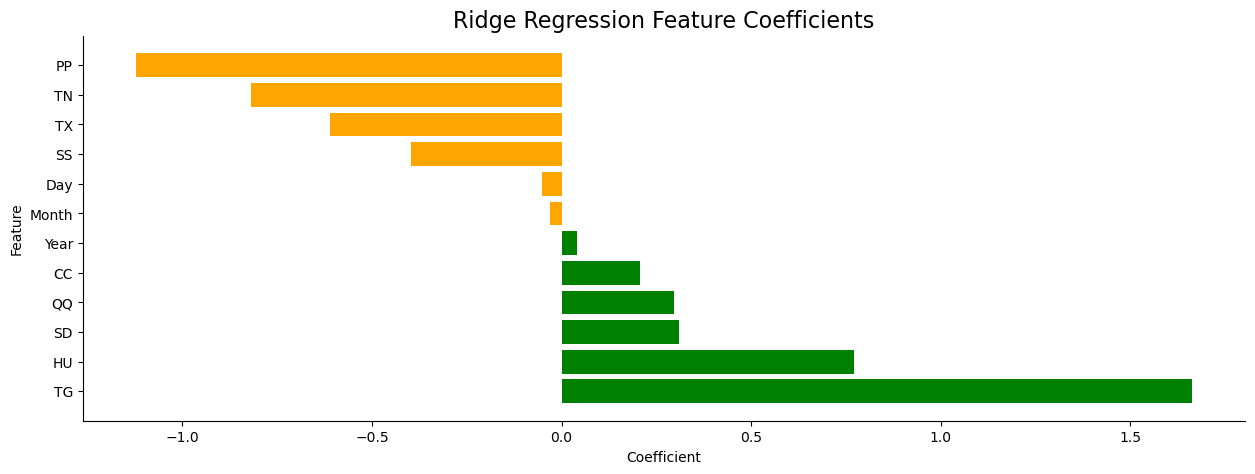

In [101]:
plt.figure(figsize=(15,5))
positive_coefs = coef_df[coef_df['Coefficients'] >=0]
negative_coefs = coef_df[coef_df['Coefficients'] < 0]
plt.barh(positive_coefs['Variable'], positive_coefs['Coefficients'],color='green')
plt.barh(negative_coefs['Variable'], negative_coefs['Coefficients'],color='orange')
plt.title('Ridge Regression Feature Coefficients', fontsize=16)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
sns.despine()
plt.show()

Ridge regression model considers features related to temperature (TG, TN, TX), humidity (HU) and pressure (PP) as the most influential in predicting the target variable

In [157]:
from sklearn.preprocessing import PolynomialFeatures

In [158]:
poly_mod = PolynomialFeatures(degree=2, include_bias=False)

In [159]:
X_poly = poly_mod.fit_transform(X)

In [160]:
# Initial split into test set and remaining set
X_test, X_remain, y_test, y_remain = train_test_split(X_poly, y, test_size=0.2, random_state=123)

# Next split the remaining set into training and validation sets
X_val, X_train, y_val, y_train = train_test_split(X_remain, y_remain, train_size=0.7, random_state=123)

In [161]:
ridge_poly = Ridge(alpha=10)

In [162]:
ridge_poly.fit(X_train, y_train)

Ridge(alpha=10)

In [163]:
y_pred = ridge_poly.predict(X_test)

In [164]:
y_pred

array([ 2.94236725, -1.52380265,  3.54177655, ...,  3.59885568,
       -1.021317  , -0.05687325])

In [166]:
mean_squared_error(y_test, y_pred)

11.891410167785416

In [176]:
import sklearn.gaussian_process as gp
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [150]:
gauss_kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(0.0, (1e-1, 1e3))

In [177]:
gauss_kernel2 = DotProduct() + WhiteKernel()

In [203]:
gauss_model = gp.GaussianProcessRegressor(kernel=gauss_kernel2, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

In [194]:
X_ammend = X[['HU', 'QQ', 'TX', 'TG', 'TN', 'PP']]

In [204]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_scaled = scaler.fit_transform(X_ammend)

In [205]:
# Initial split into test set and remaining set
X_test, X_remain, y_test, y_remain = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

# Next split the remaining set into training and validation sets
X_val, X_train, y_val, y_train = train_test_split(X_remain, y_remain, train_size=0.7, random_state=123)

In [206]:
gauss_model.fit(X_train, y_train)

The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.


GaussianProcessRegressor(alpha=0.1,
                         kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=10, normalize_y=True)

In [207]:
y_pred = gauss_model.predict(X_test)

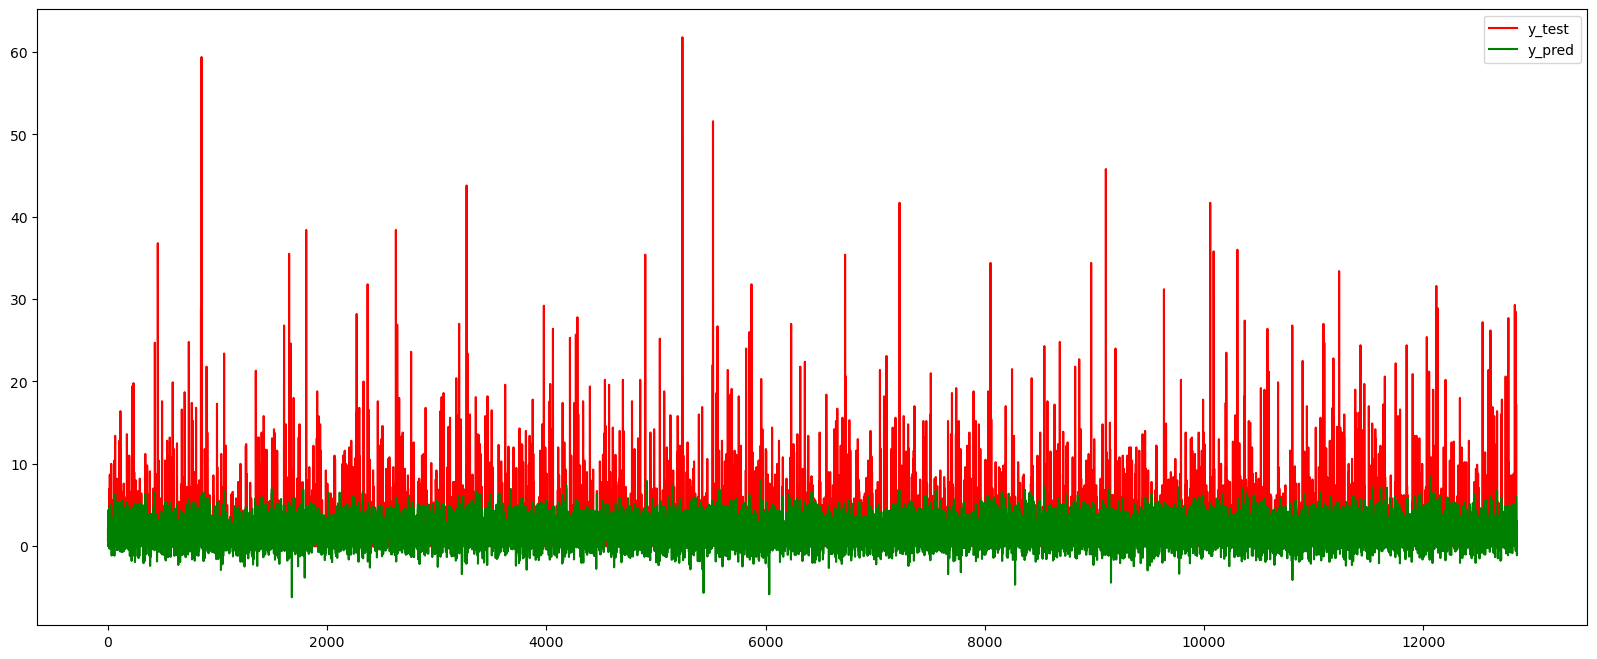

In [208]:
plt.figure(figsize=(20, 8))
plt.plot([i for i in range(len(y_test))], y_test, label="y_test", c="r")
plt.plot([i for i in range(len(y_test))], y_pred, label="y_pred", c="g")
plt.legend()
plt.show()

In [209]:
mean_squared_error(y_test, y_pred)

11.928446447801207

In [210]:
r2_score(y_test, y_pred)

0.17409607875356348

In [212]:
X = lw_df2[['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']]

# Add date features
X['Year'] = lw_df2['DATE'].dt.year
X['Month'] = lw_df2['DATE'].dt.month
X['Day'] = lw_df2['DATE'].dt.day

# Target feature
y = lw_df2['RR']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [215]:
import tensorflow as tf

# Assuming x and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12345)

# Normalize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='sgd', loss='mae')

# Train the model
model.fit(X_train_scaled, y_train, batch_size=32, epochs=10)

# Predict on test set
y_pred_test = model.predict(X_test_scaled)

# Calculate MAE on test set
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_test)

Epoch 1/10

427/427 [==============================] - 1s 1ms/step - loss: 1.6218
Epoch 2/10
427/427 [==============================] - 1s 1ms/step - loss: 1.5100
Epoch 3/10
427/427 [==============================] - 1s 1ms/step - loss: 1.4643
Epoch 4/10
427/427 [==============================] - 1s 1ms/step - loss: 1.4508
Epoch 5/10
427/427 [==============================] - 1s 1ms/step - loss: 1.4446
Epoch 6/10
427/427 [==============================] - 1s 1ms/step - loss: 1.4387
Epoch 7/10
427/427 [==============================] - 1s 1ms/step - loss: 1.4356
Epoch 8/10
427/427 [==============================] - 1s 1ms/step - loss: 1.4312
Epoch 9/10
427/427 [==============================] - 1s 1ms/step - loss: 1.4299
Epoch 10/10
76/76 [==============================] - 0s 1ms/step
Test MAE: 1.4547021238725866


In [216]:
from sklearn.metrics import r2_score

# Assuming x and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12345)

# Normalize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='sgd', loss='mae')

# Train the model
model.fit(X_train_scaled, y_train, batch_size=32, epochs=10)

# Predict on test set
y_pred_test = model.predict(X_test_scaled)

# Calculate MAE on test set
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_test)

# Calculate R-squared (R2) on test set
r2_test = r2_score(y_test, y_pred_test)
print("Test R2:", r2_test)

Epoch 1/10
427/427 [==============================] - 1s 1ms/step - loss: 1.6663
Epoch 2/10
427/427 [==============================] - 1s 1ms/step - loss: 1.5961
Epoch 3/10
427/427 [==============================] - 1s 1ms/step - loss: 1.5329
Epoch 4/10
427/427 [==============================] - 1s 1ms/step - loss: 1.4868
Epoch 5/10
427/427 [==============================] - 1s 1ms/step - loss: 1.4681
Epoch 6/10
427/427 [==============================] - 1s 1ms/step - loss: 1.4600
Epoch 7/10
427/427 [==============================] - 1s 1ms/step - loss: 1.4548
Epoch 8/10
427/427 [==============================] - 1s 1ms/step - loss: 1.4497
Epoch 9/10
427/427 [==============================] - 1s 1ms/step - loss: 1.4468
Epoch 10/10
76/76 [==============================] - 0s 1ms/step
Test MAE: 1.4662070243228083
Test R2: 0.11903850079610934


In [217]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X contains the features and y contains the target variable (precipitation)

# Step 1: Preprocessing
# Split data into features (X) and target variable (y)
X = lw_df[['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']]
y = lw_df['RR']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Step 3: Model Training
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Fit the model to the training data
knn_regressor.fit(X_train_scaled, y_train)

# Step 4: Model Evaluation
# Make predictions on the test set
y_pred = knn_regressor.predict(X_test_scaled)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)

Mean Absolute Error: 1.7584696734059098
Mean Squared Error: 11.499510544323485
R-squared (R2): 0.08184782612450459


In [218]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, make_scorer

# Assuming X contains the features and y contains the target variable (precipitation)

# Step 1: Preprocessing
# Split data into features (X) and target variable (y)
X = lw_df[['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']]
y = lw_df['RR']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Step 3: Pipeline with PCA and KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsRegressor())
])

# Step 4: Define parameter grid for grid search
param_grid = {
    'pca__n_components': [2, 5, 8],  # Number of principal components
    'knn__n_neighbors': [3, 5, 7],    # Number of neighbors for KNN
    # Add other hyperparameters for KNN if needed
}

# Step 5: Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Step 6: Evaluate the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
print("Best Model MAE:", mae)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Model MAE: 1.762368362586092
Best Parameters: {'knn__n_neighbors': 7, 'pca__n_components': 8}


In [219]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X contains the features and y contains the target variable (precipitation)

# Step 1: Preprocessing
# Split data into features (X) and target variable (y)
X = lw_df[['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']]
y = lw_df['RR']

# Step 2: Dimensionality Reduction with PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=8)  # Number of principal components to retain
X_pca = pca.fit_transform(X_scaled)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=123)

# Step 4: Model Training
# Create KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors (k) as needed

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)

# Step 5: Model Evaluation
# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared (R2):", r2)

Mean Absolute Error: 1.7617151744056874
Mean Squared Error: 11.095787856666773
R-squared (R2): 0.11408214269703443


In [220]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define base model (e.g., Decision Tree)
base_model = DecisionTreeRegressor(max_depth=5)

# Bagging example
bagging_model = BaggingRegressor(base_estimator=base_model, n_estimators=10, random_state=123)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)
bagging_mse = mean_squared_error(y_test, bagging_pred)
bagging_r2 = r2_score(y_test, bagging_pred)
print("Bagging MSE:", bagging_mse)
print("Bagging r2:", bagging_r2)

# Boosting example (AdaBoost)
adaboost_model = AdaBoostRegressor(base_estimator=base_model, n_estimators=10, random_state=123)
adaboost_model.fit(X_train, y_train)
adaboost_pred = adaboost_model.predict(X_test)
adaboost_mse = mean_squared_error(y_test, adaboost_pred)
adaboost_r2 = r2_score(y_test, adaboost_pred)
print("AdaBoost MSE:", adaboost_mse)
print("Adaboost r2:", adaboost_r2)

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


Bagging MSE: 10.120163114484209
Bagging r2: 0.19197867355102116


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


AdaBoost MSE: 13.706465744643026
Adaboost r2: -0.0943614748721775


In [221]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Define the XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the XGBoost model to the training data
xgb_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print("XGBoost MSE:", mse)

# Calculate R-squared (R2) score on the test set
r2 = r2_score(y_test, y_pred)
print("XGBoost R2 score:", r2)

XGBoost MSE: 9.794267964228625
XGBoost R2 score: 0.21799902802692106


In [223]:
lw_df3 = lw_df.copy()

In [228]:
lw_df3["CC"].size

16071

In [240]:
lw_df4 = pd.DataFrame()

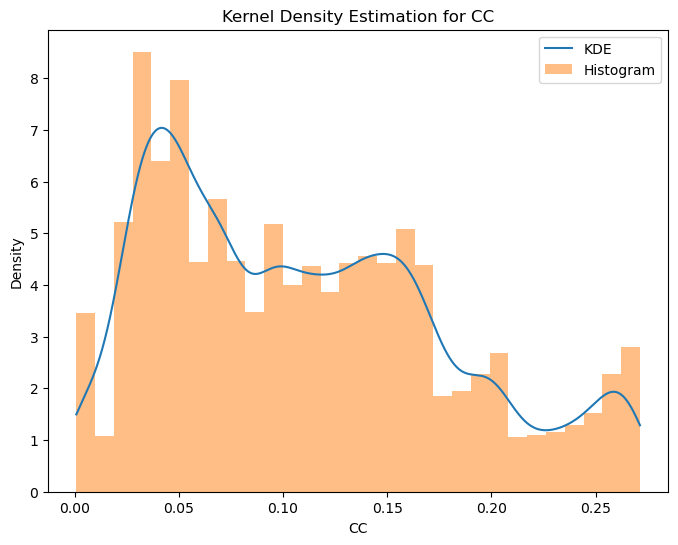

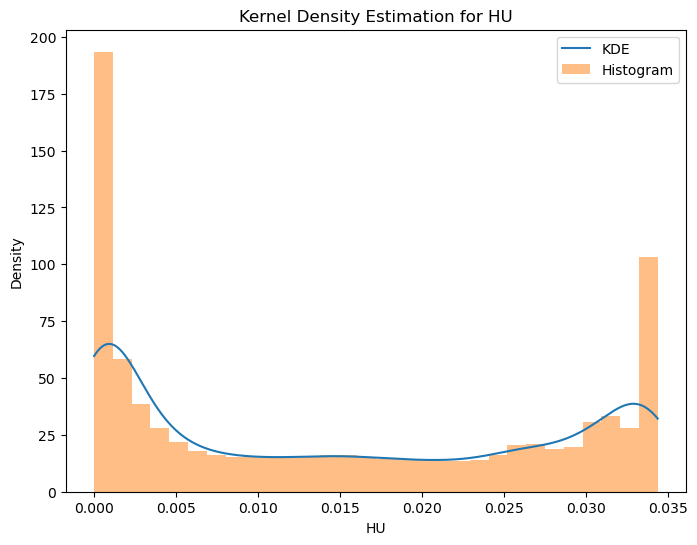

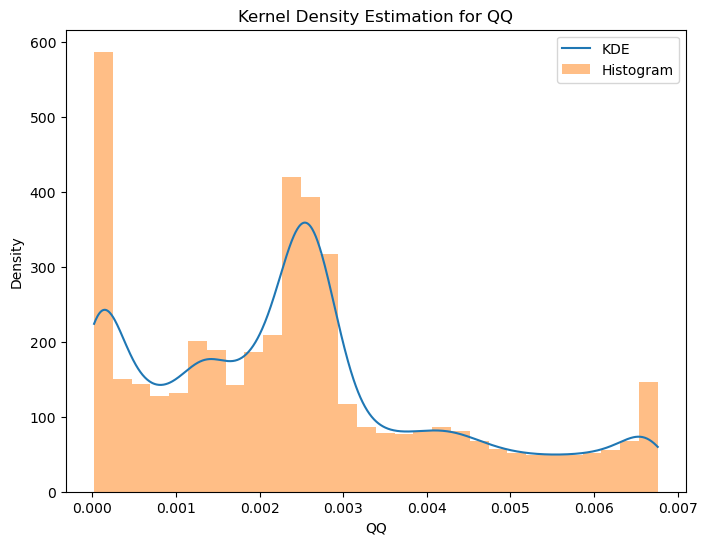

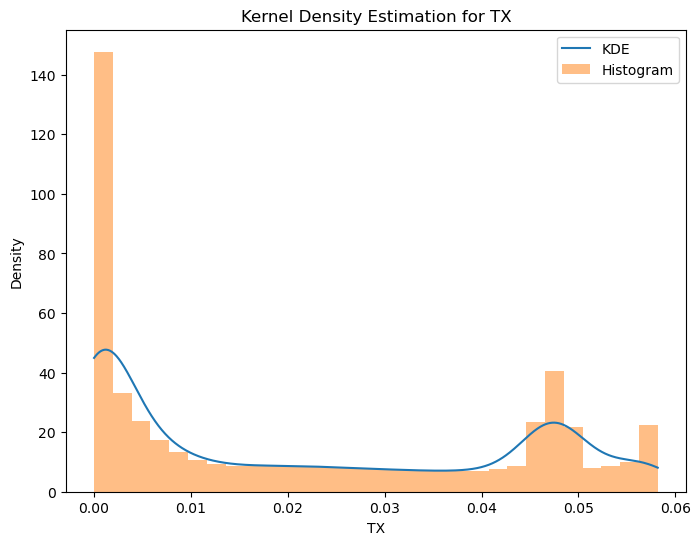

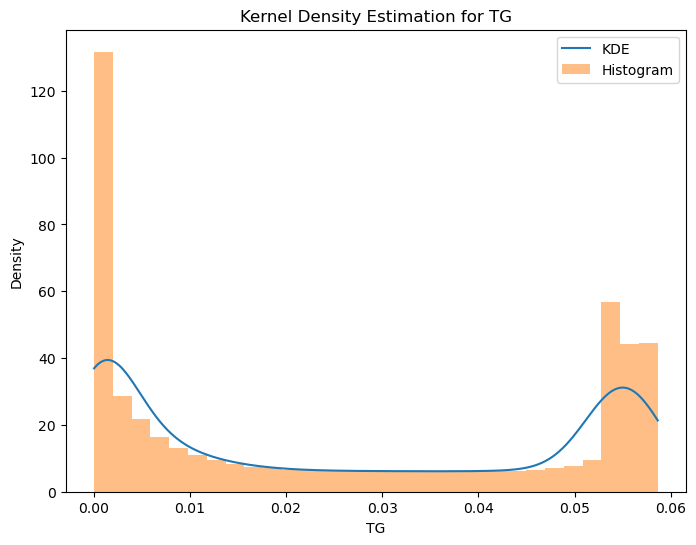

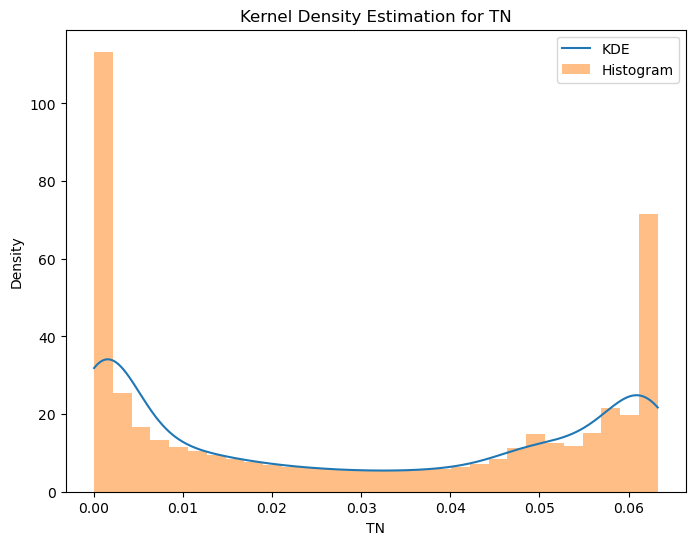

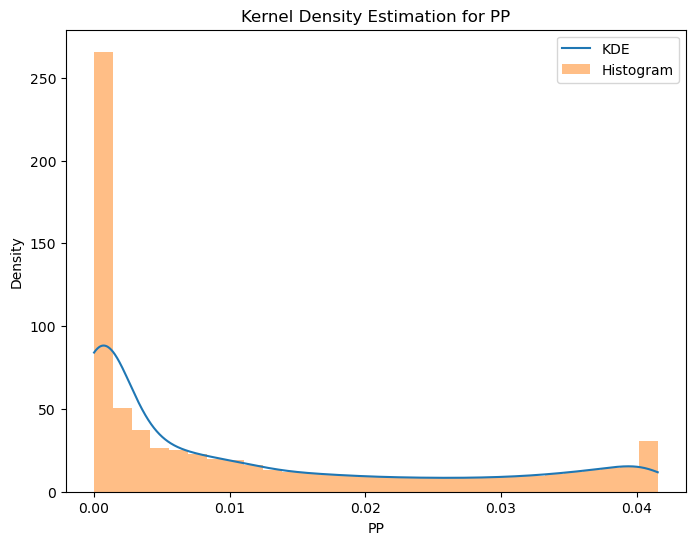

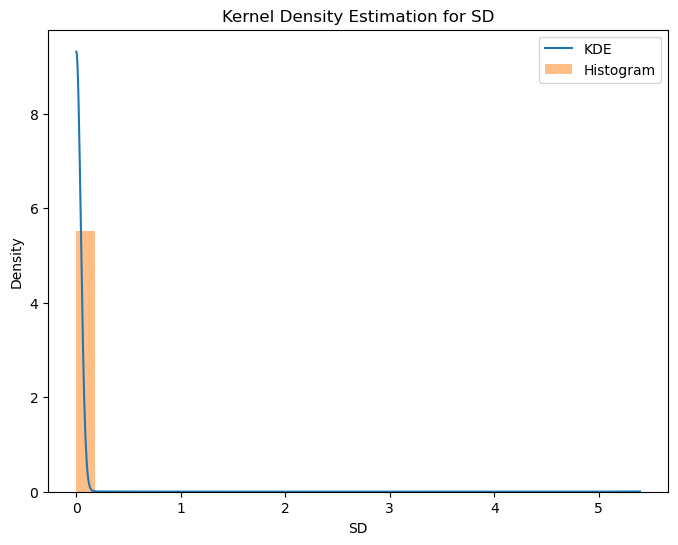

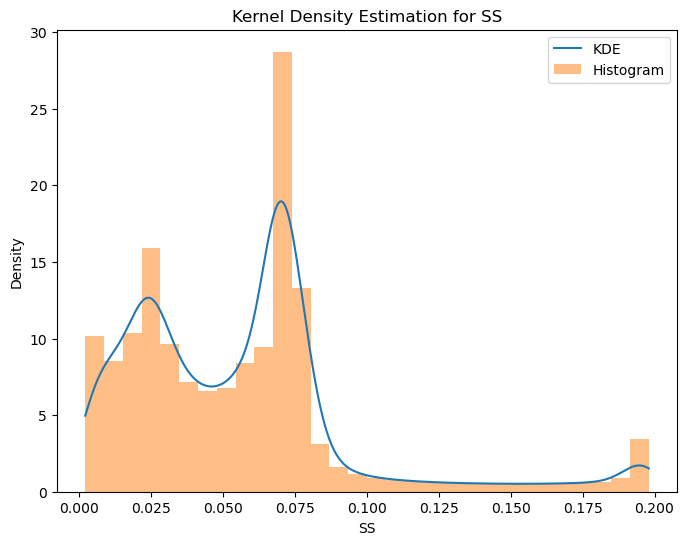

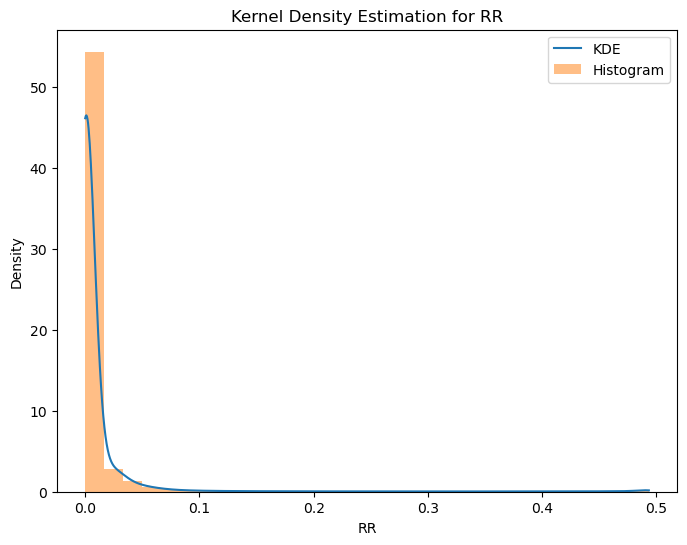

In [241]:
from scipy.stats import gaussian_kde

# Select the features you want to estimate the density for
features = ['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS', 'RR']
X_selected = lw_df3[features]

# Apply KDE separately to each feature
for feature in features:
    data = X_selected[feature].values
    
    # Create a KDE object
    kde = gaussian_kde(data)
    
    # Define the range of values for which to evaluate the KDE
    x_values = np.linspace(min(data), max(data), 1000)
    
    # Evaluate the KDE at the specified values
    density_estimation = kde.evaluate(x_values)

    lw_df4[feature] = density_estimation
    
    # Plot the KDE
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, density_estimation, label='KDE')
    plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogram')  # Overlay histogram for comparison
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'Kernel Density Estimation for {feature}')
    plt.legend()
    plt.show()

In [242]:
lw_df4

CC         HU          QQ         TX         TG         TN  \
0    1.495340  59.652528  223.900636  44.928487  36.935246  31.857233   
1    1.519999  60.039093  225.838772  45.188463  37.136189  32.037309   
2    1.544558  60.412232  227.675755  45.436206  37.329136  32.210322   
3    1.569020  60.771738  229.409902  45.671563  37.513988  32.376180   
4    1.593389  61.117416  231.039731  45.894395  37.690656  32.534795   
..        ...        ...         ...        ...        ...        ...   
995  1.381123  33.293371   62.797976   8.392718  22.386046  22.329422   
996  1.357390  33.017202   62.076426   8.313886  22.125971  22.177467   
997  1.333415  32.735176   61.334544   8.233817  21.864314  22.021533   
998  1.309222  32.447436   60.572994   8.152540  21.601194  21.861690   
999  1.284833  32.154126   59.792471   8.070084  21.336728  21.698013   

            PP        SD        SS         RR  
0    84.052782  9.317182  4.965246  46.145602  
1    84.537151  9.254819  5.087641  46.422886  
2    84.993188  9.044971  5.209305  46.501479  
3    85.420553  8.697696  5.330101  46.381667  
4    85.818938  8.229277  5.449897  46.066398  
..         ...       ...       ...        ...  
995  12.294574  0.005226  1.597870   0.178078  
996  12.164367  0.005129  1.579683   0.175864  
997  12.031994  0.004982  1.560308   0.173058  
998  11.897526  0.004787  1.539785   0.169678  
999  11.761039  0.004548  1.518156   0.165751  

[1000 rows x 10 columns]

The figure layout has changed to tight


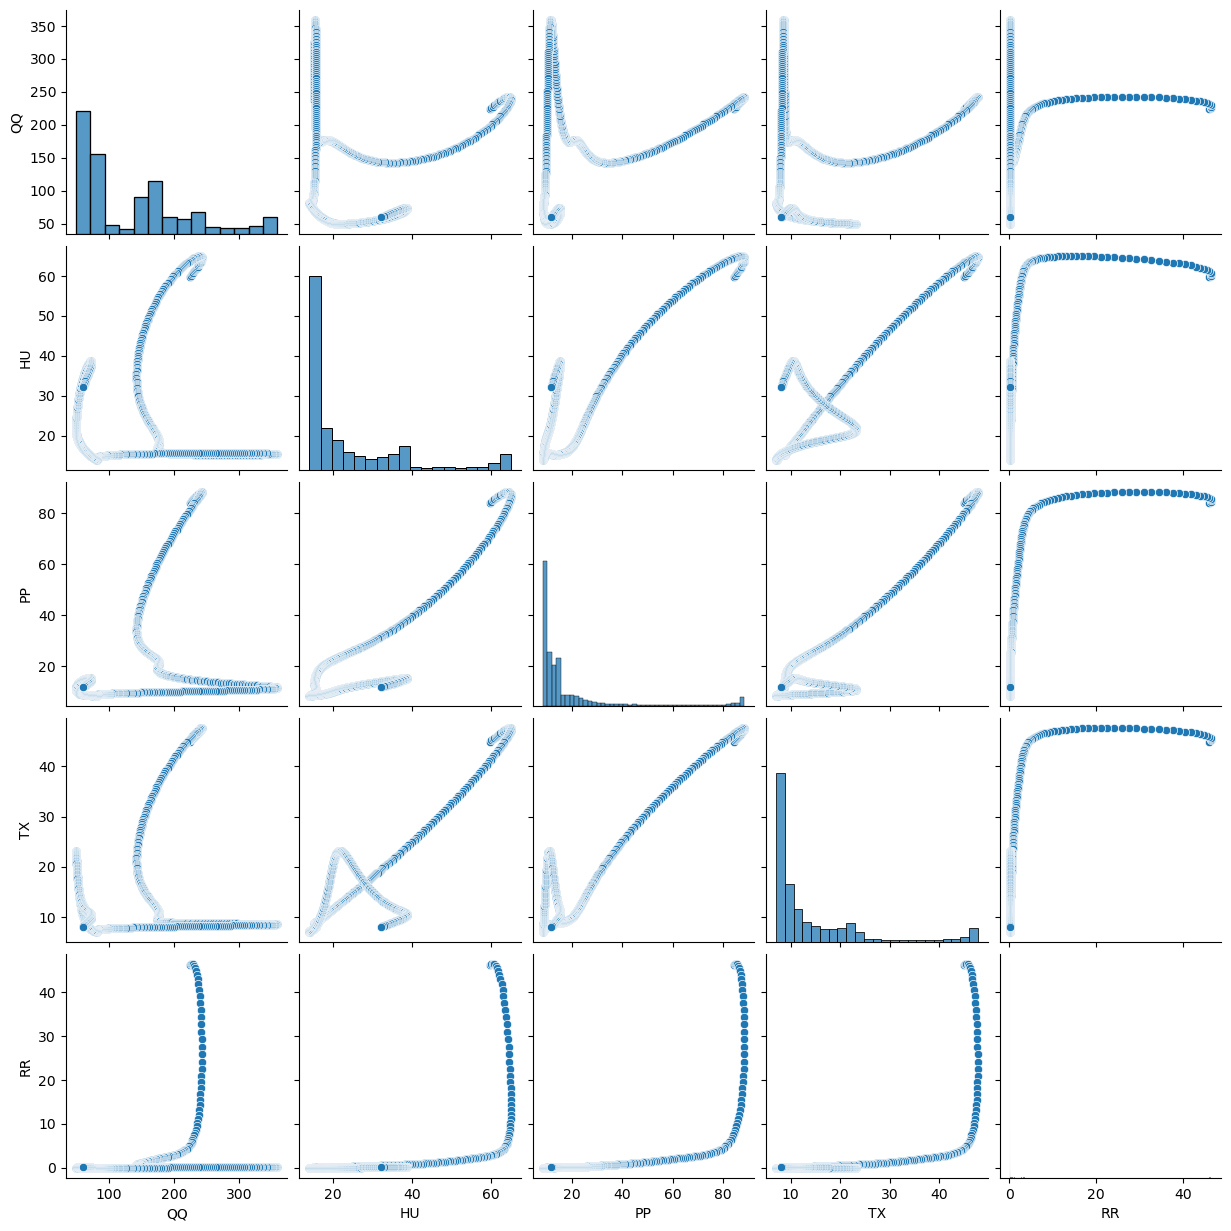

In [243]:
sns.pairplot(lw_df4, x_vars=["QQ", "HU", "PP", "TX", "RR"], y_vars=["QQ", "HU", "PP", "TX", "RR"])

The figure layout has changed to tight


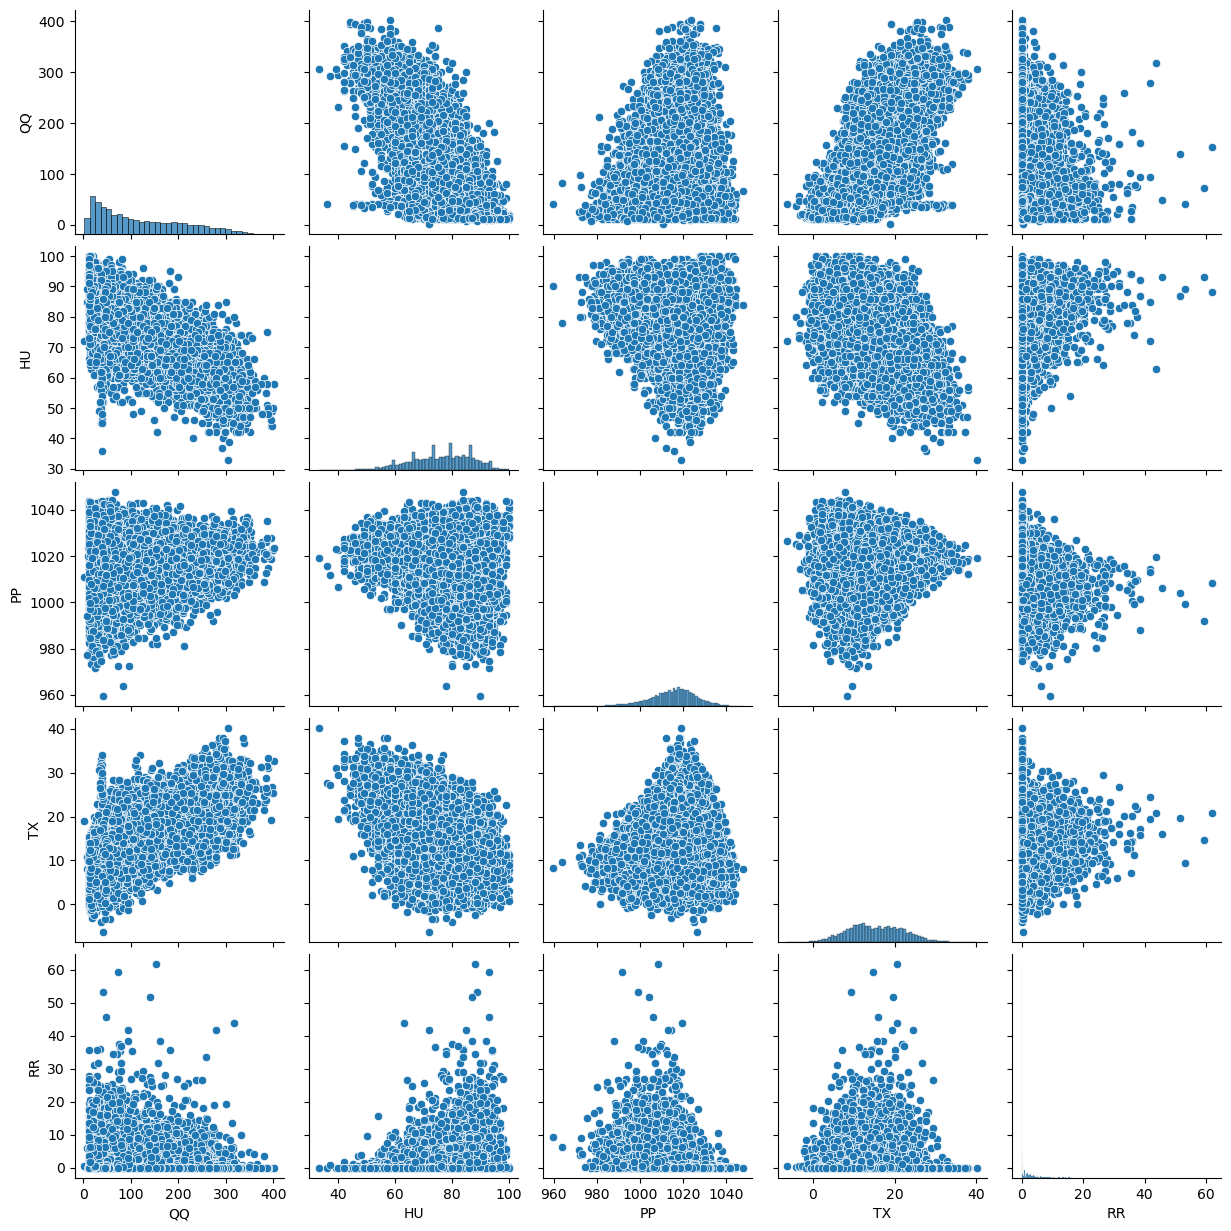

In [233]:
sns.pairplot(lw_df2, x_vars=["QQ", "HU", "PP", "TX", "RR"], y_vars=["QQ", "HU", "PP", "TX", "RR"])

## Hyperparamter tuning on alpha for redge regression

In [102]:
from sklearn.model_selection import GridSearchCV

# Define Ridge regression model
ridge = Ridge()

# Define hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Extract best hyperparameters
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Evaluate best model
best_model_score = best_model.score(X_val_scaled, y_val)

print(f'Best Alpha: {best_alpha}')
print(f'Validation Score with Best Model: {best_model_score}')

Best Alpha: 10
Validation Score with Best Model: 0.16350153121945843


In [110]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define ElasticNet regression model
elasticnet = ElasticNet()

# Define hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100],
              'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}  # l1_ratio controls the mixing parameter between L1 and L2 penalties

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=elasticnet, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Extract best hyperparameters
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
best_model = grid_search.best_estimator_

# Evaluate best model
best_model_score = best_model.score(X_val_scaled, y_val)

print(f'Best Alpha: {best_alpha}')
print(f'Best L1 Ratio: {best_l1_ratio}')
print(f'Validation Score with Best Model: {best_model_score}')

Best Alpha: 0.01
Best L1 Ratio: 0.1
Validation Score with Best Model: 0.1565586989347646


### 2nd iteration with L2 (Ridge Regression)

In [104]:
X = lw_df2[['HU', 'TX', 'TG', 'TN', 'PP']]

# Target feature
y = lw_df2['RR']

In [105]:
# Initial split into test set and remaining set
X_test, X_remain, y_test, y_remain = train_test_split(X, y, test_size=0.2, random_state=123)

# Next split the remaining set into training and validation sets
X_val, X_train, y_val, y_train = train_test_split(X_remain, y_remain, train_size=0.7, random_state=123)

In [106]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation data using the same scaler
X_val_scaled = scaler.transform(X_val)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [107]:
# Linear Regression with L2 Regularization
ridge = Ridge(alpha=10)

ridge.fit(X_train_scaled, y_train)

Ridge(alpha=10)

In [108]:

# Now, you should also scale the validation data using the same scaler
X_val_scaled = scaler.transform(X_val)

# Evaluate the model on the scaled validation data
ridge_score = ridge.score(X_val_scaled, y_val)

print(f'Ridge Regression Validation Score: {ridge_score}')

Ridge Regression Validation Score: 0.15659410397228246


In [109]:
# Make predictions on the scaled training, validation, and test data
y_pred_train = ridge.predict(X_train_scaled)
y_pred_val = ridge.predict(X_val_scaled)
y_pred_test = ridge.predict(X_test_scaled)

# Evaluate model performance on the training set
train_mae = mean_absolute_error(y_train, y_pred_train)
train_r2 = r2_score(y_train, y_pred_train)

# Evaluate model performance on the validation set
val_mae = mean_absolute_error(y_val, y_pred_val)
val_r2 = r2_score(y_val, y_pred_val)

# Evaluate model performance on the test set
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

# Print evaluation metrics
print(f'Train MAE: {train_mae}')
print(f'Validation MAE: {val_mae}')
print(f'Test MAE: {test_mae}')
print(f'Train R2: {train_r2}')
print(f'Validation R2: {val_r2}')
print(f'Test R2: {test_r2}')

Train MAE: 1.95081145391076
Validation MAE: 1.9209979706824303
Test MAE: 1.9775957458200824
Train R2: 0.19286172872779905
Validation R2: 0.15659410397228246
Test R2: 0.17599958983871833


****** Separate method *****

The question I'm trying to answer here would be how well I can predict precipitation in London using data from 1979-2022. 

There are two problems I should address before I can answer my question:
- 1. A classification problem, whether it will going to rain or not. 
- 2. A regression problem, quantifying my feature.


### Part 1 Classification

Let's extract year, month and day from `DATE` and try add them as features to work on our independent features

In [52]:
lw_df2 = lw_df.copy()

In [53]:
# Our independent features
X = lw_df2[['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']]

# Add date features
X['Year'] = lw_df['DATE'].dt.year
X['Month'] = lw_df['DATE'].dt.month
X['Day'] = lw_df['DATE'].dt.day

# Target feature
y = lw_df2['RR']

C:\Users\mitth\AppData\Local\Temp\ipykernel_38280\238056828.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Year'] = lw_df['DATE'].dt.year


In [54]:
X

CC    HU    QQ    TX    TG   TN      PP   SD   SS  Year  Month  Day
0      2.0  83.0  52.0   2.3  -4.1 -7.5  1019.0  9.0  7.0  1979      1    1
1      6.0  76.0  27.0   1.6  -2.6 -7.5  1025.3  8.0  1.7  1979      1    2
2      5.0  86.0  13.0   1.3  -2.8 -7.2  1020.5  4.0  0.0  1979      1    3
3      8.0  68.0  13.0  -0.3  -2.6 -6.5  1008.4  2.0  0.0  1979      1    4
4      6.0  73.0  29.0   5.6  -0.8 -1.4  1022.5  1.0  2.0  1979      1    5
...    ...   ...   ...   ...   ...  ...     ...  ...  ...   ...    ...  ...
16066  6.0  88.0  18.0  12.0   6.7  1.9  1019.3  0.0  0.5  2022     12   27
16067  8.0  91.0  12.0   9.8   8.8  5.7  1001.9  0.0  0.0  2022     12   28
16068  4.0  76.0  25.0  14.1   8.9  8.1  1001.0  0.0  1.5  2022     12   29
16069  7.0  86.0  14.0  14.0   9.3  4.5   997.1  0.0  0.1  2022     12   30
16070  8.0  87.0  13.0  12.3  11.4  8.9   999.5  0.0  0.0  2022     12   31

[16071 rows x 12 columns]

In [55]:
y

0        0.4
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
16066    6.2
16067    3.6
16068    0.6
16069    1.8
16070    6.2
Name: RR, Length: 16071, dtype: float64

In [56]:
#  We need to define a threshold of what is considered rainy(>=0.1 mm) or not(0mm)
threshold = 0.1
y = (lw_df['RR'] >= threshold).astype(int)

In [57]:
y.unique()

array([1, 0])

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Initial split into test set and remaining set
X_test, X_remain, y_test, y_remain = train_test_split(X, y, test_size=0.2, random_state=123)

# Next split the remaining set into training and validation sets
X_val, X_train, y_val, y_train = train_test_split(X_remain, y_remain, train_size=0.7, random_state=123)

In [59]:
# Define the range of C values
C_range = np.array([.00000001, .0000001, .000001, .00001, .0001, .001, 0.1,
                    1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

# Lists to store train and validation scores
train_scores = []
val_scores = []

# Hyperparameter tuning loop
for C in C_range:
    # Create and train the model
    my_logreg = LogisticRegression(C=C, random_state=123, solver='lbfgs', max_iter=10000)
    my_logreg.fit(X_train, y_train)
    
    # Evaluate on training set
    train_scores.append(my_logreg.score(X_train, y_train))
    
    # Evaluate on validation set
    val_scores.append(my_logreg.score(X_val, y_val))

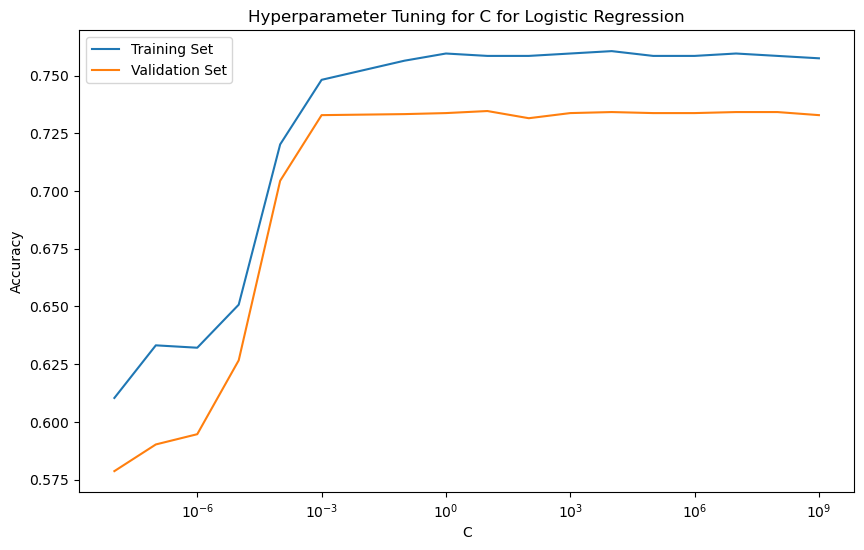

In [60]:
# Plot the training and validation curves
plt.figure(figsize=(10, 6))
plt.plot(C_range, train_scores, label='Training Set')
plt.plot(C_range, val_scores, label='Validation Set')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning for C for Logistic Regression')
plt.legend()
plt.show()


It looks like C of 0.001 looks the most promising.

In [61]:
my_logreg = LogisticRegression(C=0.001, random_state=123, solver='lbfgs', max_iter=10000)
my_logreg.fit(X_train, y_train)

LogisticRegression(C=0.001, max_iter=10000, random_state=123)

In [62]:
y_pred = my_logreg.predict(X_val)

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1193
           1       0.70      0.76      0.73      1057

    accuracy                           0.73      2250
   macro avg       0.73      0.73      0.73      2250
weighted avg       0.74      0.73      0.73      2250



In [65]:
confusion_matrix(y_val, y_pred)

array([[847, 346],
       [255, 802]], dtype=int64)

So we have 73% overall accuracy. 77% of the time it will accurately predict it isn't raining, while 70% of the time it will predict it will rain accurately. 

### Part 2 Regression

In [66]:
y[6]

1

In [67]:
# Where y our dependent feature is now only the '1' aka values >0.1 mm
X.loc[np.where(y != 0)]

CC    HU    QQ    TX    TG   TN      PP   SD   SS  Year  Month  Day
0      2.0  83.0  52.0   2.3  -4.1 -7.5  1019.0  9.0  7.0  1979      1    1
5      5.0  84.0  39.0   8.3  -0.5 -6.6  1027.8  1.0  3.8  1979      1    6
6      8.0  93.0  13.0   8.5   1.5 -5.3  1025.2  0.0  0.0  1979      1    7
7      8.0  95.0  15.0   5.8   6.9  5.3  1018.7  0.0  0.1  1979      1    8
8      4.0  86.0  50.0   5.2   3.7  1.6  1011.7  0.0  5.8  1979      1    9
...    ...   ...   ...   ...   ...  ...     ...  ...  ...   ...    ...  ...
16066  6.0  88.0  18.0  12.0   6.7  1.9  1019.3  0.0  0.5  2022     12   27
16067  8.0  91.0  12.0   9.8   8.8  5.7  1001.9  0.0  0.0  2022     12   28
16068  4.0  76.0  25.0  14.1   8.9  8.1  1001.0  0.0  1.5  2022     12   29
16069  7.0  86.0  14.0  14.0   9.3  4.5   997.1  0.0  0.1  2022     12   30
16070  8.0  87.0  13.0  12.3  11.4  8.9   999.5  0.0  0.0  2022     12   31

[7685 rows x 12 columns]

In [68]:
lw_df['RR'].loc[np.where(lw_df['RR'] != 0)].reset_index(drop=True)

0       0.4
1       0.7
2       5.2
3       0.8
4       7.2
       ... 
7680    6.2
7681    3.6
7682    0.6
7683    1.8
7684    6.2
Name: RR, Length: 7685, dtype: float64

In [69]:
# Updating our target feature of RR to be values that aren't 0mm (ie. not raining)
y_log = lw_df['RR'].loc[np.where(lw_df['RR'] != 0)].reset_index(drop=True)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Initial split into test set and remaining set
X_test, X_remain, y_test, y_remain = train_test_split(X, y, test_size=0.2, random_state=123)

# Next split the remaining set into training and validation sets
X_val, X_train, y_val, y_train = train_test_split(X_remain, y_remain, train_size=0.7, random_state=123)

In [71]:
y

0        1
1        0
2        0
3        0
4        0
        ..
16066    1
16067    1
16068    1
16069    1
16070    1
Name: RR, Length: 16071, dtype: int32

Model 1

In [72]:
# importing this package to fit and explore our linear regression model
import statsmodels.api as sm

In [73]:
# add constant
X_withconstant_1 = sm.add_constant(X)

In [74]:
# 1. Instantiate Model
myregression = sm.OLS(y, X_withconstant_1)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results = myregression.fit()

# Looking at the summary
myregression_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RR   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     652.0
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:09:56   Log-Likelihood:                -8459.6
No. Observations:               16071   AIC:                         1.695e+04
Df Residuals:                   16058   BIC:                         1.705e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8023      0.647     19.797      0.000      11.535      14.070
CC             0.0134      0.003      4.951      0.000       0.008       0.019
HU             0.0150      0.001     29.663      0.000       0.014       0.016
QQ             0.0008   9.91e-05      8.107      0.000       0.001       0.001
TX            -0.0120      0.001     -9.129      0.000      -0.015      -0.009
TG             0.0295      0.003      9.698      0.000       0.024       0.035
TN            -0.0193      0.003     -7.670      0.000      -0.024      -0.014
PP            -0.0167      0.000    -50.706      0.000      -0.017      -0.016
SD            -0.0189      0.006     -2.927      0.003      -0.032      -0.006
SS            -0.0202      0.002     -8.934      0.000      -0.025      -0.016
Year           0.0017      0.000      6.474      0.000       0.001       0.002
Month         -0.0041      0.001     -3.845      0.000      -0.006      -0.002
Day            0.0001      0.000      0.293      0.770      -0.001       0.001
==============================================================================
Omnibus:                     1815.213   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              498.385
Skew:                           0.037   Prob(JB):                    5.98e-109
Kurtosis:                       2.140   Cond. No.                     4.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the p-values, we can gather that all variables are siginificant in predicting `RR` that has value more than 0 mm except for `Day`. Additionally, some of these variables provide a strong multicollineraity, hence we'd need to drop some to help improve our model.

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                        | 0.328 |

#### Addressing multicollinearity

In [75]:
# Calculate VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF assumes the presence of a constant in X

X = sm.add_constant(X)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)[1:]

CC        3.073403
HU        2.718286
QQ        7.487177
TX        7.151541
TG       29.429480
TN       17.225219
PP        1.140106
SD        1.027989
SS        7.812878
Year      1.079712
Month     1.275171
Day       1.001400
dtype: float64

Model 2

Due to it being highly colinear, let's try it without `TG` (Mean temperature). Additionally, we can remove `Day` due to its insignificance based on the previous model. 

In [76]:
# drop columns 
X_new = X.drop(columns=['TG', 'TN', 'TX', 'SS', 'QQ', 'CC', 'HU','Day'])

In [77]:
# add constant
# X_withconstant_2 = sm.add_constant(X_new)
# run model again
# 1. Instantiate Model
myregression2 = sm.OLS(y, X_new)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results2 = myregression2.fit()

# Looking at the summary
myregression_results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RR   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     1023.
Date:                Mon, 22 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:09:57   Log-Likelihood:                -9826.2
No. Observations:               16071   AIC:                         1.966e+04
Df Residuals:                   16066   BIC:                         1.970e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.5685      0.653     33.016      0.000      20.288      22.849
PP            -0.0215      0.000    -63.895      0.000      -0.022      -0.021
SD            -0.0085      0.007     -1.219      0.223      -0.022       0.005
Year           0.0004      0.000      1.311      0.190      -0.000       0.001
Month         -0.0007      0.001     -0.726      0.468      -0.003       0.001
==============================================================================
Omnibus:                    18643.713   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1046.710
Skew:                           0.118   Prob(JB):                    5.13e-228
Kurtosis:                       1.772   Cond. No.                     4.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                            | 0.328 |
| 2 | PP, SD, Year, Month                            | 0.203 |

Model 3

Due to lack of siginificance, let's only leave PP (pressure).

In [78]:
# drop columns 
X_new2 = X[['PP']]

In [79]:
# add constant
# X_withconstant_2 = sm.add_constant(X_new)
# run model again
# 1. Instantiate Model
myregression3 = sm.OLS(y, X_new2)

# 2. Fit Model (this returns a seperate object with the parameters)
myregression_results3 = myregression3.fit()

# Looking at the summary
myregression_results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     RR   R-squared (uncentered):                   0.474
Model:                            OLS   Adj. R-squared (uncentered):              0.473
Method:                 Least Squares   F-statistic:                          1.445e+04
Date:                Mon, 22 Jan 2024   Prob (F-statistic):                        0.00
Time:                        21:09:58   Log-Likelihood:                         -11721.
No. Observations:               16071   AIC:                                  2.344e+04
Df Residuals:                   16070   BIC:                                  2.345e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PP             0.0005    3.9e-06    120.220      0.000       0.000       0.000
==============================================================================
Omnibus:                    55336.883   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2677.722
Skew:                           0.087   Prob(JB):                         0.00
Kurtosis:                       1.008   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Assessment with R<sup>2<sup/>** <br>
 
| Model | Variables                                  | R<sup>2<sup/>    |
|-------|--------------------------------------------|-------|
| 1 | All                                            | 0.328 |
| 2 | PP, SD, Year, Month                            | 0.203 |
| 3 | PP                                             | 0.163 |

After trying various combinations, we're unable to resolve our multicollinearity issues and our $R$2 has decreased. We can also see we'd have to remove a few more features as well due to their insignificance leaving us with only one. Perhaps we need to use another Machine Learning model, such as a Decision Tree Regressor. 

## 3. Model Approach 2

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

In [81]:
# Assuming 'y' is the precipitation values
# Target feature
y = lw_df['RR']

# Independent features
X = lw_df[['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']]

# Add date features
X['Year'] = lw_df['DATE'].dt.year
X['Month'] = lw_df['DATE'].dt.month
X['Day'] = lw_df['DATE'].dt.day

C:\Users\mitth\AppData\Local\Temp\ipykernel_38280\2098801509.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Year'] = lw_df['DATE'].dt.year


In [82]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [83]:
# Construct the pipeline with models, transformers, and scaler
estimators = [
    ('reduce_dim', PCA()),
    ('dt', DecisionTreeRegressor())
]

pipe = Pipeline(estimators)

# Define the grid of hyperparameters to search
param_grid = {
    'reduce_dim__n_components': [2, 5, 10],  # Varying the number of components in PCA
    'dt__max_depth': [2, 5, 10, 20, 50],  # Varying max_depth for DecisionTreeRegressor
    'dt__min_samples_leaf': [1, 5, 10],  # Varying min_samples_leaf for DecisionTreeRegressor
    'dt__min_samples_split': [2, 5, 10, 20]  # Varying min_samples_split for DecisionTreeRegressor
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'dt__max_depth': 5, 'dt__min_samples_leaf': 5, 'dt__min_samples_split': 5, 'reduce_dim__n_components': 10}
Best Score: 0.18465001886179344


In [84]:
estimators = [
    ('reduce_dim', PCA(n_components=10)), 
    ('dt', DecisionTreeRegressor(max_depth = 5, min_samples_leaf= 5, min_samples_split= 2))  # Decision Tree with specific hyperparameters
]

my_pipe = Pipeline(estimators)

In [85]:
my_pipe.fit(X_remain, y_remain)

print(f'Test score: {my_pipe.score(X_test, y_test)}')

Test score: -0.04714690792920195


Heavy overfitting and no generalization seen with the unseen test data. Perhaps the model is too complex to be understood. 

## 4. Model Approach 3

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [342]:
X = lw_df[['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS']]
y = lw_df['RR']

# Add date features
X['Year'] = lw_df['DATE'].dt.year
X['Month'] = lw_df['DATE'].dt.month
X['Day'] = lw_df['DATE'].dt.day


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [343]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [89]:
# Construct the pipeline with models, transformers, and scaler
estimators = [
    ('reduce_dim', PCA()),  # You can replace PCA or t-SNE with other preprocessing steps if needed
    ('rf', RandomForestRegressor())
]

pipe = Pipeline(estimators)

# Define the grid of hyperparameters to search
param_grid = {
    'reduce_dim__n_components': [2, 5, 10],         # Range in the number of components 
    'rf__n_estimators': [50, 100, 200],             # Range in the number of trees in the forest
    'rf__max_depth': [None, 10, 20],                # Range in max depth of the trees
    'rf__min_samples_split': [2, 5, 10],            # Range in min samples split
    'rf__min_samples_leaf': [1, 2, 4]               # Range in min samples leaf
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'reduce_dim__n_components': 10, 'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best Score: 0.22249060523397945


#### 1.1 Feature selection based on random forest regressor

In [112]:
rf_model = RandomForestRegressor(n_estimators = 50, max_depth = 10, min_samples_split = 10, min_samples_leaf = 4 )

In [113]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=50)

Text(0.5, 0, 'Random Forest Importance')

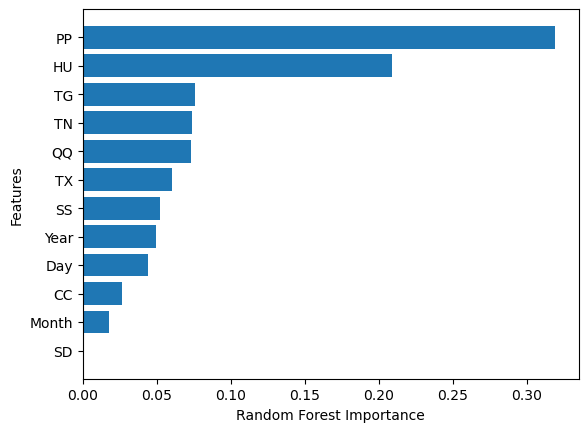

In [114]:
plt.barh(X_train.columns[rf_model.feature_importances_.argsort()], rf_model.feature_importances_[rf_model.feature_importances_.argsort()])
plt.ylabel("Features")
plt.xlabel("Random Forest Importance")

Using cart, can determine the random forest importance of each feature. Issue with general random forest algorithym s cause it focuses on the gini impurity, it has a strong preferance for high cardinality data/features. Means ranking is skewed based off this bias that exist in the model (random forest model, not ours specifically). 

Therefore, we use permutation importance which inserts random values into each of the features and re-evaluates. It is theoretically meant to manipulate the feature set to reevaluate feature importance. After running permutation, you get:

In [2]:
perm_eval = permutation_importance(rf_model, X_train, y_train)

NameError: name 'permutation_importance' is not defined

In [116]:
perm_val = perm_eval.importances_mean

Text(0.5, 0, 'Random Forest Importance')

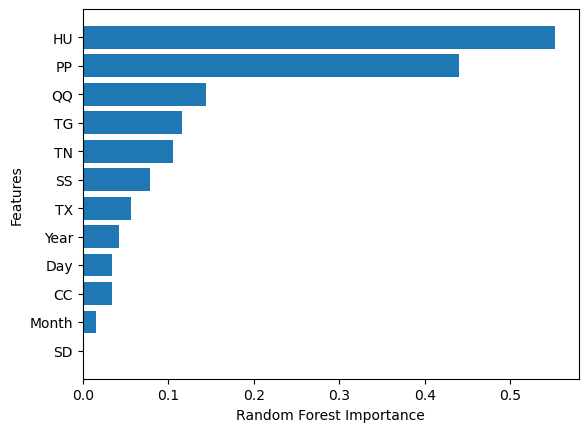

In [117]:
plt.barh(X_train.columns[perm_val.argsort()], perm_val[perm_val.argsort()])
plt.ylabel("Features")
plt.xlabel("Random Forest Importance")

From the above model, HU (humidity), PP(pressure) & QQ (global radiation) influence RR (precipitation).

In [118]:
!python -m pip install shap

Shap is a tree explainer for the random forest regression.

In [119]:
import shap

In [120]:
shap_explain = shap.Explainer(rf_model)

In [121]:
shap_eval = shap_explain(X_train)

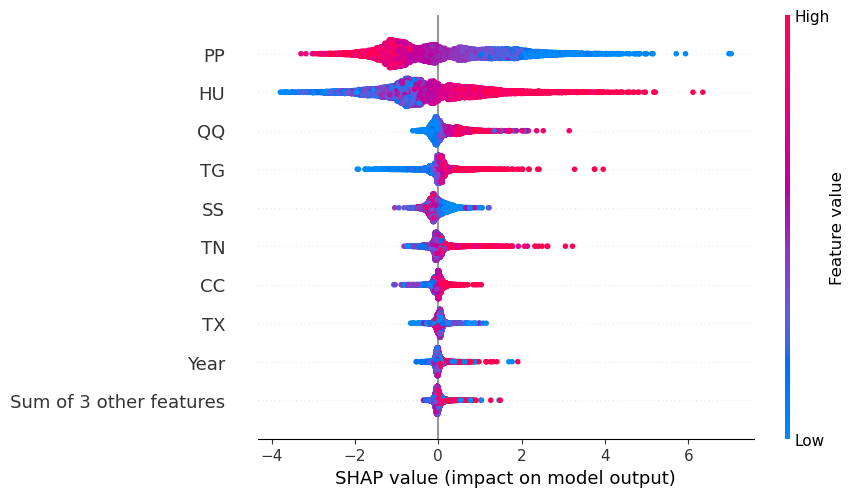

In [122]:
shap.plots.beeswarm(shap_eval, show=False)
labels = [y_labels.get_text() for y_labels in reversed(plt.gca().yaxis.get_majorticklabels())]

The graph showcases in order of feature importance with respect to RR (precipitation). The three features that show the most importance (PP, HU, & QQ). It can be interpretted as follows:

PP - The lower the feature value (blue) the more RR (precipitation) there is, so higher SHAP value. The higher the feature value, the lower the SHAP value. There is also a high concentration of high feature value at a SHAP value of ~-1.

HU - The higher the feature value (red) the more RR (precipiation) there is, so higher SHAP value. The lower the feature value, the lower the SHAP value. There is also a high concentration of low feature value at a SHAP value of ~-1.

QQ - Similar to HU, the higher the feature value (red) the more RR (precipiation) there is, so higher SHAP value. The lower the feature value, the lower the SHAP value. There is however, only a small variance in low feature value.

Homoskedacity

In [123]:
vals = []

for k in X_train.columns:
    if k not in labels:
        vals.append(k)

In [124]:
vals

['SD', 'Month', 'Day']

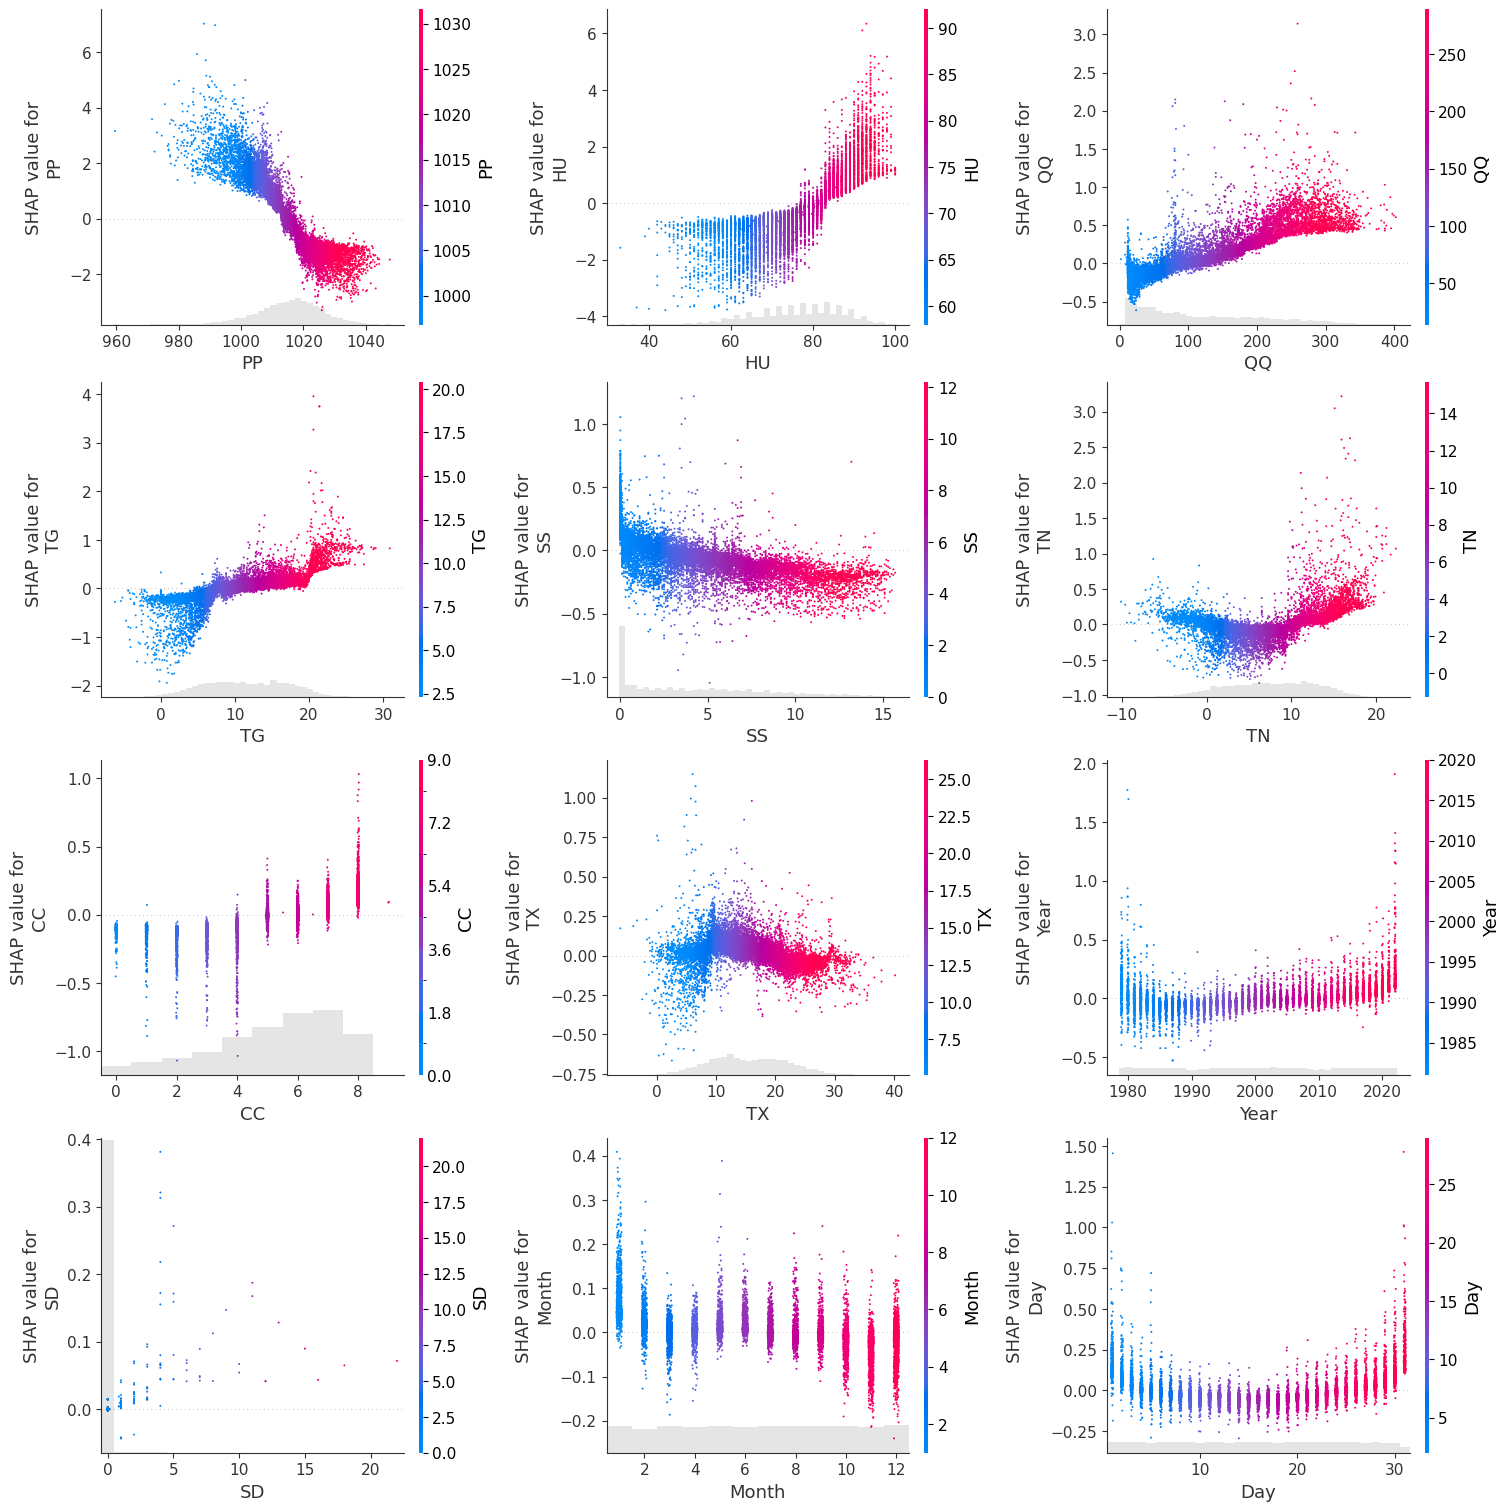

In [125]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15), constrained_layout=True)
axs= axes.ravel()

for i, feat in enumerate(list(X_train[labels[:-1]].columns.values) + vals):
    shap.plots.scatter(shap_eval[:, feat], dot_size=2, color=shap_eval[:, feat], ax=axs[i], show=False)

Each graph has two axis and one legend(blue and red colors).

Left axis represents: SHAP value (i.e importance of feature with respect to RR(precipiation)
Bottom axis represents: Magnitude of the feature 

Colored legend represents: Magnitude of the feature (but also shows values from low to high)


It got standardized as opposed to the graph made above this one. So we have from blue to red. 


With PP:
The lower (bluer) the pressure (PP) the higher the chance of RR (precipitation. The range ~ 1005 hPa and ~1015 hPa could be considered a correlator of higher or lower RR. The graph also shows a lower variance of high pressure (cluster we saw earlier even with the graph above), while there is a high variance of low pressure values with respect to correlating to precipitation. 

Now we run Decision Tree using these three features. 

In [126]:
#Independent features
X = lw_df[['PP', 'HU', 'QQ']]

#Dependent feature
y = lw_df['RR']

In [127]:
scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

In [128]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scal, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [104]:
#estimators = [
    #('reduce_dim', PCA(n_components=10)), 
   # ('dt', DecisionTreeRegressor(max_depth = 5, min_samples_leaf= 5, min_samples_split= 2))  # Decision Tree with specific hyperparameters]

#my_pipe = Pipeline(estimators)

In [244]:
scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scal, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Decision Tree Regressor with specific hyperparameters
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=2)

# Fit the model
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)

In [245]:
# Print test score
print(f'Test score: {dt.score(X_test, y_test)}')

Test score: 0.18342763901167558


In [257]:
from sklearn.metrics import mean_squared_error

# Get predictions
y_pred = dt.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"r2): {r2}")

Mean Squared Error (MSE): 11.451308949168636
r2): 0.18342763901167558


In [248]:
train_bins = dt.apply(X_train)

In [255]:
test_bins = dt.apply(X_test)

In [256]:
val_bins = dt.apply(X_val)

In [264]:
X_train

115704

In [265]:
train_bins.size

12856

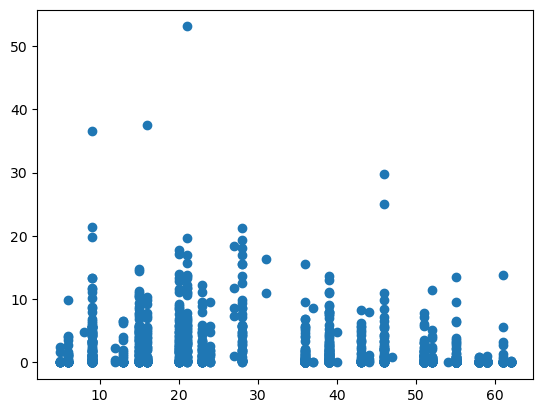

In [276]:
plt.scatter(test_bins, y_test)

In [333]:
from sklearn.preprocessing import KBinsDiscretizer

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal',  strategy='kmeans')

In [334]:
kbins.fit(lw_df2[['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS', 'RR']])

In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.


KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

In [335]:
binned = kbins.transform(lw_df2[['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS', 'RR']])

In [336]:
pd.DataFrame(binned, columns=['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS', 'RR'])

CC   HU   QQ   TX   TG   TN   PP   SD   SS   RR
0      2.0  7.0  1.0  0.0  0.0  0.0  6.0  4.0  4.0  0.0
1      6.0  6.0  0.0  0.0  0.0  0.0  8.0  3.0  1.0  0.0
2      5.0  8.0  0.0  0.0  0.0  0.0  7.0  1.0  0.0  0.0
3      8.0  5.0  0.0  0.0  0.0  0.0  4.0  1.0  0.0  0.0
4      6.0  5.0  0.0  1.0  0.0  1.0  7.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
16066  6.0  8.0  0.0  3.0  2.0  3.0  6.0  0.0  0.0  2.0
16067  8.0  8.0  0.0  2.0  3.0  4.0  3.0  0.0  0.0  1.0
16068  4.0  6.0  0.0  4.0  3.0  5.0  2.0  0.0  1.0  0.0
16069  7.0  8.0  0.0  4.0  4.0  4.0  2.0  0.0  0.0  1.0
16070  8.0  8.0  0.0  3.0  4.0  6.0  2.0  0.0  0.0  2.0

[16071 rows x 10 columns]

The figure layout has changed to tight


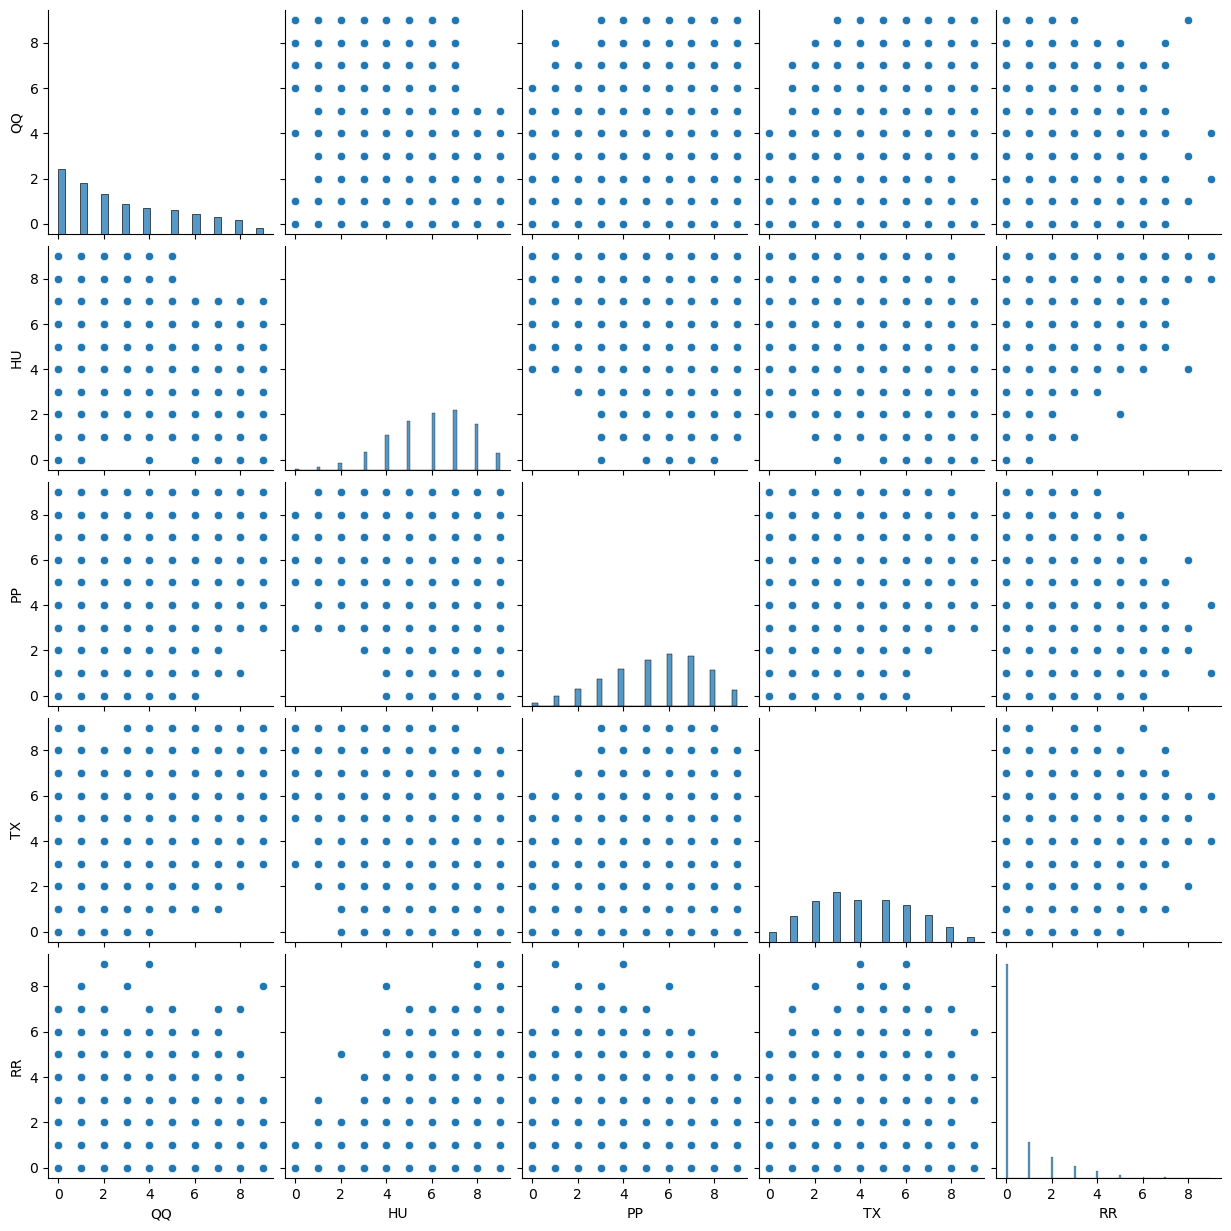

In [337]:
sns.pairplot(pd.DataFrame(binned, columns=['CC', 'HU', 'QQ', 'TX', 'TG', 'TN', 'PP', 'SD', 'SS', 'RR']), x_vars=["QQ", "HU", "PP", "TX", "RR"], y_vars=["QQ", "HU", "PP", "TX", "RR"])

Approximately 16.78% of the variance in the target variable ('RR', precipitation) can be explained by the features included in our model.
The relatively low R-squared value indicates that the model might not be capturing a substantial portion of the variability in the target variable. In other words, the features in the model explain only a modest percentage of the observed variation in precipitation.

Perhaps we need to approach this through another manner given the context of our specific problem. In some cases, predicting certain phenomena like precipitation can be inherently challenging due to the complex and multifaceted nature of weather patterns.

#### 1.2 Feature selection based on PCA (reducing dimensions)

In [561]:
pca_model = PCA(n_components=9) # based on our grid search from earlier

In [562]:
scaler = StandardScaler()
scaler.fit(X)
X_scal = scaler.transform(X)

In [563]:
X_red = pca_model.fit_transform(X_scal)

In [564]:
X_red

array([[ 4.12614748,  6.4525598 , 11.1886049 , ...,  4.49162695,
        -1.02094957,  0.32738383],
       [ 4.73101798,  5.11029693, 10.1063682 , ...,  5.23793138,
         0.47676348,  0.43887901],
       [ 4.71650843,  3.73381857,  5.5751284 , ...,  2.41222634,
        -0.36486562,  0.33237348],
       ...,
       [ 0.75560656, -0.94372321, -1.9244862 , ..., -1.31850742,
         0.34948216,  0.75686102],
       [ 1.90111864, -1.78162164, -1.75900033, ..., -1.19880836,
         0.50337522, -0.27766625],
       [ 1.73192544, -2.40933457, -1.73383645, ..., -0.77658315,
         0.58026302, -0.27147584]])

In [565]:
pca_model.explained_variance_ratio_ 

array([0.36223791, 0.16800067, 0.08657835, 0.0840013 , 0.08172392,
       0.07867068, 0.07070509, 0.02976812, 0.01860618])

Each array we saw above is now a ratio of 10 components with a specific score. Each of them are now ordered with respect to how well they correlate to precipitation.

In [566]:
np.sum(pca_model.explained_variance_ratio_)

0.9802922216833195

In [567]:
pca_model.explained_variance_ratio_.cumsum()

array([0.36223791, 0.53023857, 0.61681693, 0.70081823, 0.78254215,
       0.86121283, 0.93191792, 0.96168604, 0.98029222])

Above we can see, 7 components of the 10 are able to explain 93% of the dataset with respect to precipitation. 

In [568]:
list(range(0,8))

[0, 1, 2, 3, 4, 5, 6, 7]

In [569]:
pca_model.components_

array([[ 0.25157767,  0.37441877, -0.43155067, -0.41461587, -0.40092611,
        -0.3378814 , -0.09587768,  0.06816301, -0.38023388, -0.05366882,
        -0.04660279, -0.00163405],
       [-0.44329184, -0.25294211,  0.14377194, -0.25183029, -0.35787043,
        -0.45782815,  0.28354819,  0.13257589,  0.34822015, -0.03170148,
        -0.31110754, -0.0268293 ],
       [ 0.15017764, -0.02026294,  0.12517998,  0.04307019,  0.05821907,
         0.06259667, -0.23479575,  0.56670446,  0.03966828, -0.5924166 ,
        -0.16309021, -0.4436111 ],
       [-0.00971685, -0.05722942, -0.01242003, -0.01219135,  0.00257435,
         0.01706978, -0.20317895,  0.05286354, -0.06049247,  0.68025298,
        -0.20584622, -0.6657155 ],
       [-0.24880911,  0.12183143, -0.14169306, -0.01355878, -0.04036416,
        -0.06105017,  0.32231001, -0.05191009,  0.06701912, -0.1292974 ,
         0.73799072, -0.47456916],
       [-0.17877454,  0.0351237 , -0.04388613,  0.00616964,  0.00373708,
        -0.00307117, -

In [570]:
important_index = [np.abs(pca_model.components_[k]).argmax() for k in range(7)]

In [571]:
important_index

[2, 5, 9, 9, 10, 7, 6]

In [572]:
important_features = [X.columns[important_index[m]] for m in range(7)]

In [573]:
important_features

['QQ', 'TN', 'Year', 'Year', 'Month', 'SD', 'PP']

From this we can see that there are relationship unbenounced to us that the model was able to see. For example, some aspect of `year`(along with some other feature/s), `month`(same) and `temp min`(same) is able to showcase a strong correlation to precipitation (RR). We would have to explore more in depth with an SME to determine what that is. 

In [574]:
np.transpose(pca_model.components_[0:2, :])

array([[ 0.25157767, -0.44329184],
       [ 0.37441877, -0.25294211],
       [-0.43155067,  0.14377194],
       [-0.41461587, -0.25183029],
       [-0.40092611, -0.35787043],
       [-0.3378814 , -0.45782815],
       [-0.09587768,  0.28354819],
       [ 0.06816301,  0.13257589],
       [-0.38023388,  0.34822015],
       [-0.05366882, -0.03170148],
       [-0.04660279, -0.31110754],
       [-0.00163405, -0.0268293 ]])

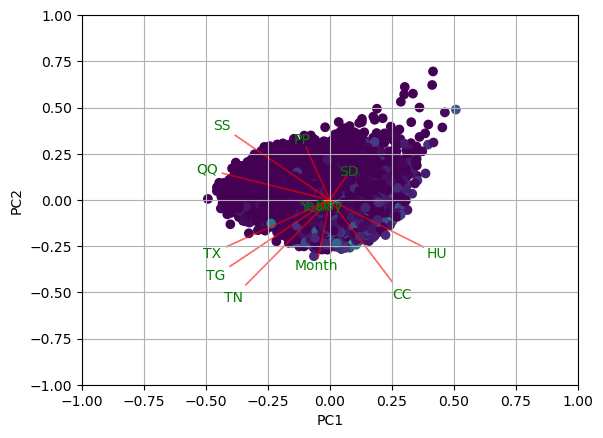

In [575]:
def myplot(pca_score,coeff,labels=None):
    xs = pca_score[:,0]
    ys = pca_score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only 2 PCs.
myplot(X_red[:,0:2],np.transpose(pca_model.components_[0:2, :]), X.columns)
plt.show()

In [576]:
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_red, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [577]:
ridge = Ridge(alpha=10)

ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [578]:
y_pred = ridge.predict(X_test)

In [579]:
mean_squared_error(y_pred, y_test)

11.634808299535475

In [580]:
r2_score(y_test, y_pred)

0.17034262851776594

In [581]:
pca_one = PCA(.85)

In [582]:
pca_one.fit(X_train)

PCA(n_components=0.85)

In [583]:
pca_one.explained_variance_ratio_

array([0.36948929, 0.17186641, 0.08848469, 0.08599556, 0.08262492,
       0.08018783])

In [584]:
X_pca_train = pca_one.transform(X_train)

In [585]:
X_pca_test = pca_one.transform(X_test)

In [586]:
from sklearn.metrics import mean_squared_error

# Get predictions
y_pred = dt.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"r2): {r2}")

Mean Squared Error (MSE): 22.689356212460307
r2): -0.6179374125661776


In [587]:
from sklearn.metrics import r2_score, confusion_matrix

# Assuming x and y are your features and target variable
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_red, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)


# Build and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(9)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='sgd', loss='mae')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=20)

# Predict on test set
y_pred_test = model.predict(X_test)

# Calculate MAE on test set
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Test MAE:", mae_test)

# Calculate R-squared (R2) on test set
r2_test = r2_score(y_test, y_pred_test)
print("Test R2:", r2_test)

Epoch 1/20
402/402 [==============================] - 1s 1ms/step - loss: 1.6350
Epoch 2/20
402/402 [==============================] - 1s 1ms/step - loss: 1.5502
Epoch 3/20
402/402 [==============================] - 1s 1ms/step - loss: 1.5099
Epoch 4/20
402/402 [==============================] - 1s 1ms/step - loss: 1.4913
Epoch 5/20
402/402 [==============================] - 1s 1ms/step - loss: 1.4800
Epoch 6/20
402/402 [==============================] - 1s 1ms/step - loss: 1.4727
Epoch 7/20
402/402 [==============================] - 1s 1ms/step - loss: 1.4670
Epoch 8/20
402/402 [==============================] - 1s 1ms/step - loss: 1.4628
Epoch 9/20
402/402 [==============================] - 1s 1ms/step - loss: 1.4589
Epoch 10/20
402/402 [==============================] - 1s 1ms/step - loss: 1.4572
Epoch 11/20
402/402 [==============================] - 1s 1ms/step - loss: 1.4545
Epoch 12/20
402/402 [==============================] - 1s 1ms/step - loss: 1.4535
Epoch 13/20
402/402 [====

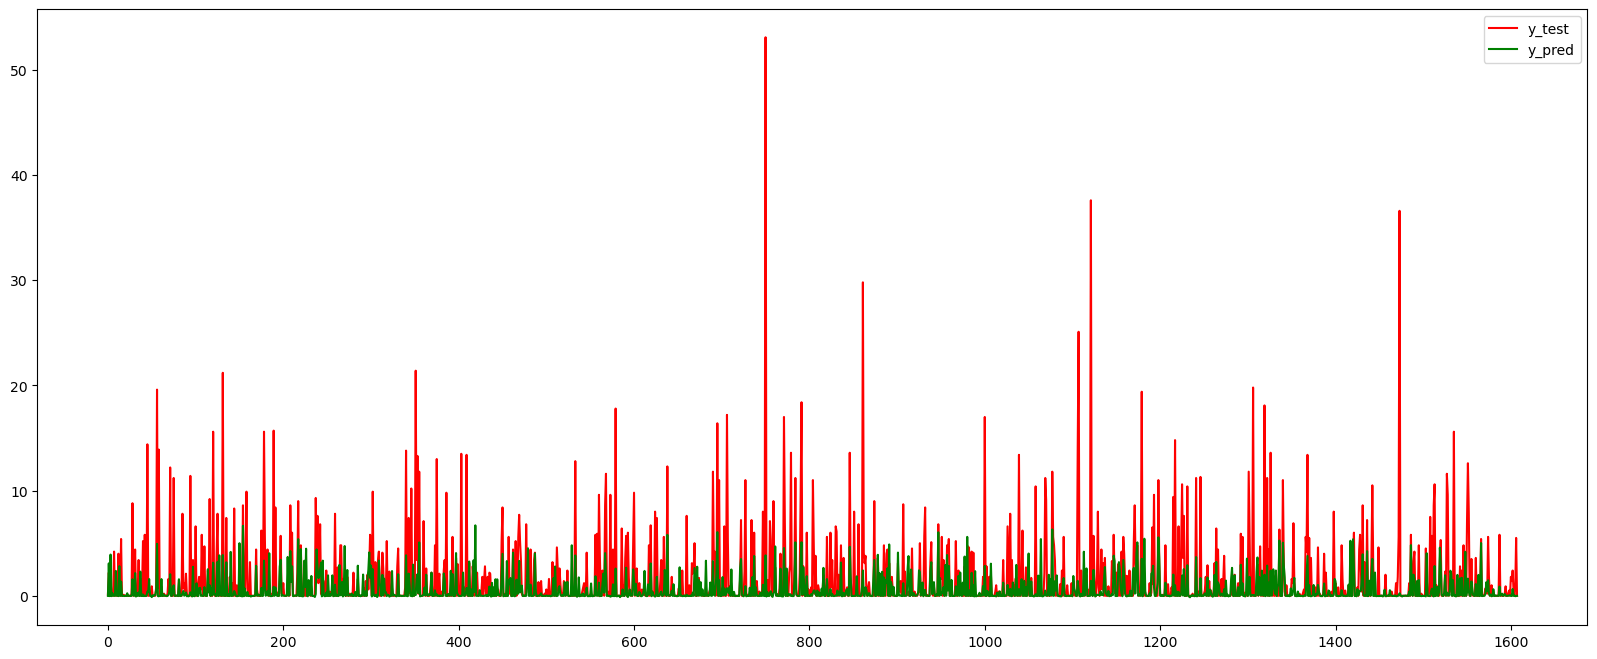

In [588]:
plt.figure(figsize=(20, 8))
plt.plot([i for i in range(len(y_test))], y_test, label="y_test", c="r")
plt.plot([i for i in range(len(y_test))], y_pred_test, label="y_pred", c="g")
plt.legend()
plt.show()

In [602]:
from sklearn.metrics import r2_score, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

# Assuming x and y are your features and target variable
# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_red, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)


X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


# Build and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(units=1)
])


model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[early_stopping])

model.evaluate(X_test, y_test)

# Predict on test set
y_pred_test = model.predict(X_test)

# Calculate MAE on test set
mae_test = mean_absolute_error(y_test, y_pred_test.reshape(y_test.shape))
print("Test MAE:", mae_test)

# Calculate R-squared (R2) on test set
r2_test = r2_score(y_test, y_pred_test.reshape(y_test.shape))
print("Test R2:", r2_test)

Epoch 1/50
322/322 [==============================] - 3s 4ms/step - loss: 13.2796 - val_loss: 12.9731
Epoch 2/50
322/322 [==============================] - 1s 2ms/step - loss: 11.0619 - val_loss: 12.7916
Epoch 3/50
322/322 [==============================] - 1s 2ms/step - loss: 10.9179 - val_loss: 12.7289
Epoch 4/50
322/322 [==============================] - 1s 2ms/step - loss: 10.8336 - val_loss: 12.6875
Epoch 5/50
322/322 [==============================] - 1s 2ms/step - loss: 10.7764 - val_loss: 12.6784
Epoch 6/50
322/322 [==============================] - 1s 3ms/step - loss: 10.7306 - val_loss: 12.6838
Epoch 7/50
322/322 [==============================] - 1s 2ms/step - loss: 10.7022 - val_loss: 12.6795
Epoch 8/50
322/322 [==============================] - 1s 2ms/step - loss: 10.6803 - val_loss: 12.6829
Epoch 9/50
322/322 [==============================] - 1s 2ms/step - loss: 10.6577 - val_loss: 12.6573
Epoch 10/50
322/322 [==============================] - 1s 2ms/step - loss: 10.6262

In [601]:
y_pred_test.reshape(y_test.shape)

array([ 6.7542416e-01,  5.1744709e+00,  4.8331618e-03, ...,
        8.2059473e-01,  6.6661197e-01, -6.8610191e-02], dtype=float32)

In [396]:
ridge = Ridge(alpha=10)

ridge.fit(X_pca_train, y_train)

Ridge(alpha=10)

In [397]:
y_pred = ridge.predict(X_pca_test)

In [398]:
mean_squared_error(y_pred, y_test)

13.727396934864613

In [399]:
r2_score(y_test, y_pred)

0.021123875437830453

It is hard to see any patterns on a static chart like this with so many data points. Lets explore a better visualization. 

Perhaps we can try linking to RNN (LSTM) to better understand .

In [682]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

# Assuming 'lw_df' is your DataFrame containing the dataset
# Step 1: Prepare Time Series Data
time_series_data = lw_df2['RR']  # Assuming 'RR' represents precipitation

fft(np.array(time_series_data))

array([26836.9         -0.j        ,    88.3678671 +643.25433059j,
         642.30122454-195.59961981j, ...,  -430.0356536 +220.84273891j,
         642.30122454+195.59961981j,    88.3678671 -643.25433059j])

In [636]:
fft(np.array(time_series_data))

array([ 1.63187605e+07   -0.j        ,  2.19667270e+02-2886.91479444j,
       -2.25822122e+03 +347.67845855j, ...,
        1.55608493e+03-4173.65199194j, -2.25822122e+03 -347.67845855j,
        2.19667270e+02+2886.91479444j])

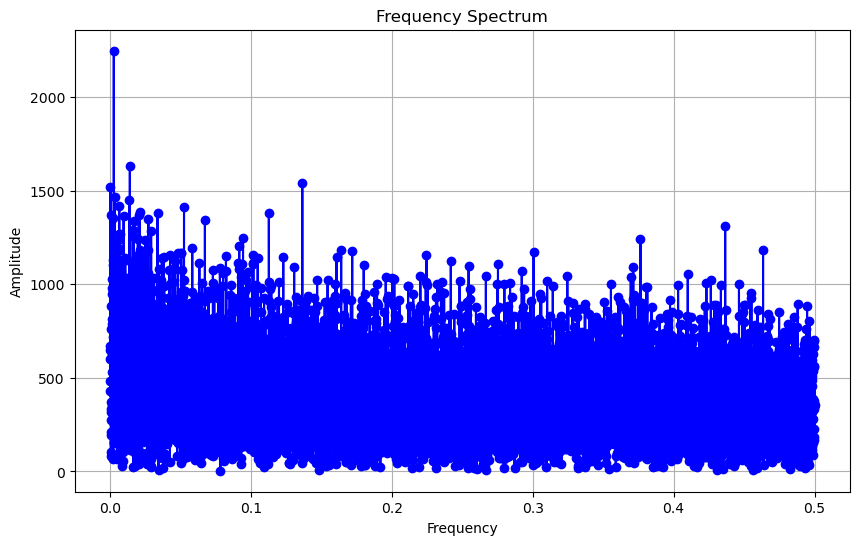

In [683]:
# Step 2: Apply Fourier Transform
fft_result = fft(np.array(time_series_data))
freq = fftfreq(len(time_series_data), d=1)  # Assuming the data is evenly spaced

# Step 3: Identify Seasonal Frequencies
# Find the indices corresponding to positive frequencies (excluding the DC component at index 0)
positive_freq_indices = np.where(freq > 0)[0]

# Extract corresponding frequencies and their magnitudes
positive_freqs = freq[positive_freq_indices]
amplitudes = np.abs(fft_result[positive_freq_indices])

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, amplitudes, marker='o', linestyle='-', color='b')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()

# # Step 4: Extract Seasonal Trend
# # Identify the dominant frequencies representing seasonal periods (e.g., yearly, quarterly, monthly)
# # You can manually select the dominant frequencies based on the frequency spectrum plot
# dominant_seasonal_frequencies = [0.4]  # Example: yearly and monthly frequencies

# # Filter out non-seasonal frequencies
# filtered_fft_result = np.zeros_like(fft_result)
# for freq_idx, freq_val in enumerate(freq):
#     if freq_val in dominant_seasonal_frequencies or -freq_val in dominant_seasonal_frequencies:
#         filtered_fft_result[freq_idx] = fft_result[freq_idx]

# # Reconstruct the time series data using inverse Fourier Transform
# seasonal_trend = np.real(ifft(filtered_fft_result))

# # Plot the original time series data and the seasonal trend
# plt.figure(figsize=(12, 6))
# plt.plot(time_series_data, label='Original Time Series Data')
# plt.plot(seasonal_trend, label='Seasonal Trend')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.title('Original Time Series Data vs. Seasonal Trend')
# plt.legend()
# plt.grid(True)
# plt.show()


In [684]:
np.abs(fft_result)

array([26836.9       ,   649.29578295,   671.4239155 , ...,
         483.427532  ,   671.4239155 ,   649.29578295])

In [710]:
# Step 3: Filter Frequencies
# Define a frequency threshold or specify dominant frequency bands to filter out non-dominant frequencies
threshold = np.percentile(np.abs(fft_result), 90)

dominant_freq_indices = np.abs(fft_result) > threshold  # Use a threshold to filter frequencies
filtered_fft_result = np.zeros_like(fft_result)
filtered_fft_result[dominant_freq_indices] = fft_result[dominant_freq_indices]

# Step 4: Inverse Fourier Transform
# Reconstruct the time series data using inverse Fourier Transform
seasonal_trend = np.real(ifft(filtered_fft_result))

# Now 'seasonal_trend' contains the reconstructed seasonal trend of the time series data

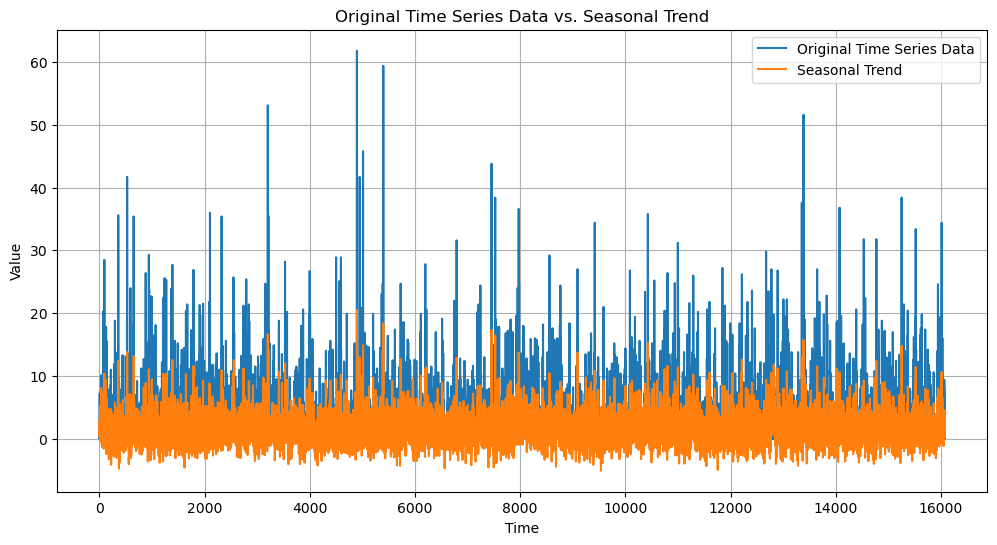

In [711]:
# Plot the original time series data and the seasonal trend
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Original Time Series Data')
plt.plot(seasonal_trend, label='Seasonal Trend')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Time Series Data vs. Seasonal Trend')
plt.legend()
plt.grid(True)
plt.show()

In [1022]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

In [1003]:
lw_df

DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS  \
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0   
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7   
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0   
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0   
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0   
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...   
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5   
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0   
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5   
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1   
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0   

       Month  Year  
0          1  1979  
1          1  1979  
2          1  1979  
3          1  1979  
4          1  1979  
...      ...   ...  
16066     12  2022  
16067     12  2022  
16068     12  2022  
16069     12  2022  
16070     12  2022  

[16071 rows x 13 columns]

In [1008]:
lw_df["DATE"] = pd.to_datetime(lw_df["DATE"])
lw_df = lw_df.set_index("DATE")

lw_df.head()

CC    HU    QQ   TX   TN   TG   RR      PP   SD   SS
DATE                                                             
1979-01-01  2.0  83.0  52.0  2.3 -7.5 -4.1  0.4  1019.0  9.0  7.0
1979-01-02  6.0  76.0  27.0  1.6 -7.5 -2.6  0.0  1025.3  8.0  1.7
1979-01-03  5.0  86.0  13.0  1.3 -7.2 -2.8  0.0  1020.5  4.0  0.0
1979-01-04  8.0  68.0  13.0 -0.3 -6.5 -2.6  0.0  1008.4  2.0  0.0
1979-01-05  6.0  73.0  29.0  5.6 -1.4 -0.8  0.0  1022.5  1.0  2.0

In [1009]:
RR_time_df = lw_df[['RR']]

In [1010]:
RR_time_df.head()

RR
DATE           
1979-01-01  0.4
1979-01-02  0.0
1979-01-03  0.0
1979-01-04  0.0
1979-01-05  0.0

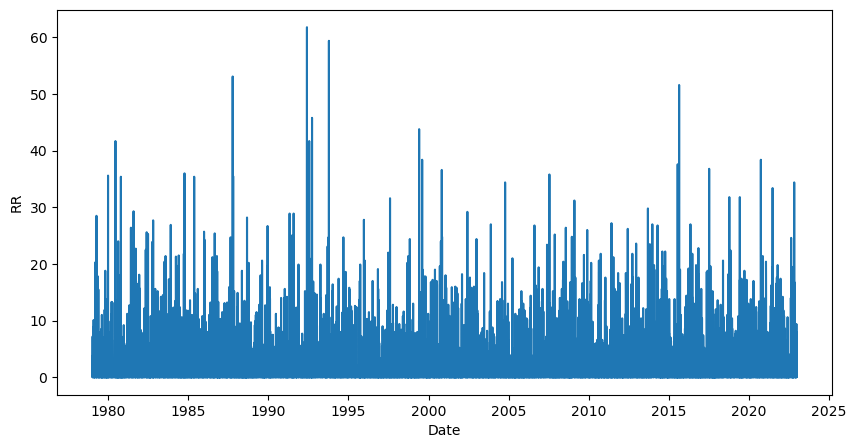

In [1011]:
plt.figure(figsize=(10,5))
plt.xlabel('Date')
plt.ylabel('RR')
plt.plot(RR_time_df)

In [1018]:
# the "MS" option specifies Monthly frequency by Start day
lw_df_monthly = lw_df.resample("MS").mean()

lw_df_monthly.head()

CC         HU          QQ         TX        TN         TG  \
DATE                                                                          
1979-01-01  5.741935  88.064516   29.032258   4.293548 -2.612903   0.616129   
1979-02-01  6.428571  87.035714   45.214286   5.175000 -0.200000   2.057143   
1979-03-01  5.967742  82.580645   93.354839   9.487097  1.977419   5.587097   
1979-04-01  6.133333  79.066667  134.166667  12.520000  4.810000   8.743333   
1979-05-01  5.290323  78.161290  204.064516  16.206452  7.151613  11.490323   

                  RR           PP        SD        SS  
DATE                                                   
1979-01-01  1.932258  1012.148387  1.354839  1.887097  
1979-02-01  1.571429  1011.639286  0.107143  1.889286  
1979-03-01  3.061290  1004.590323  0.032258  3.212903  
1979-04-01  2.586667  1011.653333  0.000000  3.543333  
1979-05-01  2.806452  1013.625806  0.000000  6.470968

In [1019]:
import plotly.express as px

# Assuming lw_df_monthly is your DataFrame containing monthly data
fig = px.line(lw_df_monthly, x=lw_df_monthly.index, y=lw_df_monthly.columns)
fig.update_layout(
    yaxis_title="Values",  # Adjust y-axis label as needed
    xaxis_title="Date",  # Adjust x-axis label as needed
    legend_title="Columns",  # Adjust legend title as needed
    title="Monthly Data"  # Adjust plot title as needed
)
fig.show()

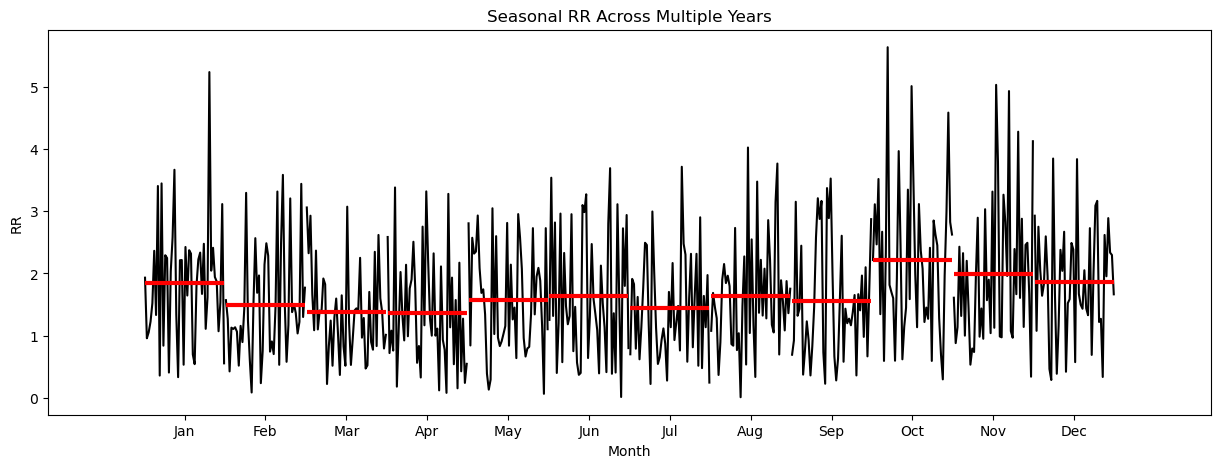

In [1020]:
from statsmodels.graphics.tsaplots import month_plot
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Assuming lw_df_monthly is your DataFrame containing monthly data
# Replace "RR" with the actual column name from your DataFrame
month_plot(lw_df_monthly["RR"], ax=plt.gca())

plt.title("Seasonal RR Across Multiple Years")
plt.xlabel("Month")
plt.ylabel("RR")
plt.show()

In [1025]:
decomposition = tsa.seasonal_decompose(lw_df_monthly["RR"], model='additive')

In [1027]:
# add the decomposition data
lw_df_monthly["Trend"] = decomposition.trend
lw_df_monthly["Seasonal"] = decomposition.seasonal
lw_df_monthly["Residual"] = decomposition.resid

In [1028]:
lw_df_monthly

CC         HU          QQ         TX         TN         TG  \
DATE                                                                           
1979-01-01  5.741935  88.064516   29.032258   4.293548  -2.612903   0.616129   
1979-02-01  6.428571  87.035714   45.214286   5.175000  -0.200000   2.057143   
1979-03-01  5.967742  82.580645   93.354839   9.487097   1.977419   5.587097   
1979-04-01  6.133333  79.066667  134.166667  12.520000   4.810000   8.743333   
1979-05-01  5.290323  78.161290  204.064516  16.206452   7.151613  11.490323   
...              ...        ...         ...        ...        ...        ...   
2022-08-01  3.483871  61.032258  205.677419  26.877419  15.932258  21.458065   
2022-09-01  5.766667  75.933333  123.733333  20.013333  11.803333  15.976667   
2022-10-01  4.774194  82.096774   87.516129  18.151613  10.380645  14.309677   
2022-11-01  5.733333  86.033333   39.833333  12.883333   7.623333  10.400000   
2022-12-01  5.419355  87.483871   24.451613   8.093548   1.732258   4.825806   

                  RR           PP        SD        SS  Trend  Seasonal  \
DATE                                                                     
1979-01-01  1.932258  1012.148387  1.354839  1.887097    NaN  0.196955   
1979-02-01  1.571429  1011.639286  0.107143  1.889286    NaN -0.155166   
1979-03-01  3.061290  1004.590323  0.032258  3.212903    NaN -0.314207   
1979-04-01  2.586667  1011.653333  0.000000  3.543333    NaN -0.311867   
1979-05-01  2.806452  1013.625806  0.000000  6.470968    NaN -0.107924   
...              ...          ...       ...       ...    ...       ...   
2022-08-01  1.754839  1017.870968  0.000000  7.558065    NaN -0.022146   
2022-09-01  2.873333  1013.386667  0.000000  3.970000    NaN -0.129800   
2022-10-01  2.625806  1014.587097  0.000000  4.283871    NaN  0.548723   
2022-11-01  4.126667  1007.583333  0.000000  2.330000    NaN  0.286548   
2022-12-01  1.664516  1011.861290  0.000000  1.819355    NaN  0.223757   

            Residual  
DATE                  
1979-01-01       NaN  
1979-02-01       NaN  
1979-03-01       NaN  
1979-04-01       NaN  
1979-05-01       NaN  
...              ...  
2022-08-01       NaN  
2022-09-01       NaN  
2022-10-01       NaN  
2022-11-01       NaN  
2022-12-01       NaN  

[528 rows x 13 columns]

In [1102]:
unique_rr_values = lw_df["RR"].unique()

# Calculate the range of 'RR' values
rr_range = unique_rr_values.max() - unique_rr_values.min()

# Print the range of 'RR' values
print("Range of 'RR' values:", rr_range)

Range of 'RR' values: 61.8


In [1104]:
unique_rr_values.max()

61.8

In [1105]:
unique_rr_values.min()

0.0

In [1032]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [1033]:
cols = ["Trend", "Seasonal", "Residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=lw_df_monthly.index, y=lw_df_monthly[col]),
        row=i+1,
        col=1
    )

fig.update_layout(height=800, width=1200, showlegend=False)
fig.show()

# Forecasting

In [1035]:
# Calculate the seasonal difference
lw_df_monthly["seasonal_difference"] = lw_df_monthly["RR"].diff(12)

In [1036]:
lw_df_monthly[["RR", "seasonal_difference"]].head(16)

RR  seasonal_difference
DATE                                     
1979-01-01  1.932258                  NaN
1979-02-01  1.571429                  NaN
1979-03-01  3.061290                  NaN
1979-04-01  2.586667                  NaN
1979-05-01  2.806452                  NaN
1979-06-01  1.253333                  NaN
1979-07-01  0.700000                  NaN
1979-08-01  1.077419                  NaN
1979-09-01  0.693333                  NaN
1979-10-01  2.216129                  NaN
1979-11-01  1.610000                  NaN
1979-12-01  2.929032                  NaN
1980-01-01  0.958065            -0.974194
1980-02-01  1.268966            -0.302463
1980-03-01  2.325806            -0.735484
1980-04-01  0.720000            -1.866667

### Seasonal Difference visualized

In [1037]:
fig = px.line(lw_df_monthly, x=lw_df_monthly.index, y="seasonal_difference")

fig.update_layout(
    yaxis_title="Seasonal Difference", 
    xaxis_title="Date",
    title="Seasonal Difference of RR over Time"
)

fig.show()

### Split series for evaluation

In [1038]:
# we drop the null values introduced at differencing
train = lw_df_monthly.loc[lw_df_monthly.index <= "2018-01-01", "seasonal_difference"].dropna()
test = lw_df_monthly.loc[lw_df_monthly.index > "2018-01-01", "seasonal_difference"]

In [1039]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.update_layout(
    yaxis_title="Difference", 
    xaxis_title="Date",
    title="Change in RR over Time"
)
fig.show()

### Baseline Forecast and evaluation

Since our differenced series is stationary, we will use the mean (over the training set) as our baseline.

In [1040]:

full_index = pd.concat([train, test]).index
base_line = np.full(full_index.shape, np.mean(train))

predictions = pd.Series(data=base_line, index=full_index)

In [1041]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name="Mean Prediction"))

fig.update_layout(
    yaxis_title="Difference", 
    xaxis_title="Date",
    title="Change in RR over Time"
)
fig.show()

Both previous metrics are heavily influenced by the scale of the data. To put these numbers into perspective, we can look at what percentage (on average) our prediction is off by the original value. This metric is called the _mean absolute percentage error_ (MAPE) and going forward, we will use this metric to compare our models quantitatively.

In [1042]:
def mean_absolute_percentage_error(true_values, predicted_values):
    """
    Calculate the mean absolute percentage error. 
    Find the prediction error and devide by the true value, then average.
    """
    
    error = true_values - predicted_values
    absolute_percentage_error = np.abs(error/true_values)
    mape = absolute_percentage_error.mean() * 100
    
    return mape

train_mape = mean_absolute_percentage_error(train, predictions[train.index])
test_mape = mean_absolute_percentage_error(test, predictions[test.index])

print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")

Train MAPE on the difference: 100.32%
Test MAPE on the difference: 99.88%


_Autocorrelation plots_ help determine if the successive elements of a time series are positively correlated, negatively correlated, or independent of each other. Analysing the autocorrelations is a key step in finding the right parameters for (autoregressive) time series models.

When looking at correlation, we usually think of correlation between two variables like height and weight. With time series data, when looking at autocorrelation, we are calculating the correlation between the time series elements and the corresponding elements that were observed a certain time period earlier.  That time period is called the _lag_. 

As an example, the autocorrelation with lag 3 is the correlation between the revenue that were observed in a certain month and revenue prices that were recorded 3 month prior, as shown in the plot below. The plot below shows a clear positive correlation:

In [1043]:
fig = px.scatter(
    x=lw_df_monthly["RR"], 
    y=lw_df_monthly["RR"].shift(3) # 3-month lagged observations
)
fig.update_layout(
    xaxis_title="RR on Current Month", 
    yaxis_title="RR 3-month Lagged"
)
fig.show()

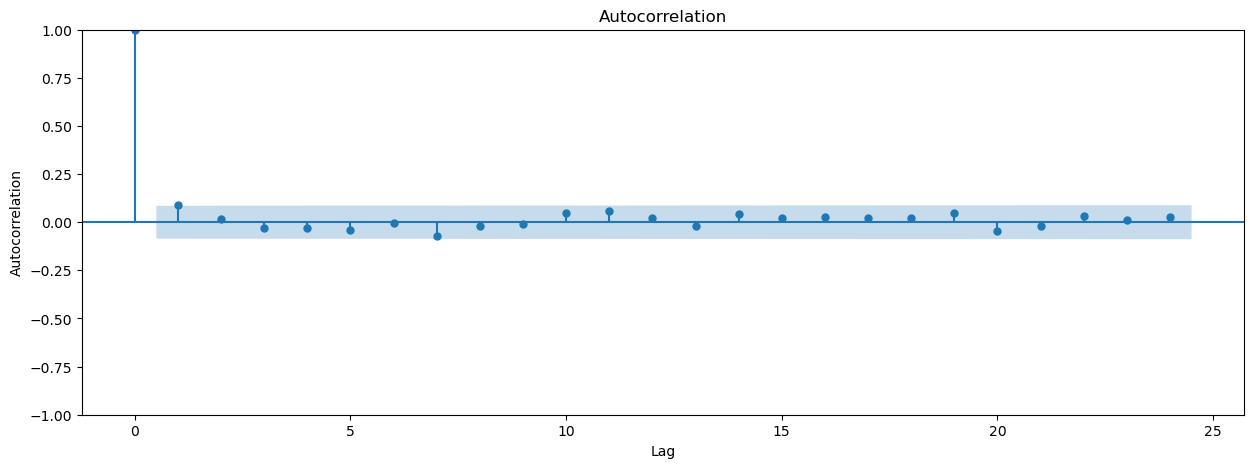

In [1044]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(15, 5))

# put the acf plot on the current axis
plot_acf(lw_df_monthly["RR"], lags=24, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

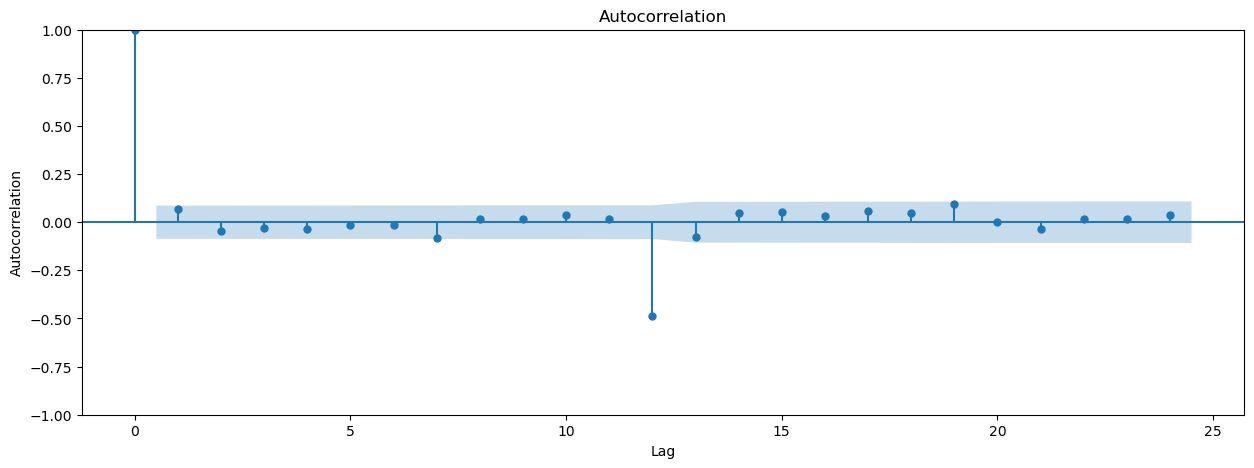

In [1045]:
plt.figure(figsize=(15, 5))
plot_acf(lw_df_monthly["seasonal_difference"].dropna(), lags=24, ax=plt.gca())
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

The shaded area here corresponds to a 95% confidence interval for non-significant correlations.

The _partial autocorrelation_ is the autocorrelation after removing the effect of any correlations resulting from terms at shorter lags. We can get this plot using the _partial auto-correlation function_ (`pacf`) from `statsmodels`.

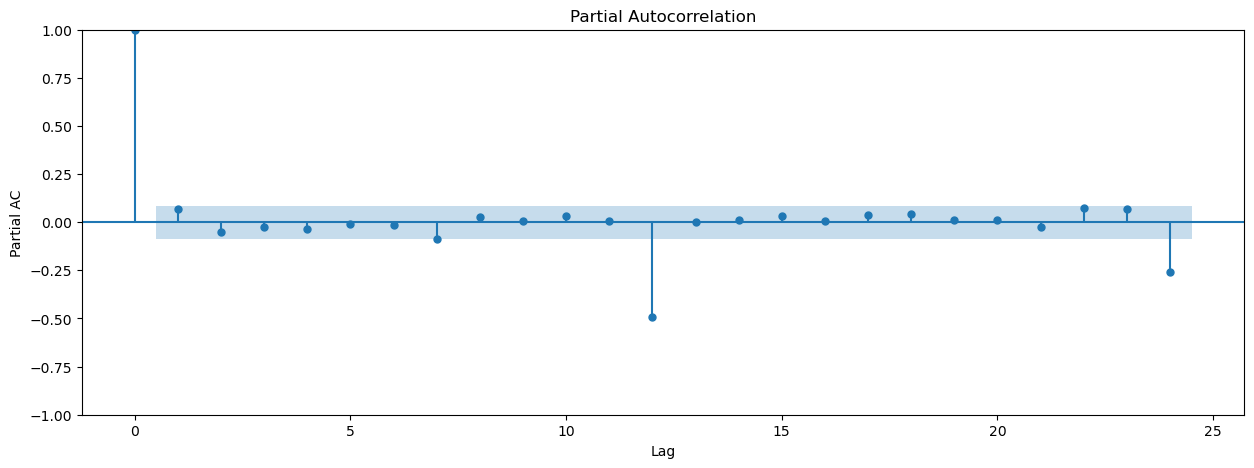

In [1046]:
plt.figure(figsize=(15, 5))
plot_pacf(lw_df_monthly["seasonal_difference"].dropna(), lags=24, ax=plt.gca(), method='ywm')
plt.xlabel('Lag')
plt.ylabel('Partial AC')
plt.show()

#### Fitting an AR model with `statsmodels`

In [1047]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p_param = 2

model = SARIMAX(train, order=(p_param, 0, 0), trend="c")
model_fit = model.fit(disp=0)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     seasonal_difference   No. Observations:                  457
Model:                SARIMAX(2, 0, 0)   Log Likelihood                -789.772
Date:                 Sun, 28 Jan 2024   AIC                           1587.543
Time:                         22:19:36   BIC                           1604.042
Sample:                     01-01-1980   HQIC                          1594.042
                          - 01-01-2018                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0084      0.064     -0.131      0.896      -0.134       0.118
ar.L1          0.0721      0.048      1.490      0.136      -0.023       0.167
ar.L2         -0.0570      0.049     -1.160      0.246      -0.153       0.039
sigma2         1.8560      0.123     15.095      0.000       1.615       2.097
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.99   Prob(JB):                         0.56
Heteroskedasticity (H):               1.08   Skew:                             0.12
Prob(H) (two-sided):                  0.64   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1048]:
predictions = model_fit.predict(start=0, end=len(train)+len(test)-1)

In [1049]:
predictions.index.min()

Timestamp('1980-01-01 00:00:00')

In [1050]:
predictions.index.max()

Timestamp('2022-12-01 00:00:00')

To demonstrate again how the formula is being applied, we can calculate the first forecast value by hand using the coefficients:

In [1051]:
betas = model_fit.params
betas

intercept   -0.008399
ar.L1        0.072065
ar.L2       -0.056962
sigma2       1.855998
dtype: float64

In [1052]:
# set the index for the prediction
current_idx = 2

print(f"Prediction by the model: {predictions[current_idx]}\n") 

print(f'Prediction by applying the formula: \
      {betas["intercept"] + betas["ar.L1"]*train[current_idx-1] + betas["ar.L2"]*train[current_idx-2]}') 

Prediction by the model: 0.025296076595228756

Prediction by applying the formula:       0.025296076595228756


The `forecast` method will forecast the time series values starting after the last observation in the training set.

In [1053]:
train.index.max()

Timestamp('2018-01-01 00:00:00')

In [1054]:
model_fit.forecast(steps=5)

2018-02-01   -0.143606
2018-03-01   -0.014705
2018-04-01   -0.001278
2018-05-01   -0.007653
2018-06-01   -0.008877
Freq: MS, Name: predicted_mean, dtype: float64

We can verify that these are the same values that the `predict` method returns after the last train time step.

In [1055]:
predictions[len(train): len(train)+5]

2018-02-01   -0.143606
2018-03-01   -0.014705
2018-04-01   -0.001278
2018-05-01   -0.007653
2018-06-01   -0.008877
Freq: MS, Name: predicted_mean, dtype: float64

In [1056]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name="Predictions"))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title="Difference", 
    xaxis_title="Date",
    title="Change in RR over Time"
)
fig.show()

In [1057]:
train_mape = mean_absolute_percentage_error(train, predictions[train.index])
test_mape = mean_absolute_percentage_error(test, predictions[test.index])

print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")

Train MAPE on the difference: 111.33%
Test MAPE on the difference: 99.19%


### Reconstructing the original series

We fitted the model on the seasonally differenced data, but how does our forecast translate to the original time series? In order to reconstruct the Revenue Passenger Miles from the seasonal difference, we start with the original 12 values and always looking back 12 months, we add the difference to get the next restored value.

Rewrite the code to achieve this

In [1059]:
# we slice out the first 12 months and the rest of the dates
first_year_indices = lw_df_monthly.index[:12]
remaining_indices = lw_df_monthly.index[12:]

# create an empty restored column
lw_df_monthly["restored"] = np.nan

# fill in the first 12 original values into the empty restored column
lw_df_monthly.loc[first_year_indices, "restored"] = \
    lw_df_monthly.loc[first_year_indices, "RR"]

# use the current difference value and 12-month lagged restored value to get the next restored value
for current_date in remaining_indices:
    current_value = lw_df_monthly.loc[current_date, "seasonal_difference"]
    year_before_restored = lw_df_monthly.loc[current_date - pd.DateOffset(months=12), "restored"]
    
    lw_df_monthly.loc[current_date, "restored"] = year_before_restored + current_value

# check agreement everywhere (rounding errors can come up so check closeness rather than strict equality)
np.allclose(lw_df_monthly["RR"], lw_df_monthly["restored"])

True

We can do the same for the AR prediction starting at the test set. First, we create a column that holds our differenced values based on the AR model:

In [1060]:
# use the original train diff values and predicted test values
lw_df_monthly.loc[train.index, "AR_difference"] = lw_df_monthly.loc[train.index, "seasonal_difference"]
lw_df_monthly.loc[test.index, "AR_difference"] = predictions[test.index]
lw_df_monthly.head()

CC         HU          QQ         TX        TN         TG  \
DATE                                                                          
1979-01-01  5.741935  88.064516   29.032258   4.293548 -2.612903   0.616129   
1979-02-01  6.428571  87.035714   45.214286   5.175000 -0.200000   2.057143   
1979-03-01  5.967742  82.580645   93.354839   9.487097  1.977419   5.587097   
1979-04-01  6.133333  79.066667  134.166667  12.520000  4.810000   8.743333   
1979-05-01  5.290323  78.161290  204.064516  16.206452  7.151613  11.490323   

                  RR           PP        SD        SS  Trend  Seasonal  \
DATE                                                                     
1979-01-01  1.932258  1012.148387  1.354839  1.887097    NaN  0.196955   
1979-02-01  1.571429  1011.639286  0.107143  1.889286    NaN -0.155166   
1979-03-01  3.061290  1004.590323  0.032258  3.212903    NaN -0.314207   
1979-04-01  2.586667  1011.653333  0.000000  3.543333    NaN -0.311867   
1979-05-01  2.806452  1013.625806  0.000000  6.470968    NaN -0.107924   

            Residual  seasonal_difference  restored  AR_difference  
DATE                                                                
1979-01-01       NaN                  NaN  1.932258            NaN  
1979-02-01       NaN                  NaN  1.571429            NaN  
1979-03-01       NaN                  NaN  3.061290            NaN  
1979-04-01       NaN                  NaN  2.586667            NaN  
1979-05-01       NaN                  NaN  2.806452            NaN

Then we repeat the same process that we tested for the original values:

In [1061]:
# empty restored column
lw_df_monthly["RR_restored"] = np.nan

# fill in the first 12 original values
lw_df_monthly.loc[first_year_indices, "RR_restored"] = \
    lw_df_monthly.loc[first_year_indices, "RR"]

# use the current difference and 12-month lagged restored value to get the next restored
for current_date in remaining_indices:
    current_value = lw_df_monthly.loc[current_date, "seasonal_difference"]
    year_before_restored = lw_df_monthly.loc[current_date - pd.DateOffset(months=12), "RR_restored"]
    
    lw_df_monthly.loc[current_date, "RR_restored"] = year_before_restored + current_value

In [1062]:
lw_df_monthly.head(14)

CC         HU          QQ         TX         TN         TG  \
DATE                                                                           
1979-01-01  5.741935  88.064516   29.032258   4.293548  -2.612903   0.616129   
1979-02-01  6.428571  87.035714   45.214286   5.175000  -0.200000   2.057143   
1979-03-01  5.967742  82.580645   93.354839   9.487097   1.977419   5.587097   
1979-04-01  6.133333  79.066667  134.166667  12.520000   4.810000   8.743333   
1979-05-01  5.290323  78.161290  204.064516  16.206452   7.151613  11.490323   
1979-06-01  5.666667  78.600000  187.266667  18.996667  11.066667  15.040000   
1979-07-01  5.483871  68.483871  202.419355  22.625806  13.364516  17.919355   
1979-08-01  5.387097  76.225806  174.935484  20.970968  12.190323  16.587097   
1979-09-01  4.600000  76.033333  137.300000  19.476667  10.343333  14.970000   
1979-10-01  5.645161  83.709677   79.645161  16.225806   8.787097  12.593548   
1979-11-01  5.633333  88.533333   34.966667  10.766667   3.540000   7.163333   
1979-12-01  5.612903  86.193548   23.612903   8.758065   3.861290   6.509677   
1980-01-01  5.193548  86.258065   33.000000   6.235484  -0.138710   2.925806   
1980-02-01  6.275862  87.379310   46.000000   9.986207   2.903448   6.410345   

                  RR           PP        SD        SS     Trend  Seasonal  \
DATE                                                                        
1979-01-01  1.932258  1012.148387  1.354839  1.887097       NaN  0.196955   
1979-02-01  1.571429  1011.639286  0.107143  1.889286       NaN -0.155166   
1979-03-01  3.061290  1004.590323  0.032258  3.212903       NaN -0.314207   
1979-04-01  2.586667  1011.653333  0.000000  3.543333       NaN -0.311867   
1979-05-01  2.806452  1013.625806  0.000000  6.470968       NaN -0.107924   
1979-06-01  1.253333  1018.596667  0.000000  4.676667       NaN -0.017467   
1979-07-01  0.700000  1020.080645  0.000000  5.887097  1.829187 -0.197406   
1979-08-01  1.077419  1013.680645  0.000000  5.525806  1.775993 -0.022146   
1979-09-01  0.693333  1020.260000  0.000000  5.920000  1.732745 -0.129800   
1979-10-01  2.216129  1011.377419  0.000000  4.029032  1.624322  0.548723   
1979-11-01  1.610000  1014.406667  0.000000  1.936667  1.464690  0.286548   
1979-12-01  2.929032  1009.536667  0.032258  1.600000  1.478113  0.223757   
1980-01-01  0.958065  1015.019355  0.000000  2.335484  1.623928  0.196955   
1980-02-01  1.268966  1017.503448  0.000000  1.800000  1.699869 -0.155166   

            Residual  seasonal_difference  restored  AR_difference  \
DATE                                                                 
1979-01-01       NaN                  NaN  1.932258            NaN   
1979-02-01       NaN                  NaN  1.571429            NaN   
1979-03-01       NaN                  NaN  3.061290            NaN   
1979-04-01       NaN                  NaN  2.586667            NaN   
1979-05-01       NaN                  NaN  2.806452            NaN   
1979-06-01       NaN                  NaN  1.253333            NaN   
1979-07-01 -0.931781                  NaN  0.700000            NaN   
1979-08-01 -0.676427                  NaN  1.077419            NaN   
1979-09-01 -0.909612                  NaN  0.693333            NaN   
1979-10-01  0.043084                  NaN  2.216129            NaN   
1979-11-01 -0.141238                  NaN  1.610000            NaN   
1979-12-01  1.227163                  NaN  2.929032            NaN   
1980-01-01 -0.862819            -0.974194  0.958065      -0.974194   
1980-02-01 -0.275737            -0.302463  1.268966      -0.302463   

            RR_restored  
DATE                     
1979-01-01     1.932258  
1979-02-01     1.571429  
1979-03-01     3.061290  
1979-04-01     2.586667  
1979-05-01     2.806452  
1979-06-01     1.253333  
1979-07-01     0.700000  
1979-08-01     1.077419  
1979-09-01     0.693333  
1979-10-01     2.216129  
1979-11-01     1.610000  
1979-12-01     2.929032  
1980-01-01     0.95

In [1064]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=lw_df_monthly.loc[train.index, "RR"], mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=lw_df_monthly.loc[test.index, "RR"], mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=test.index, y=lw_df_monthly.loc[test.index, "RR_restored"], mode='lines', name="AR Prediction"))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title="RR", 
    xaxis_title="Date",
    title="RR over Time"
)
fig.show()

### ARIMA

In [1065]:
p_param = 2
d_param = 0
q_param = 1

model = SARIMAX(train, order=(p_param, d_param, q_param), trend="c")
model_fit = model.fit(disp=0)

model_fit.summary()

c:\Users\mitth\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     seasonal_difference   No. Observations:                  457
Model:                SARIMAX(2, 0, 1)   Log Likelihood                -781.482
Date:                 Sun, 28 Jan 2024   AIC                           1572.964
Time:                         22:39:08   BIC                           1593.587
Sample:                     01-01-1980   HQIC                          1581.087
                          - 01-01-2018                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.000      0.353      0.724      -0.001       0.001
ar.L1          1.0257      0.050     20.692      0.000       0.929       1.123
ar.L2         -0.1092      0.048     -2.254      0.024      -0.204      -0.014
ma.L1         -0.9998      0.394     -2.540      0.011      -1.771      -0.228
sigma2         1.7783      0.704      2.526      0.012       0.399       3.158
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.60
Prob(Q):                              0.98   Prob(JB):                         0.17
Heteroskedasticity (H):               1.08   Skew:                             0.20
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1066]:
predictions = model_fit.predict(start=0, end=len(train)+len(test)-1)

train_mape = mean_absolute_percentage_error(train, predictions[train.index])
test_mape = mean_absolute_percentage_error(test, predictions[test.index])

print(f"Train MAPE on the difference: {round(train_mape, 2)}%")
print(f"Test MAPE on the difference: {round(test_mape, 2)}%")

Train MAPE on the difference: 154.03%
Test MAPE on the difference: 101.18%


In [1067]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name="Predictions"))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title="Difference", 
    xaxis_title="Date",
    title="Change in RR over time"
)
fig.show()

In [1072]:
train = lw_df_monthly.loc[lw_df_monthly.index < "2018-01-01", "RR"]
test = lw_df_monthly.loc[lw_df_monthly.index >= "2018-01-01", "RR"]

In [1073]:
model = SARIMAX(
    train, 
    order=(1, 0, 0), 
    seasonal_order=(1, 0, 0, 12), 
    trend="c"
)
model_fit = model.fit(disp=0)

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 RR   No. Observations:                  468
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -652.294
Date:                            Sun, 28 Jan 2024   AIC                           1312.587
Time:                                    22:56:26   BIC                           1329.181
Sample:                                01-01-1979   HQIC                          1319.117
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4782      0.113     13.126      0.000       1.258       1.699
ar.L1          0.0869      0.044      1.975      0.048       0.001       0.173
ar.S.L12       0.0263      0.047      0.564      0.573      -0.065       0.118
sigma2         0.9509      0.063     15.051      0.000       0.827       1.075
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                57.44
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                             0.81
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1074]:
predictions = model_fit.predict(start=0, end=len(train)+len(test)-1)

fig = go.Figure()
fig.add_trace(go.Scatter(x=train.index, y=train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test.index, y=test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions, mode='lines', name="SARIMA prediction"))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title="RR", 
    xaxis_title="Date",
    title="RR over time"
)
fig.show()

In [57]:
lw_df

DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]

In [1086]:
lw_df.reset_index(inplace=True)

# Print the updated DataFrame with 'Date' as a column again
print(lw_df)

            DATE   CC    HU    QQ    TX   TN    TG   RR      PP   SD   SS
0     1979-01-01  2.0  83.0  52.0   2.3 -7.5  -4.1  0.4  1019.0  9.0  7.0
1     1979-01-02  6.0  76.0  27.0   1.6 -7.5  -2.6  0.0  1025.3  8.0  1.7
2     1979-01-03  5.0  86.0  13.0   1.3 -7.2  -2.8  0.0  1020.5  4.0  0.0
3     1979-01-04  8.0  68.0  13.0  -0.3 -6.5  -2.6  0.0  1008.4  2.0  0.0
4     1979-01-05  6.0  73.0  29.0   5.6 -1.4  -0.8  0.0  1022.5  1.0  2.0
...          ...  ...   ...   ...   ...  ...   ...  ...     ...  ...  ...
16066 2022-12-27  6.0  88.0  18.0  12.0  1.9   6.7  6.2  1019.3  0.0  0.5
16067 2022-12-28  8.0  91.0  12.0   9.8  5.7   8.8  3.6  1001.9  0.0  0.0
16068 2022-12-29  4.0  76.0  25.0  14.1  8.1   8.9  0.6  1001.0  0.0  1.5
16069 2022-12-30  7.0  86.0  14.0  14.0  4.5   9.3  1.8   997.1  0.0  0.1
16070 2022-12-31  8.0  87.0  13.0  12.3  8.9  11.4  6.2   999.5  0.0  0.0

[16071 rows x 11 columns]


In [58]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    16071 non-null  datetime64[ns]
 1   CC      16071 non-null  float64       
 2   HU      16071 non-null  float64       
 3   QQ      16071 non-null  float64       
 4   TX      16071 non-null  float64       
 5   TN      16071 non-null  float64       
 6   TG      16071 non-null  float64       
 7   RR      16071 non-null  float64       
 8   PP      16071 non-null  float64       
 9   SD      16071 non-null  float64       
 10  SS      16071 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.3 MB


In [59]:
lw_df['YEAR'] = lw_df['DATE'].dt.year
lw_df['MONTH'] = lw_df['DATE'].dt.month
lw_df['DAY'] = lw_df['DATE'].dt.day
    #Adding dayofmonth column in train data
 #   data['dayofmonth'] = data['datetime'].dt.dayofmonth
    #Adding dayofweek column in train data
lw_df['DAYOFWEEK'] = lw_df['DATE'].dt.dayofweek
    #Adding dayofyear column in train data
lw_df['DAYOFYEAR']= lw_df['DATE'].dt.dayofyear

In [60]:
# Data transformation
lw_df['sin_dayofyear'] = np.pi * np.sin(lw_df['DAYOFYEAR']) / 183
lw_df['cos_dayofyear'] = np.pi * np.cos(lw_df['DAYOFYEAR']) / 183

# Calculating statistics for the target variable 'RR'
target_mean = lw_df['RR'].mean()
target_std = lw_df['RR'].std()
target_var = lw_df['RR'].var()

- 'sin_dayofyear': You've computed the sine of the day of the year and scaled it by π/183. This transformation converts the day of the year into a sine wave that oscillates between -1 and 1 over the course of the year.
 'cos_dayofyear': Similarly, you've computed the cosine of the day of the year and scaled it by π/183. This transformation converts the day of the year into a cosine wave that also oscillates between -1 and 1 over the course of the year, but with a phase shift relative to the sine wave.

These transformed features can help capture seasonal patterns or periodic variations in your data, which may be useful for modeling purposes.

In [61]:
lw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16071 entries, 0 to 16070
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           16071 non-null  datetime64[ns]
 1   CC             16071 non-null  float64       
 2   HU             16071 non-null  float64       
 3   QQ             16071 non-null  float64       
 4   TX             16071 non-null  float64       
 5   TN             16071 non-null  float64       
 6   TG             16071 non-null  float64       
 7   RR             16071 non-null  float64       
 8   PP             16071 non-null  float64       
 9   SD             16071 non-null  float64       
 10  SS             16071 non-null  float64       
 11  YEAR           16071 non-null  int32         
 12  MONTH          16071 non-null  int32         
 13  DAY            16071 non-null  int32         
 14  DAYOFWEEK      16071 non-null  int32         
 15  DAYOFYEAR      1607

## Baseline Model using LGBM

In [62]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [70]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Data Preparation
X = lw_df.drop(columns=["RR", "DATE"])
y = lw_df["RR"]

# Step 2: Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Step 3: Model Training
model = LGBMRegressor()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 score:", r2)
print("Root Mean Squared Error:", rmse)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2328
[LightGBM] [Info] Number of data points in the train set: 12856, number of used features: 16
[LightGBM] [Info] Start training from score 1.685758
Mean Absolute Error: 1.6881677217179696
Mean Squared Error: 10.578279707891276
R2 score: 0.24568179283165914
Root Mean Squared Error: 3.252426741356564


In [1117]:
predictions = model.predict(X_temp)

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_train.index, y=y_train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=y_test.index, y=predictions, mode='lines', name="LGBM prediction"))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title="RR", 
    xaxis_title="Date",
    title="RR over time"
)
fig.show()

In [71]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importances
feature_importances = perm_importance.importances_mean

# Create a dictionary with feature names and their importances
feature_importance_dict = dict(zip(X_test.columns, feature_importances))

# Sort features based on their importances
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

HU: 0.278720628666955
PP: 0.21957276416262722
TG: 0.11228187510920762
QQ: 0.1086585946838193
DAYOFYEAR: 0.08011689892010745
TX: 0.06502386328332045
TN: 0.02494999339205626
CC: 0.01716530344240107
SS: 0.013385057389666832
sin_dayofyear: 0.009356717669181202
MONTH: 0.004527910569820359
YEAR: 0.004305052738809156
DAY: 0.002259932109593277
cos_dayofyear: 0.0005749189618202033
DAYOFWEEK: 5.523125704214316e-05
SD: -0.0003536067812472621


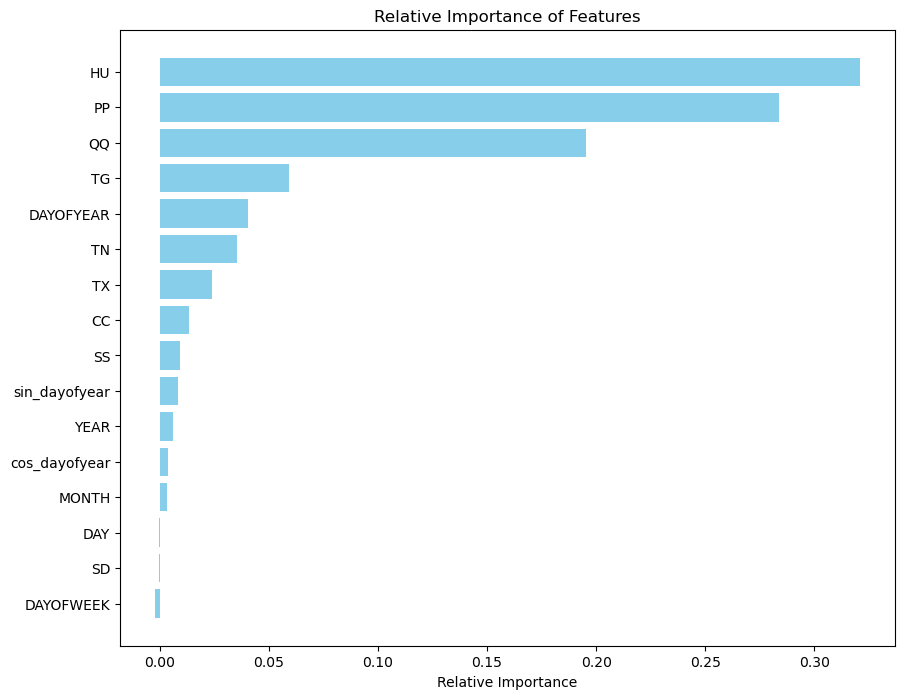

In [72]:
# Permutation importance scores for each feature
feature_importances = {
    'HU': 0.26025705489117495,
    'PP': 0.23036410334586693,
    'QQ': 0.1583003539898889,
    'TG': 0.04817866580368542,
    'DAYOFYEAR': 0.03269464141103419,
    'TN': 0.02868056995017958,
    'TX': 0.019504222205645592,
    'CC': 0.010701080688380282,
    'SS': 0.007487177620280427,
    'sin_dayofyear': 0.006755575403032598,
    'YEAR': 0.004949070160785596,
    'cos_dayofyear': 0.0029619714960235854,
    'MONTH': 0.0027731173941430544,
    'DAY': -0.00041004242166788887,
    'SD': -0.0004318092042052468,
    'DAYOFWEEK': -0.0017029333227212562
}

# Step 1: Normalize importance scores
total_importance = sum(feature_importances.values())
normalized_importances = {feat: score / total_importance for feat, score in feature_importances.items()}

# Step 2: Rank the features based on their normalized importance scores
sorted_normalized_importances = sorted(normalized_importances.items(), key=lambda x: x[1], reverse=True)

# Step 3: Visualize the relative importance
features, importance_scores = zip(*sorted_normalized_importances)
plt.figure(figsize=(10, 8))
plt.barh(features, importance_scores, color='skyblue')
plt.xlabel('Relative Importance')
plt.title('Relative Importance of Features')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()

## Using gridsearch to help find best hyperparameters for RandomForest feature selection

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Construct the pipeline with models, transformers, and scaler
estimators = [('rf', RandomForestRegressor())]
pipe = Pipeline(estimators)

In [68]:


# Define the grid of hyperparameters to search
param_grid = {
    'rf__n_estimators': [50, 100, 200],             # Range in the number of trees in the forest
    'rf__max_depth': [None, 10, 20],                # Range in max depth of the trees
    'rf__min_samples_split': [2, 5, 10],            # Range in min samples split
    'rf__min_samples_leaf': [1, 2, 4]               # Range in min samples leaf
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

NameError: name 'X_train' is not defined

In [74]:
rf_model = RandomForestRegressor(n_estimators = 200, max_depth = 10, min_samples_split = 10, min_samples_leaf = 4 )

In [75]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200)

Text(0.5, 0, 'Random Forest Importance')

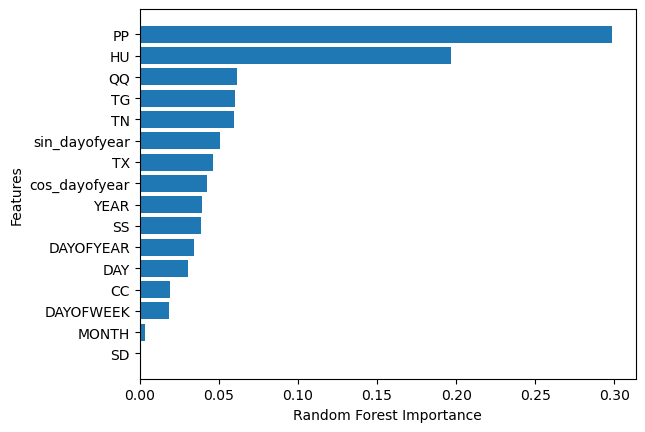

In [76]:
plt.barh(X_train.columns[rf_model.feature_importances_.argsort()], rf_model.feature_importances_[rf_model.feature_importances_.argsort()])
plt.ylabel("Features")
plt.xlabel("Random Forest Importance")


In [77]:
perm_eval = permutation_importance(rf_model, X_train, y_train)

In [78]:
perm_val = perm_eval.importances_mean

Text(0.5, 0, 'Random Forest Importance')

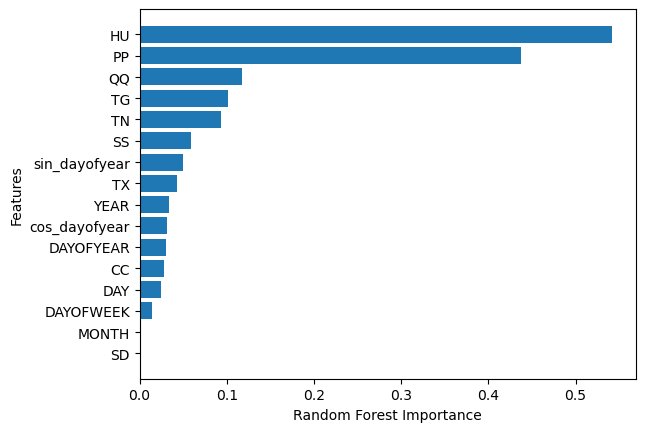

In [79]:
plt.barh(X_train.columns[perm_val.argsort()], perm_val[perm_val.argsort()])
plt.ylabel("Features")
plt.xlabel("Random Forest Importance")


In [84]:
pip install shap 

Note: you may need to restart the kernel to use updated packages.


In [89]:
import shap

In [90]:
shap_explain = shap.Explainer(rf_model)

In [91]:
shap_eval = shap_explain(X_train)

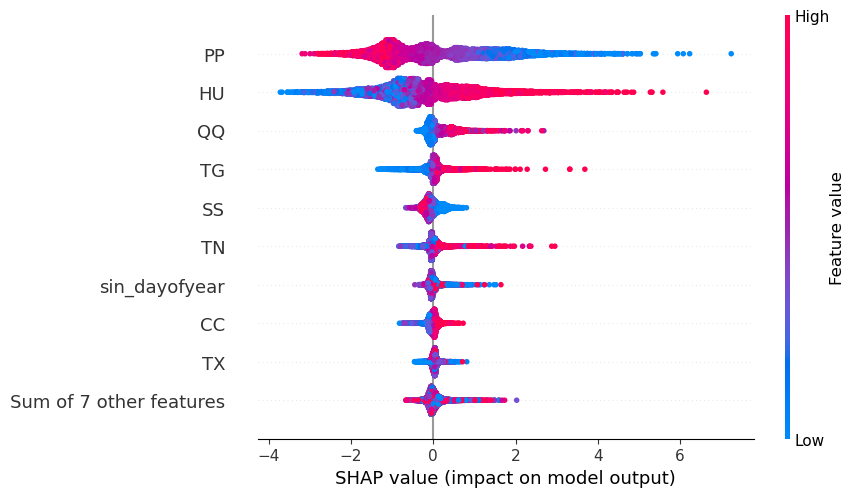

In [92]:
shap.plots.beeswarm(shap_eval, show=False)
labels = [y_labels.get_text() for y_labels in reversed(plt.gca().yaxis.get_majorticklabels())]


In [93]:
vals = []

In [94]:
for k in X_train.columns:
    if k not in labels:
        vals.append(k)


In [95]:
vals

['SD', 'YEAR', 'MONTH', 'DAY', 'DAYOFWEEK', 'DAYOFYEAR', 'cos_dayofyear']

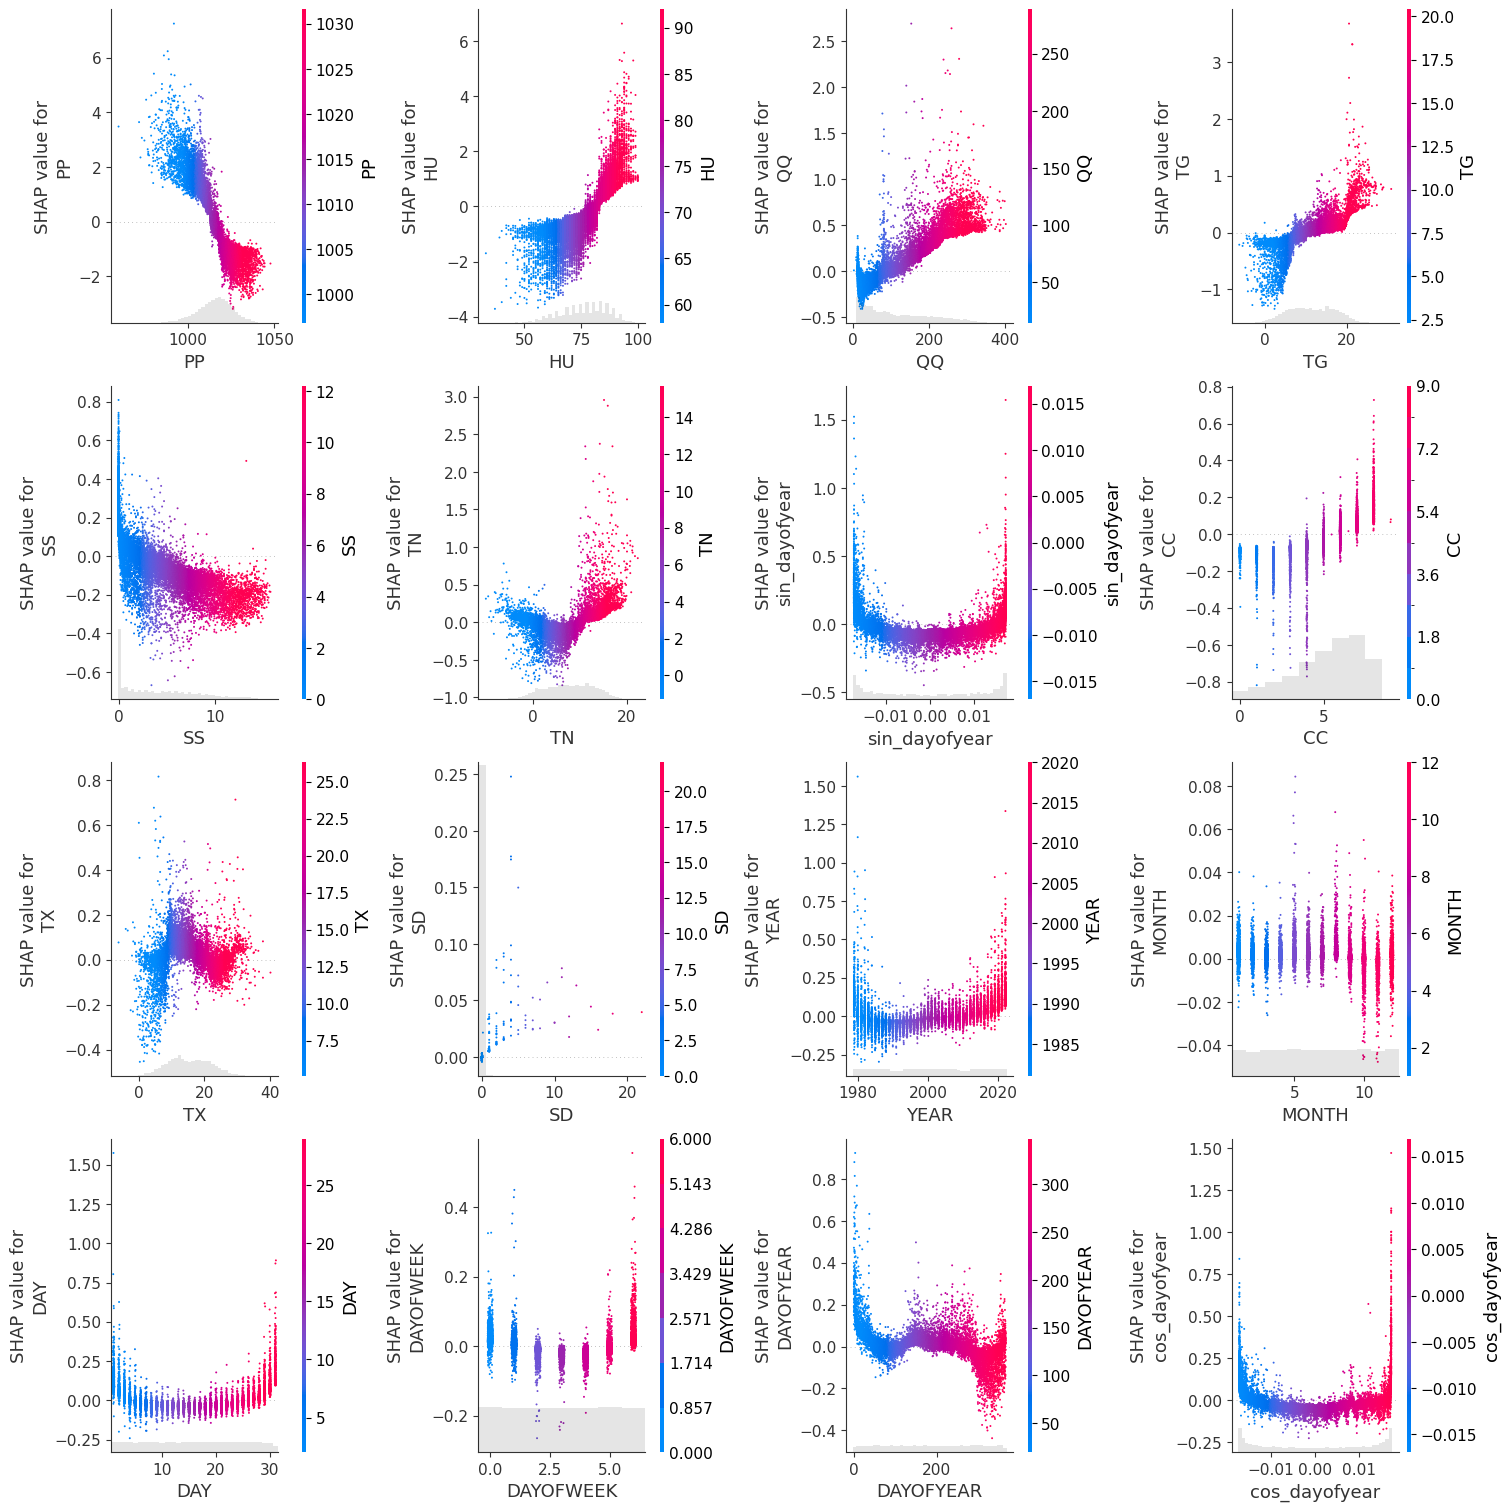

In [97]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15), constrained_layout=True)
axs= axes.ravel()

for i, feat in enumerate(list(X_train[labels[:-1]].columns.values) + vals):
    shap.plots.scatter(shap_eval[:, feat], dot_size=2, color=shap_eval[:, feat], ax=axs[i], show=False)


### Second iteration of LGBM

In [99]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 1: Data Preparation
X = lw_df[["HU", "PP", "QQ", "TG"]]
y = lw_df["RR"]

# Step 2: Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Step 3: Model Training
model2 = LGBMRegressor()
model2.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model2.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 score:", r2)
print("Root Mean Squared Error:", rmse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 12856, number of used features: 4
[LightGBM] [Info] Start training from score 1.685758
Mean Absolute Error: 1.7237513197269883
Mean Squared Error: 11.127093057485554
R2 score: 0.20654689440132346
Root Mean Squared Error: 3.335729763857611


### Hyperparameterization using grid search for the LGBM model

In [103]:
from sklearn.model_selection import GridSearchCV

# Step 1: Model to use
model2 = LGBMRegressor()

# Step 2: Define the grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Step 3: Create the gridsearch 
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Step 4: Fit the gridsearch to data
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters and best score
best_params = grid_search.best_params_


print("Best Parameters:", best_params)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 12856, number of used features: 4
[LightGBM] [Info] Start training from score 1.685758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


### Try model 2 with hyperparameters tuning

In [104]:
# Step 1: Data Preparation
X = lw_df[["HU", "PP", "QQ", "TG"]]
y = lw_df["RR"]

# Step 2: Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Step 3: Model Training
model2 = LGBMRegressor(learning_rate=0.1, max_depth=3, n_estimators=50)
model2.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model2.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 score:", r2)
print("Root Mean Squared Error:", rmse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 829
[LightGBM] [Info] Number of data points in the train set: 12856, number of used features: 4
[LightGBM] [Info] Start training from score 1.685758
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Mean Absolute Error: 1.7407115235476869
Mean Squared Error: 11.163412160724512
R2 score: 0.20395704410451798
Root Mean Squared Error: 3.3411692804652255


In [ ]:
predictions = model.predict(X_temp)

fig = go.Figure()
fig.add_trace(go.Scatter(x=y_train.index, y=y_train, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=y_test.index, y=y_test, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=y_test.index, y=predictions, mode='lines', name="LGBM prediction"))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title="RR", 
    xaxis_title="Date",
    title="RR over time"
)
fig.show()

In [671]:
# imports
import os.path

In [345]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU, BatchNormalization
from tensorflow.keras.utils import plot_model

In [604]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [610]:
seasonal_decompose(lw_df2["RR"], model='additive', period=4).resid

0             NaN
1             NaN
2        0.001008
3       -0.045939
4       -0.892102
           ...   
16066    3.526008
16067    0.816561
16068   -2.517102
16069         NaN
16070         NaN
Name: resid, Length: 16071, dtype: float64

Like the Decision Tree, we seem to see alot of overfitting with the data when it comes to unseen data. 

## 5. Conclusion

We can summarize that our initial approach of splitting the problem up into first a classification problem and then into a regression one didn't provide the result we wanted. Despite working our way through feature selection, we achieved a very low $R$2. 

Next, we used a Random Forest Generator to aid us with our feature selection leaving us with three main important features: PP, HU & QQ. After running grid search to find optimum hyperparameter values, and ran a Decision Tree with the important features, we ended up with similar $R$2 value. 

Finally, we will use a combination of PCA, LSTM (RNN) & Pytorch to help us attain a better result in predicting precipitation in London. 